In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET


In [3]:
def coord_to_center(xmin, ymin, xmax, ymax):
    return ((xmin+xmax)//2),((ymin+ymax)//2)

In [4]:
def read_content(xml_file):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        for box in boxes.findall("bndbox"):
            ymin = int(box.find("ymin").text)
            xmin = int(box.find("xmin").text)
            ymax = int(box.find("ymax").text)
            xmax = int(box.find("xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes

name, boxes = read_content("testexml/test_file.xml")
print name, boxes

brain_1__1.jpg [[356, 147, 370, 161], [355, 108, 369, 122], [369, 105, 383, 119], [348, 146, 362, 160], [361, 153, 375, 167], [316, 141, 330, 155], [311, 159, 325, 173], [325, 155, 339, 169], [326, 88, 340, 102], [350, 169, 364, 183], [335, 92, 349, 106], [354, 177, 368, 191], [337, 235, 351, 249], [382, 272, 396, 286], [380, 227, 394, 241], [382, 197, 396, 211], [375, 207, 389, 221], [380, 202, 394, 216], [312, 196, 326, 210], [317, 190, 331, 204], [284, 174, 298, 188], [253, 143, 267, 157], [207, 134, 221, 148], [423, 274, 437, 288], [360, 43, 374, 57], [367, 53, 381, 67], [332, 39, 346, 53], [366, 130, 380, 144]]


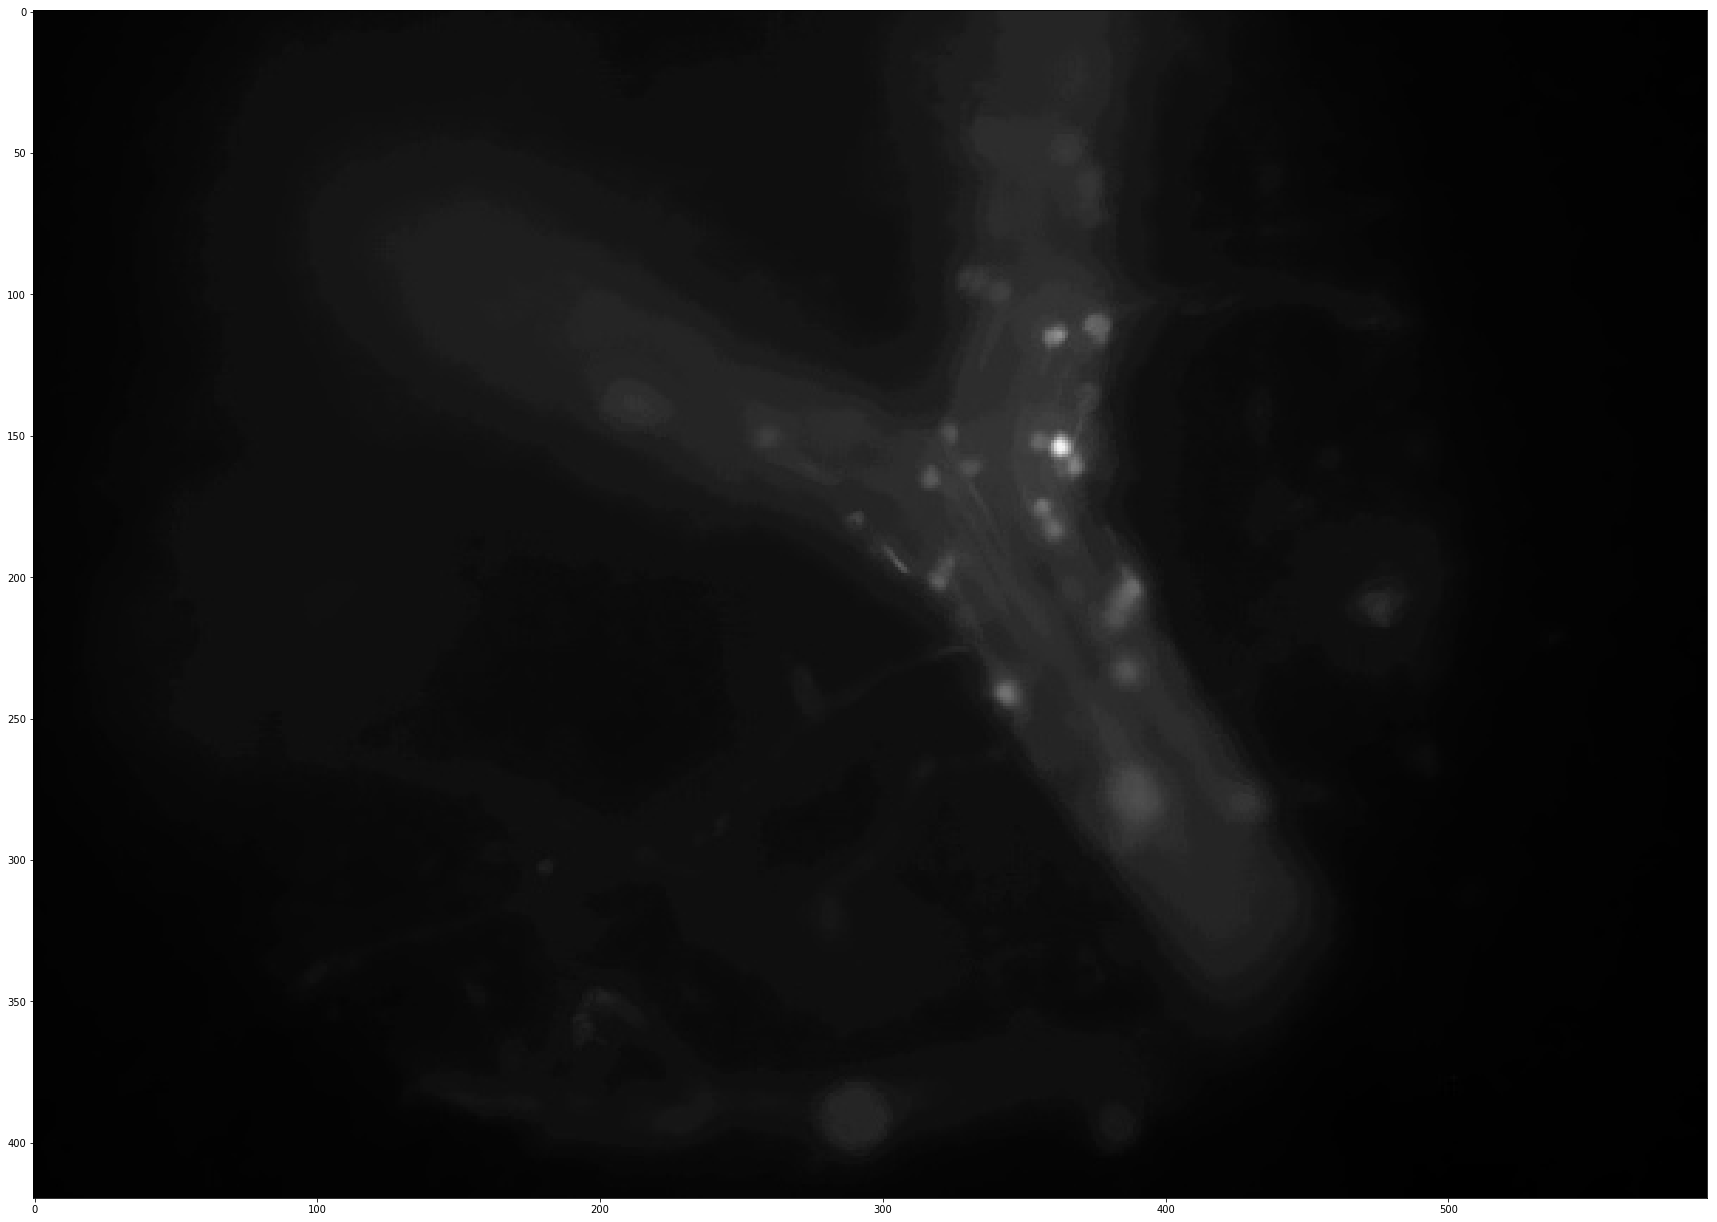

In [5]:
#Abertura da imagem
img = cv2.imread('teste3.jpg',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

plt.figure(figsize=[30, 30])
plt.imshow(cimg, "gray")

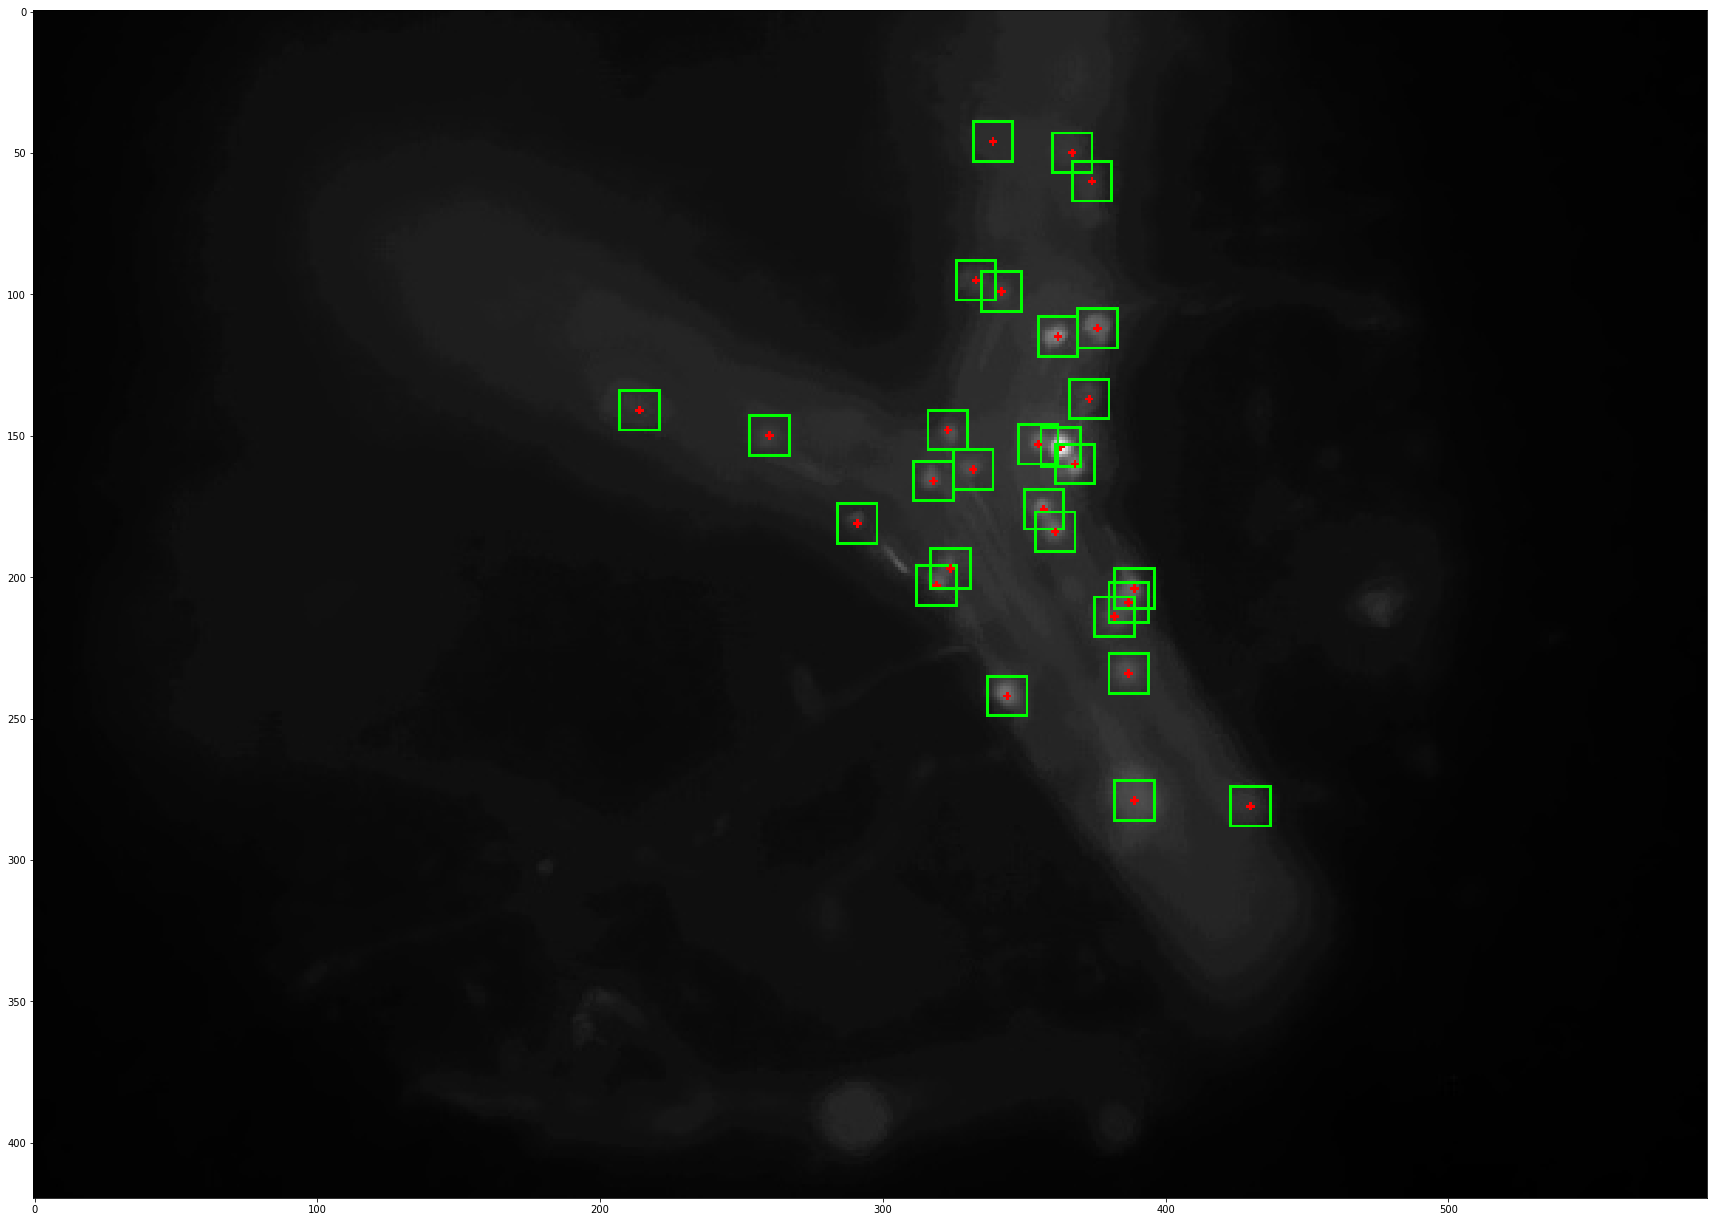

In [6]:
for cell in boxes:
    cv2.rectangle(cimg, (cell[0],cell[1]), (cell[2],cell[3]), (0,255,0), 1)
    cv2.circle(cimg,coord_to_center(cell[0],cell[1],cell[2],cell[3]), 1, (255,0,0), -1)
    #print coord_to_center(cell[0],cell[1],cell[2],cell[3])
plt.figure(figsize=[30, 30])
plt.imshow(cimg, "gray")

In [62]:
#Definição do diretório fonte
diretorio_img = "to_process/"
diretorio_xml = "annotations_to_process/"

#Lista todos os arquivos no diretório
files_img = os.listdir(diretorio_img)   
files_xml = os.listdir(diretorio_xml)

#Organiza todos os arquivos encontrados
files_img = np.sort(files_img)
files_xml = np.sort(files_xml)

#Extrai, uma-a-uma, as imagens do diretório para serem processadas 
num_files_img = len(files_img)
img_matrix = np.zeros((num_files_img,420,592), dtype=np.uint8)

for file_index, file in enumerate(files_img):
    img_matrix[file_index] = cv2.imread((diretorio_img+file),0)

    #Conversão para RGB, para sobrepor os círculos encontrados
    cimg = cv2.cvtColor(img_matrix[file_index],cv2.COLOR_GRAY2BGR)
    
    name, boxes = read_content("annotations_to_process/brain_1__{}.xml".format(file_index+1))
   
    for cell in boxes:
        cv2.rectangle(cimg, (cell[0],cell[1]), (cell[2],cell[3]), (0,255,0), 1)
        cv2.circle(cimg,coord_to_center(cell[0],cell[1],cell[2],cell[3]), 1, (255,0,0), -1)
    
    cv2.imwrite("ground_truth/img{}.jpg".format(file_index), cimg)      
    

# Extração de um leucócito médio para a determinação das gaussianas utilizadas na avaliação dos perfis dos leucócitos detectados:

(14, 14, 3) [356, 147, 370, 161]
(14, 14, 3) [355, 108, 369, 122]
(14, 14, 3) [369, 105, 383, 119]
(14, 14, 3) [348, 146, 362, 160]
(14, 14, 3) [361, 153, 375, 167]
(14, 14, 3) [316, 141, 330, 155]
(14, 14, 3) [311, 159, 325, 173]
(14, 14, 3) [325, 155, 339, 169]
(14, 14, 3) [326, 88, 340, 102]
(14, 14, 3) [350, 169, 364, 183]
(14, 14, 3) [335, 92, 349, 106]
(14, 14, 3) [354, 177, 368, 191]
(14, 14, 3) [337, 235, 351, 249]
(14, 14, 3) [382, 272, 396, 286]
(14, 14, 3) [380, 227, 394, 241]
(14, 14, 3) [382, 197, 396, 211]
(14, 14, 3) [375, 207, 389, 221]
(14, 14, 3) [380, 202, 394, 216]
(14, 14, 3) [312, 196, 326, 210]
(14, 14, 3) [317, 190, 331, 204]
(14, 14, 3) [284, 174, 298, 188]
(14, 14, 3) [253, 143, 267, 157]
(14, 14, 3) [207, 134, 221, 148]
(0, 14, 3) [423, 274, 437, 288]


ValueError: zero-size array to reduction operation minimum which has no identity

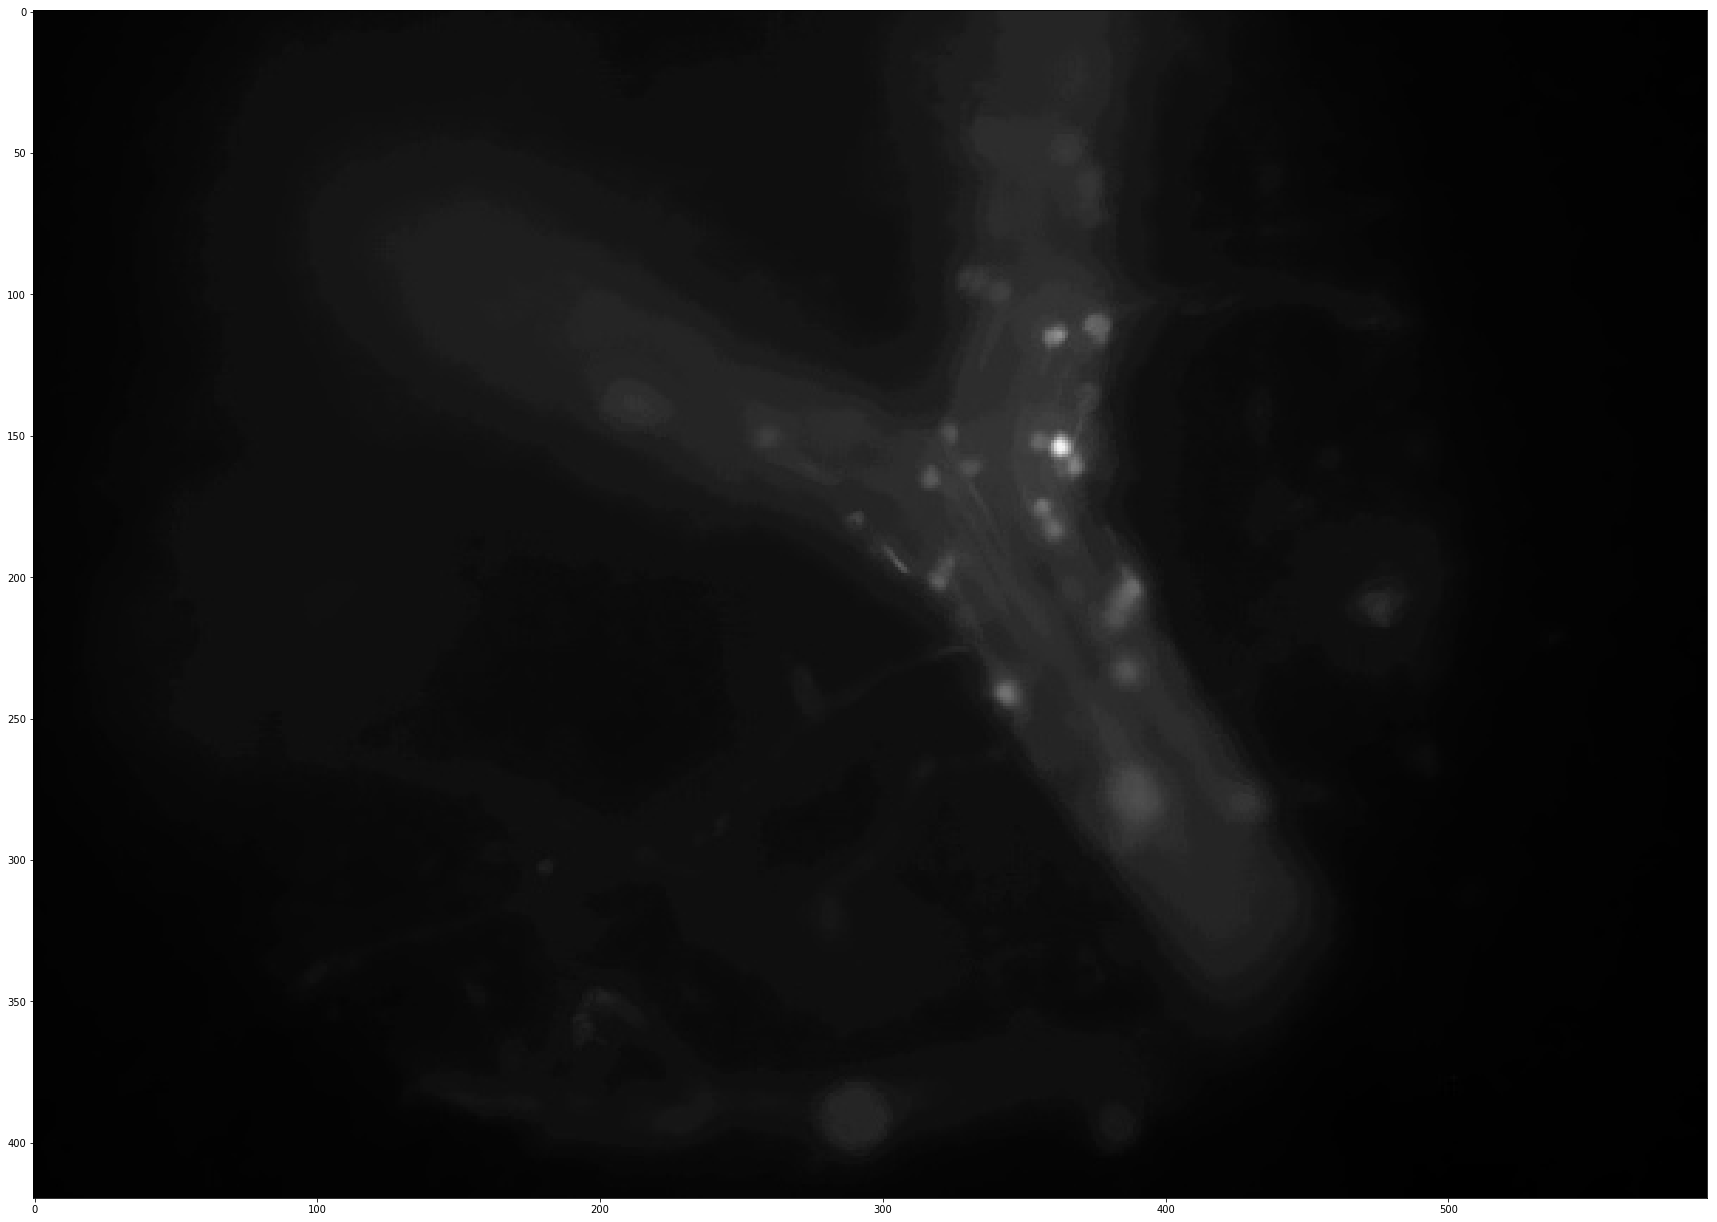

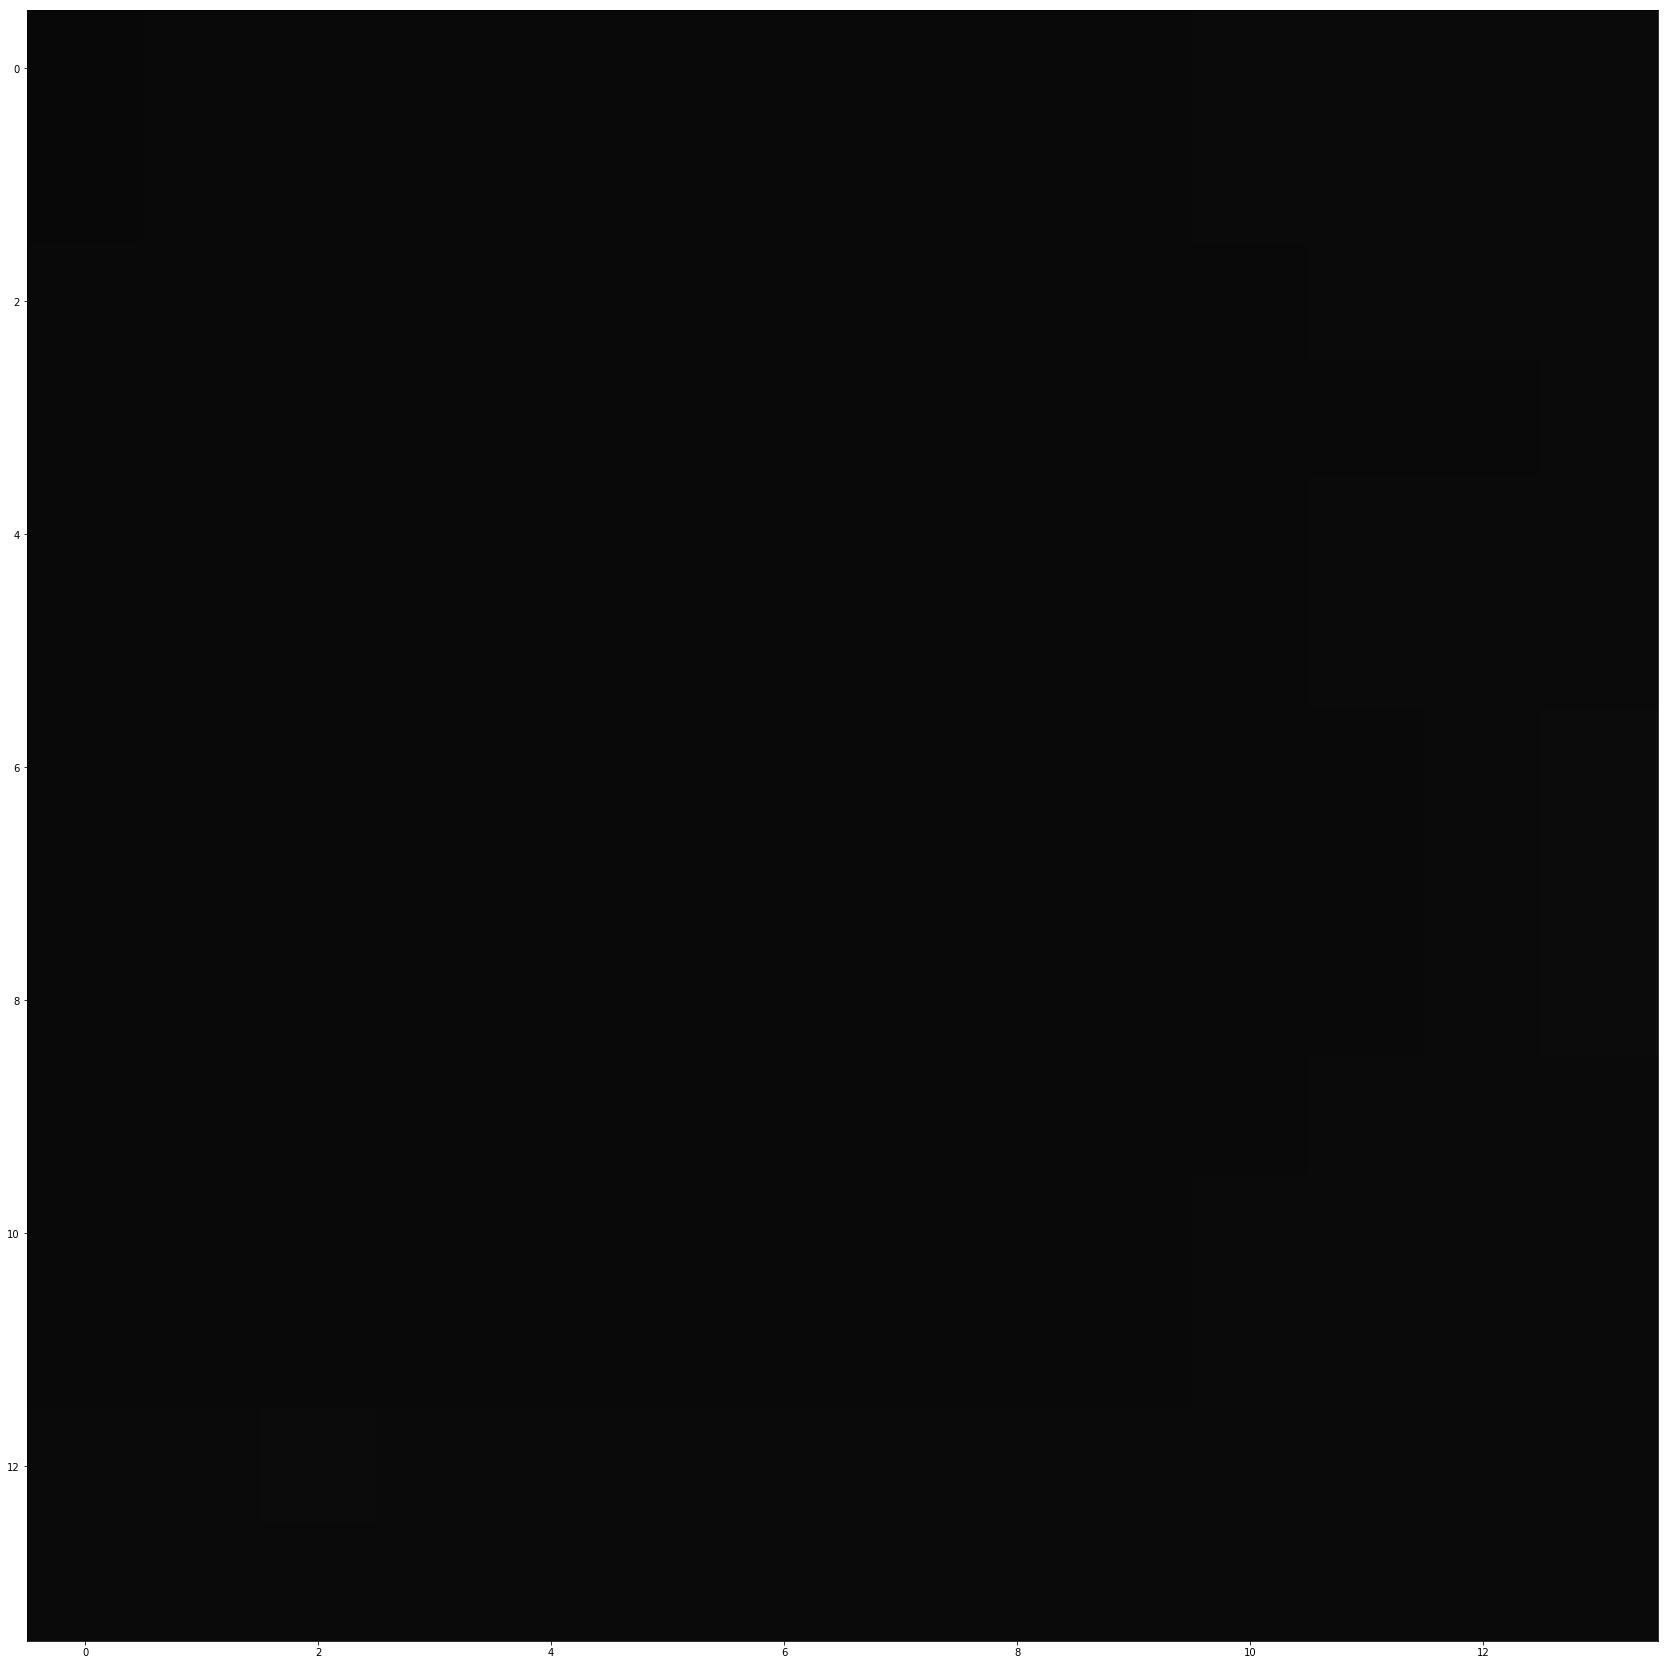

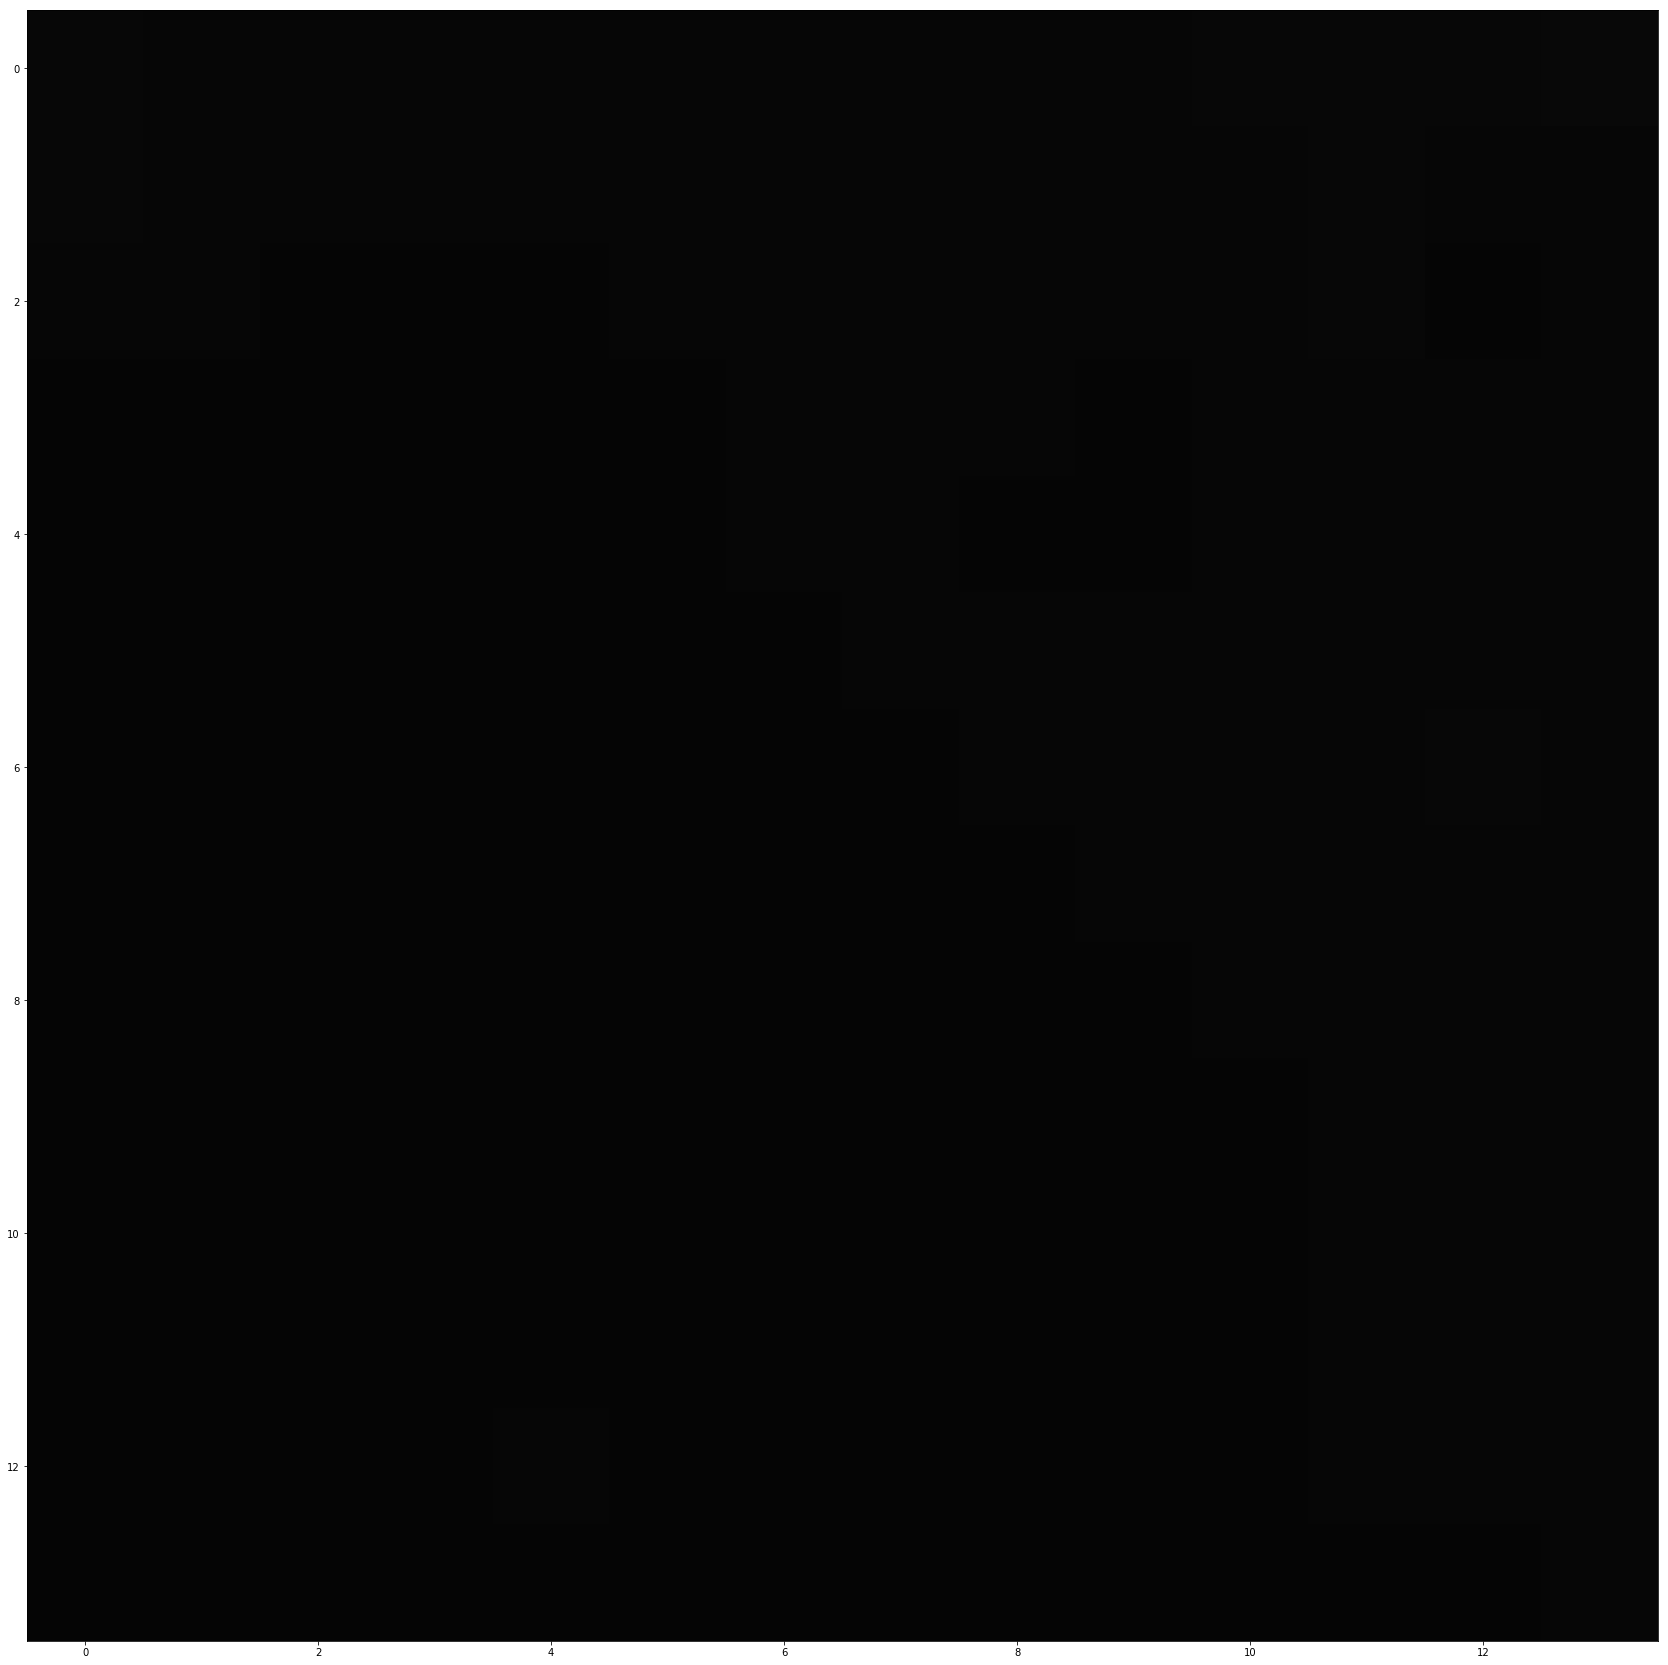

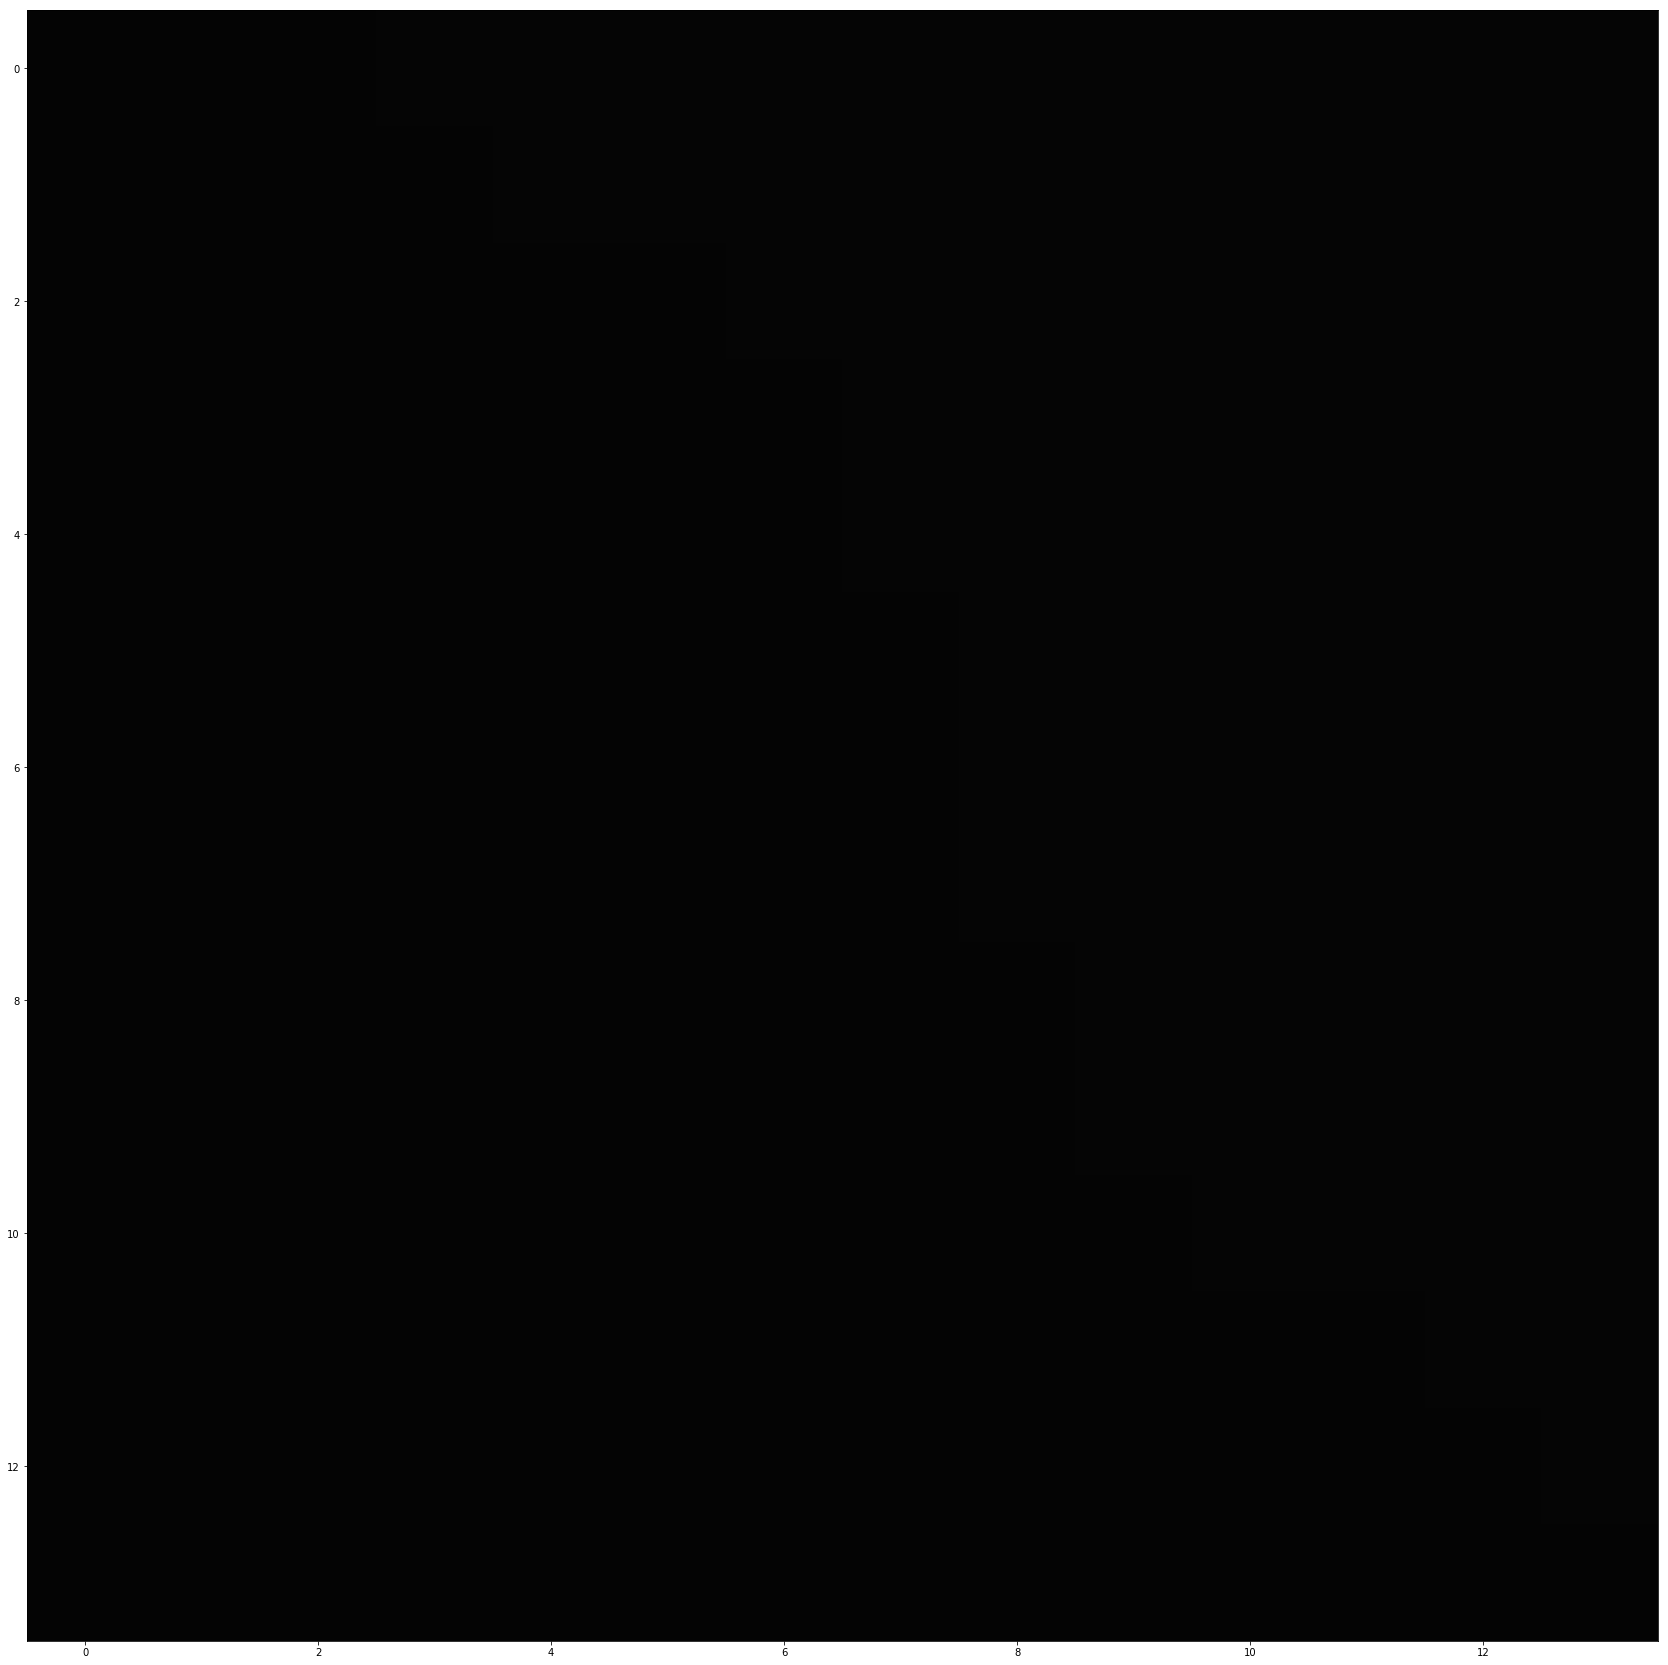

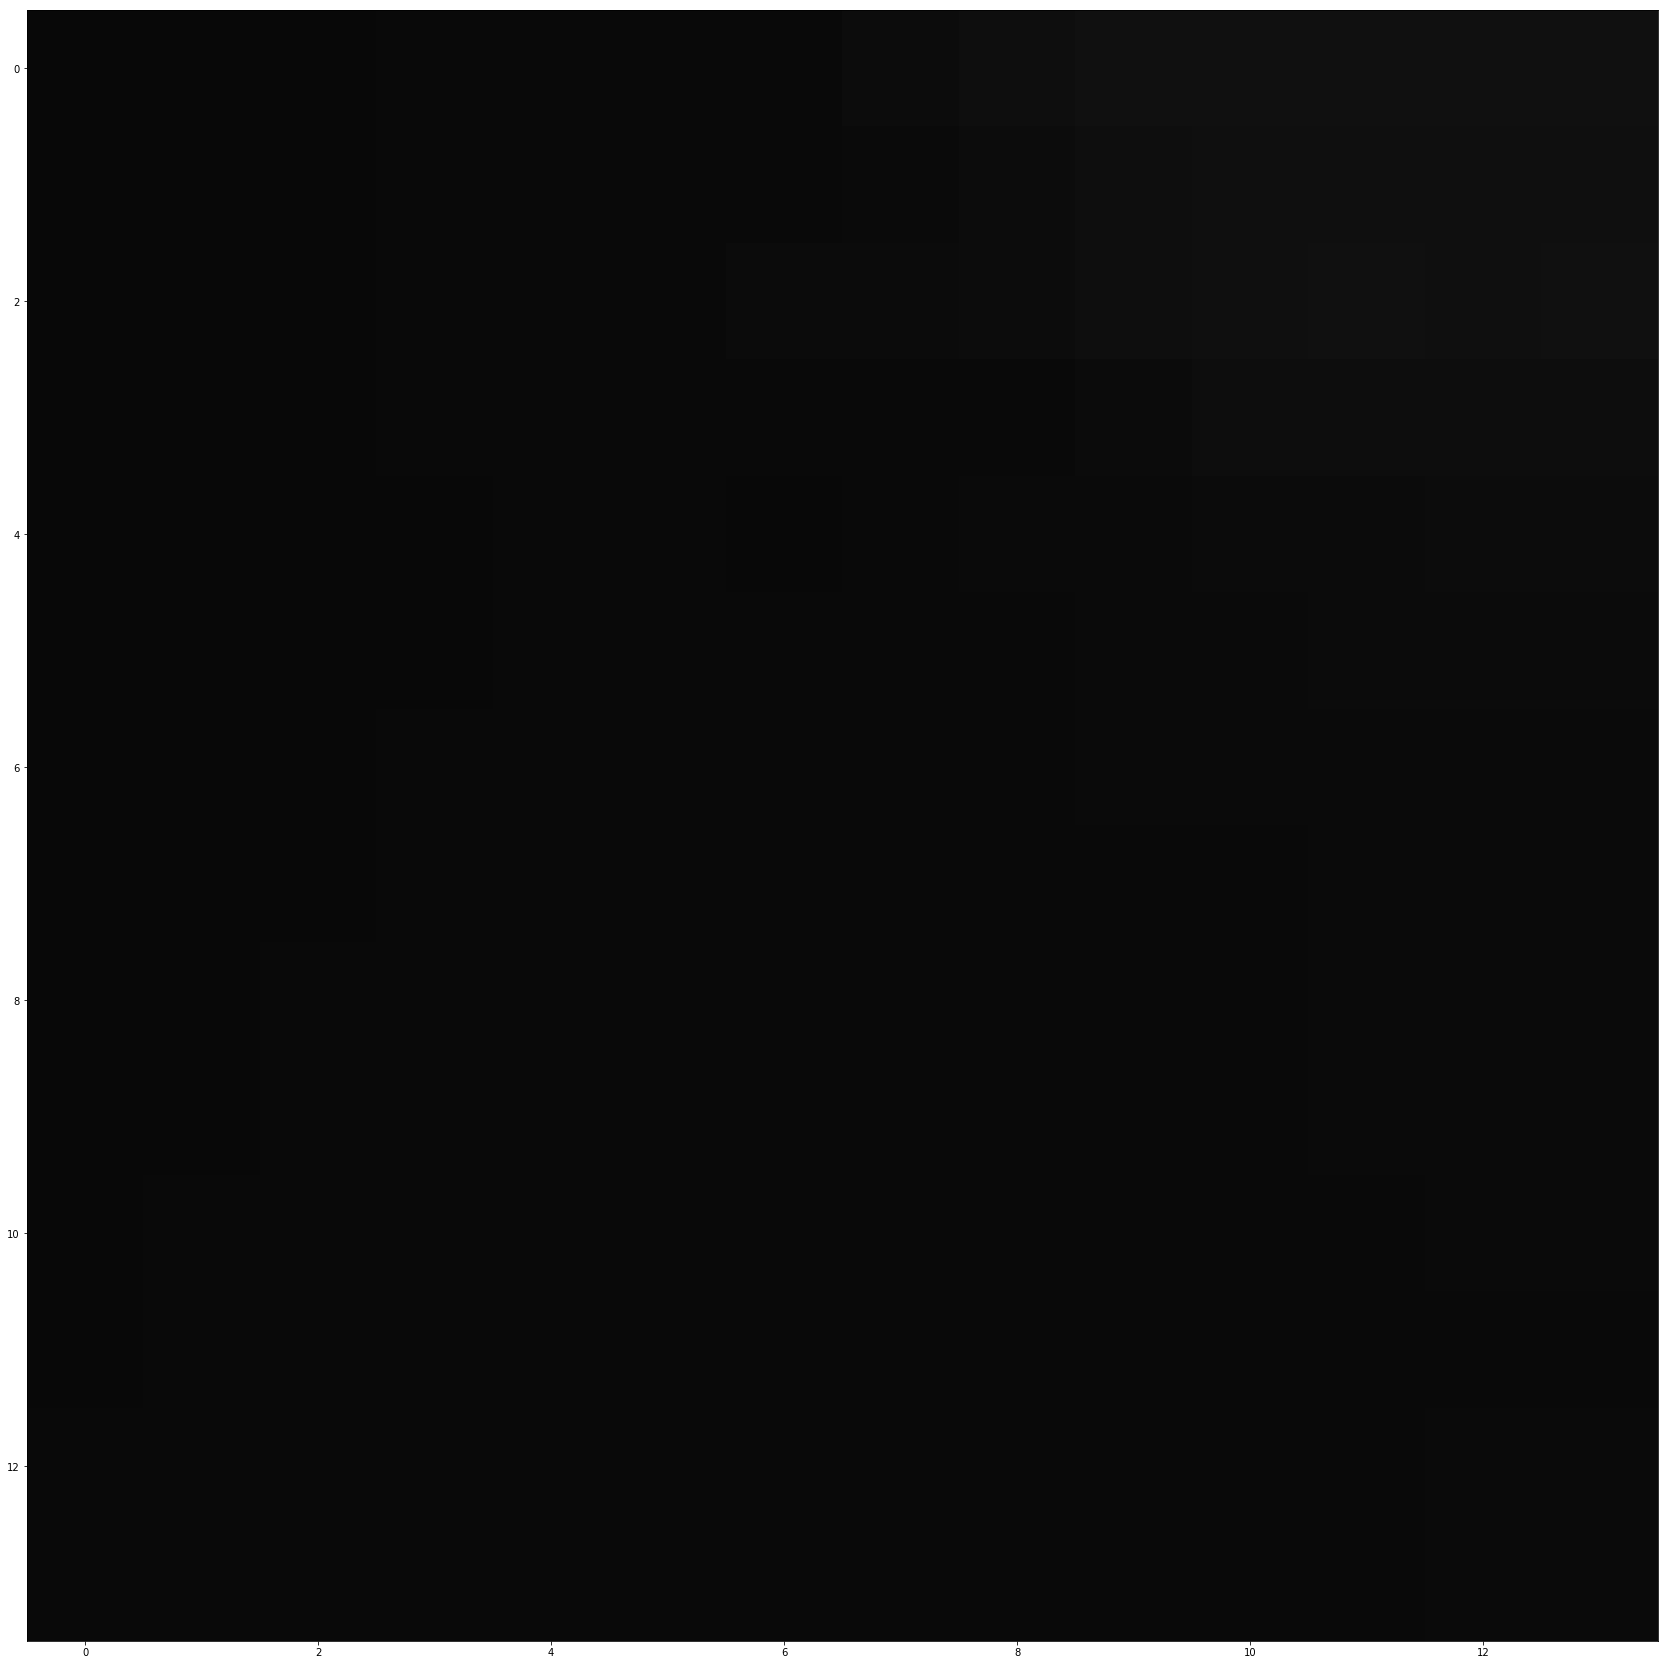

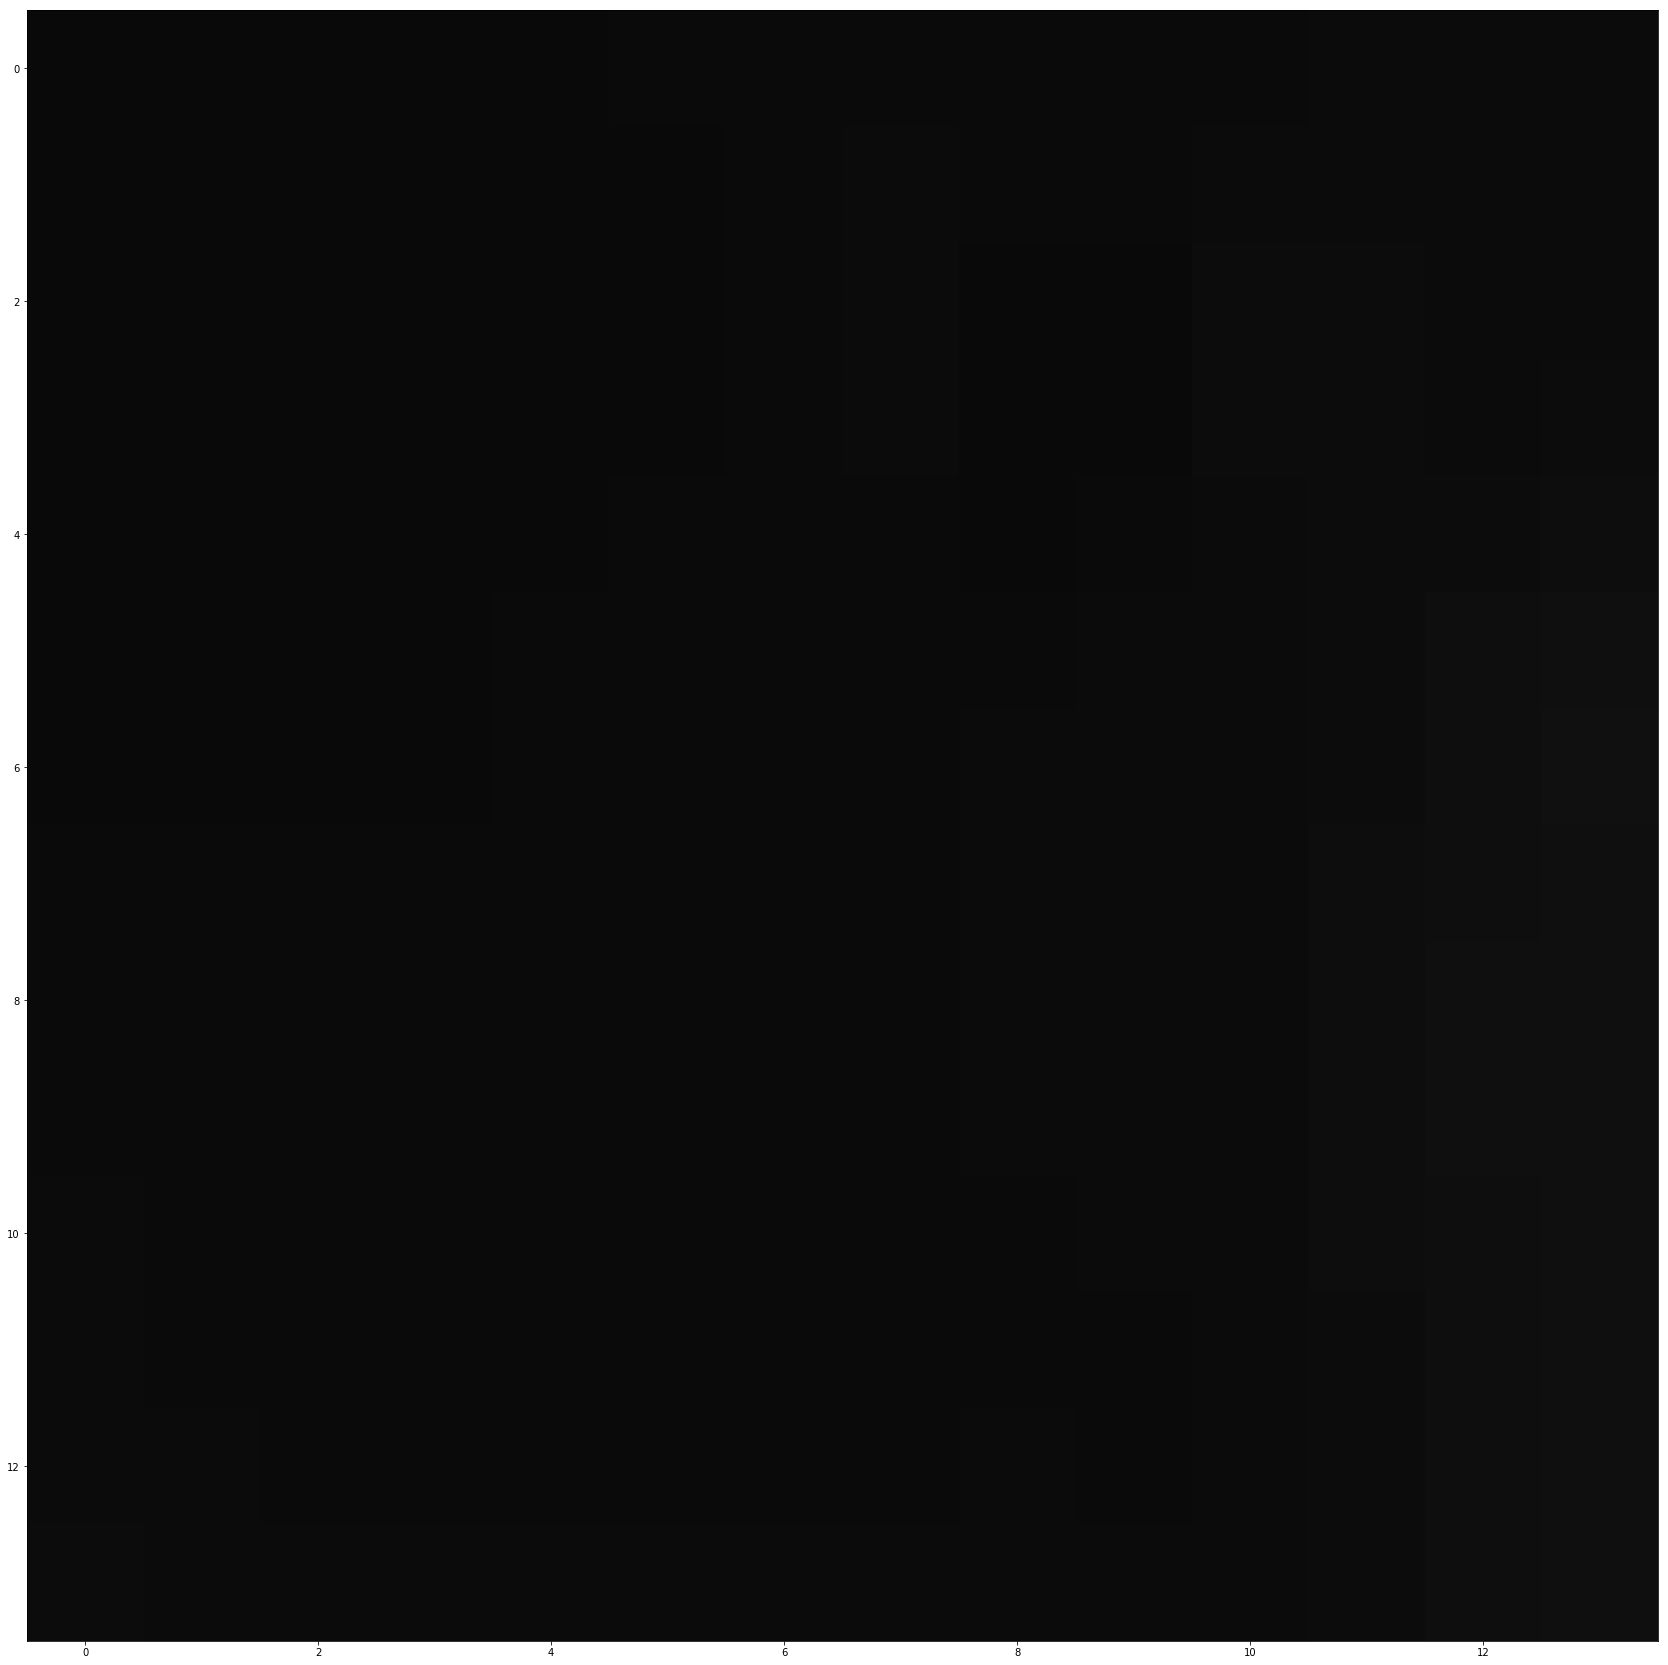

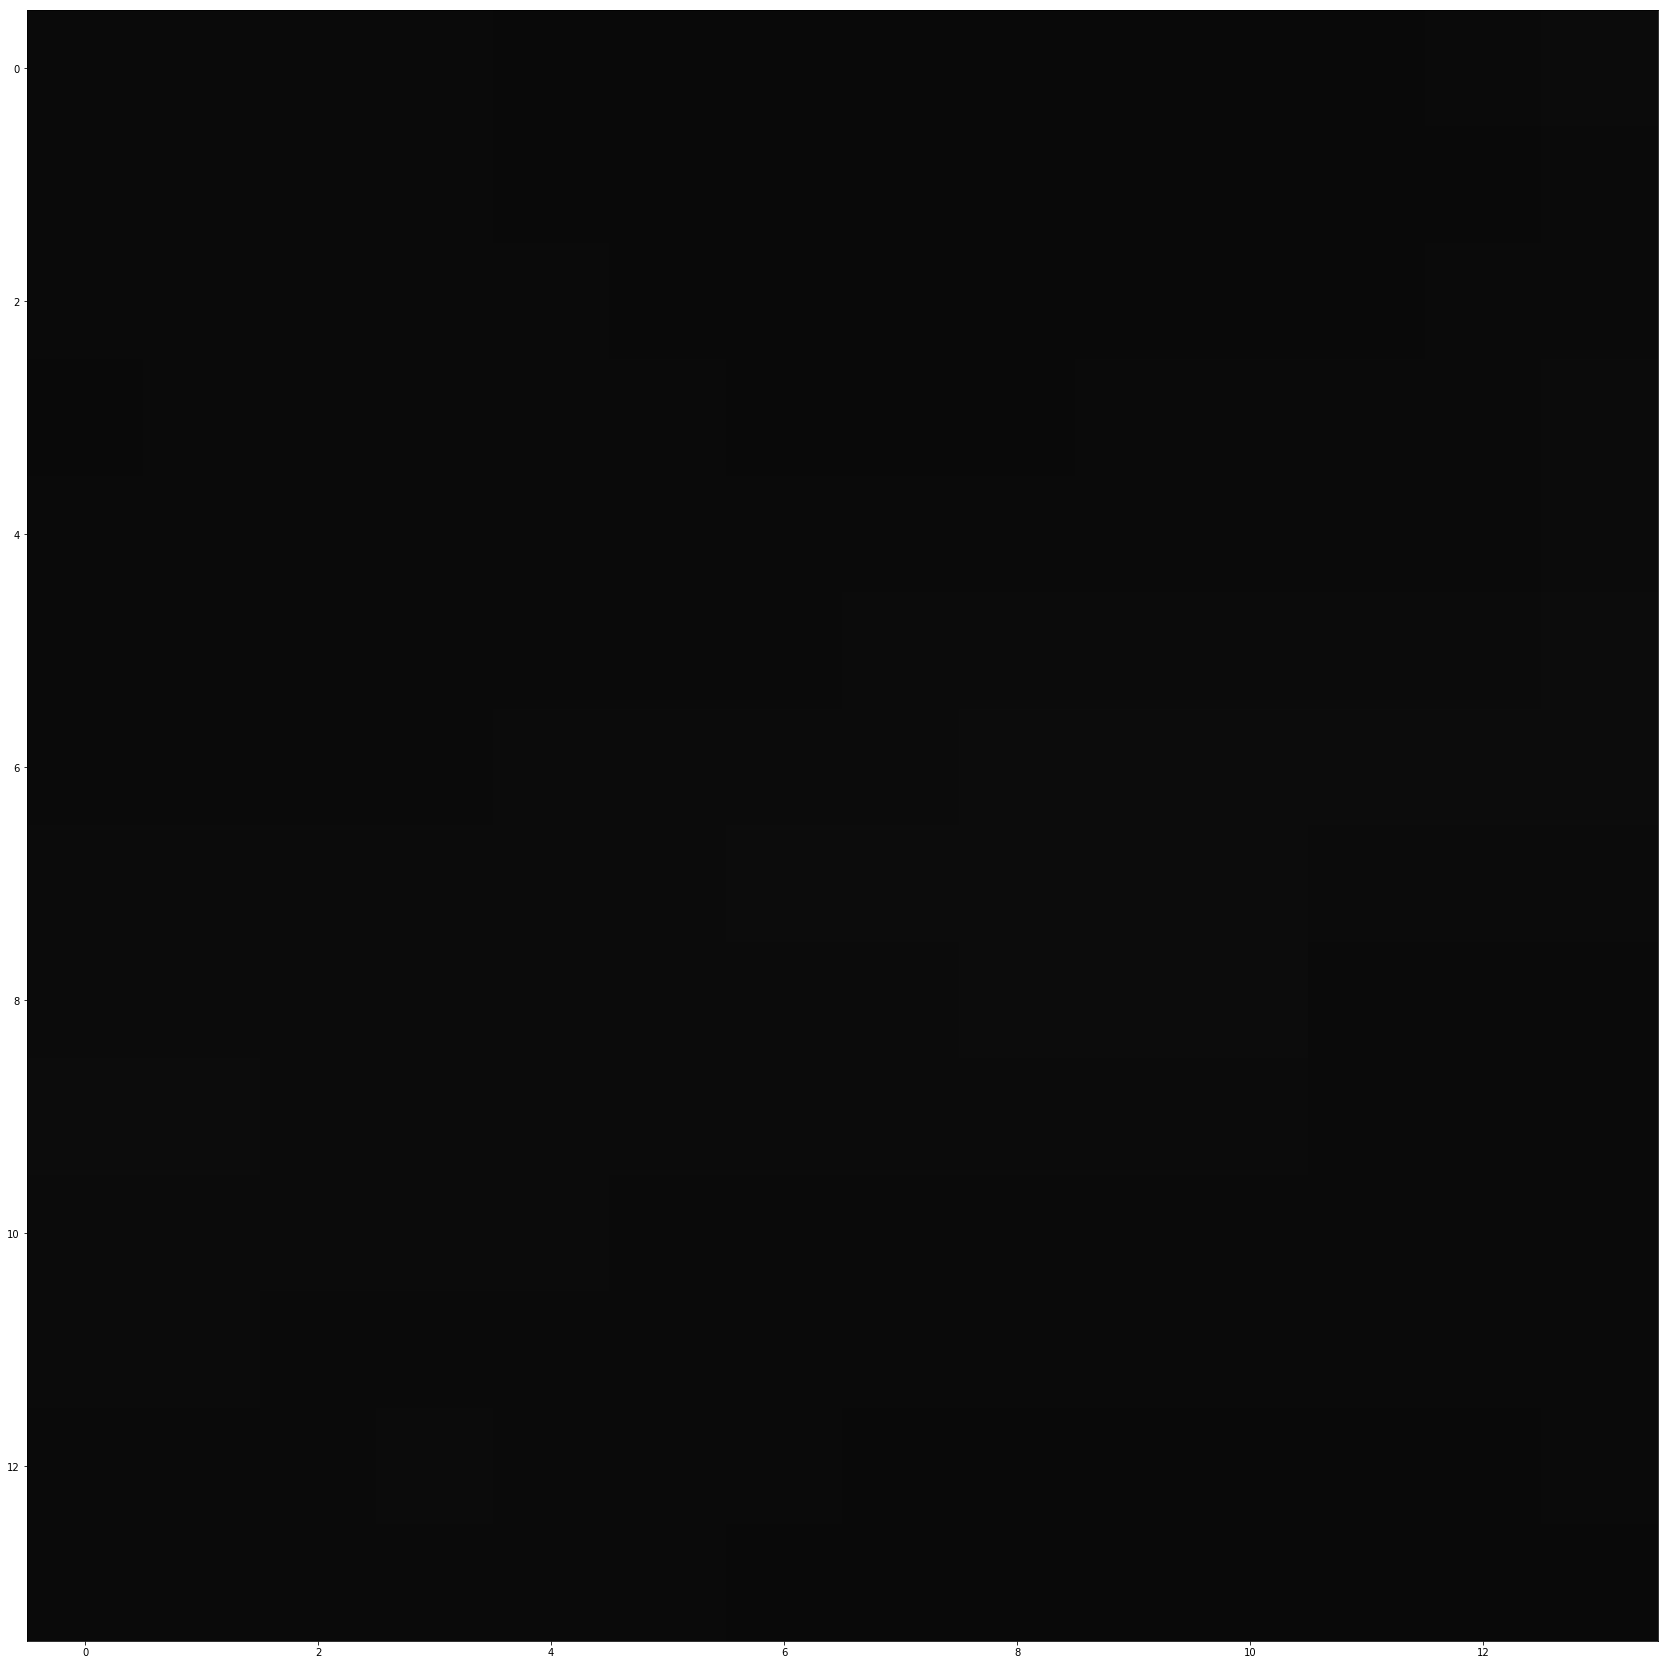

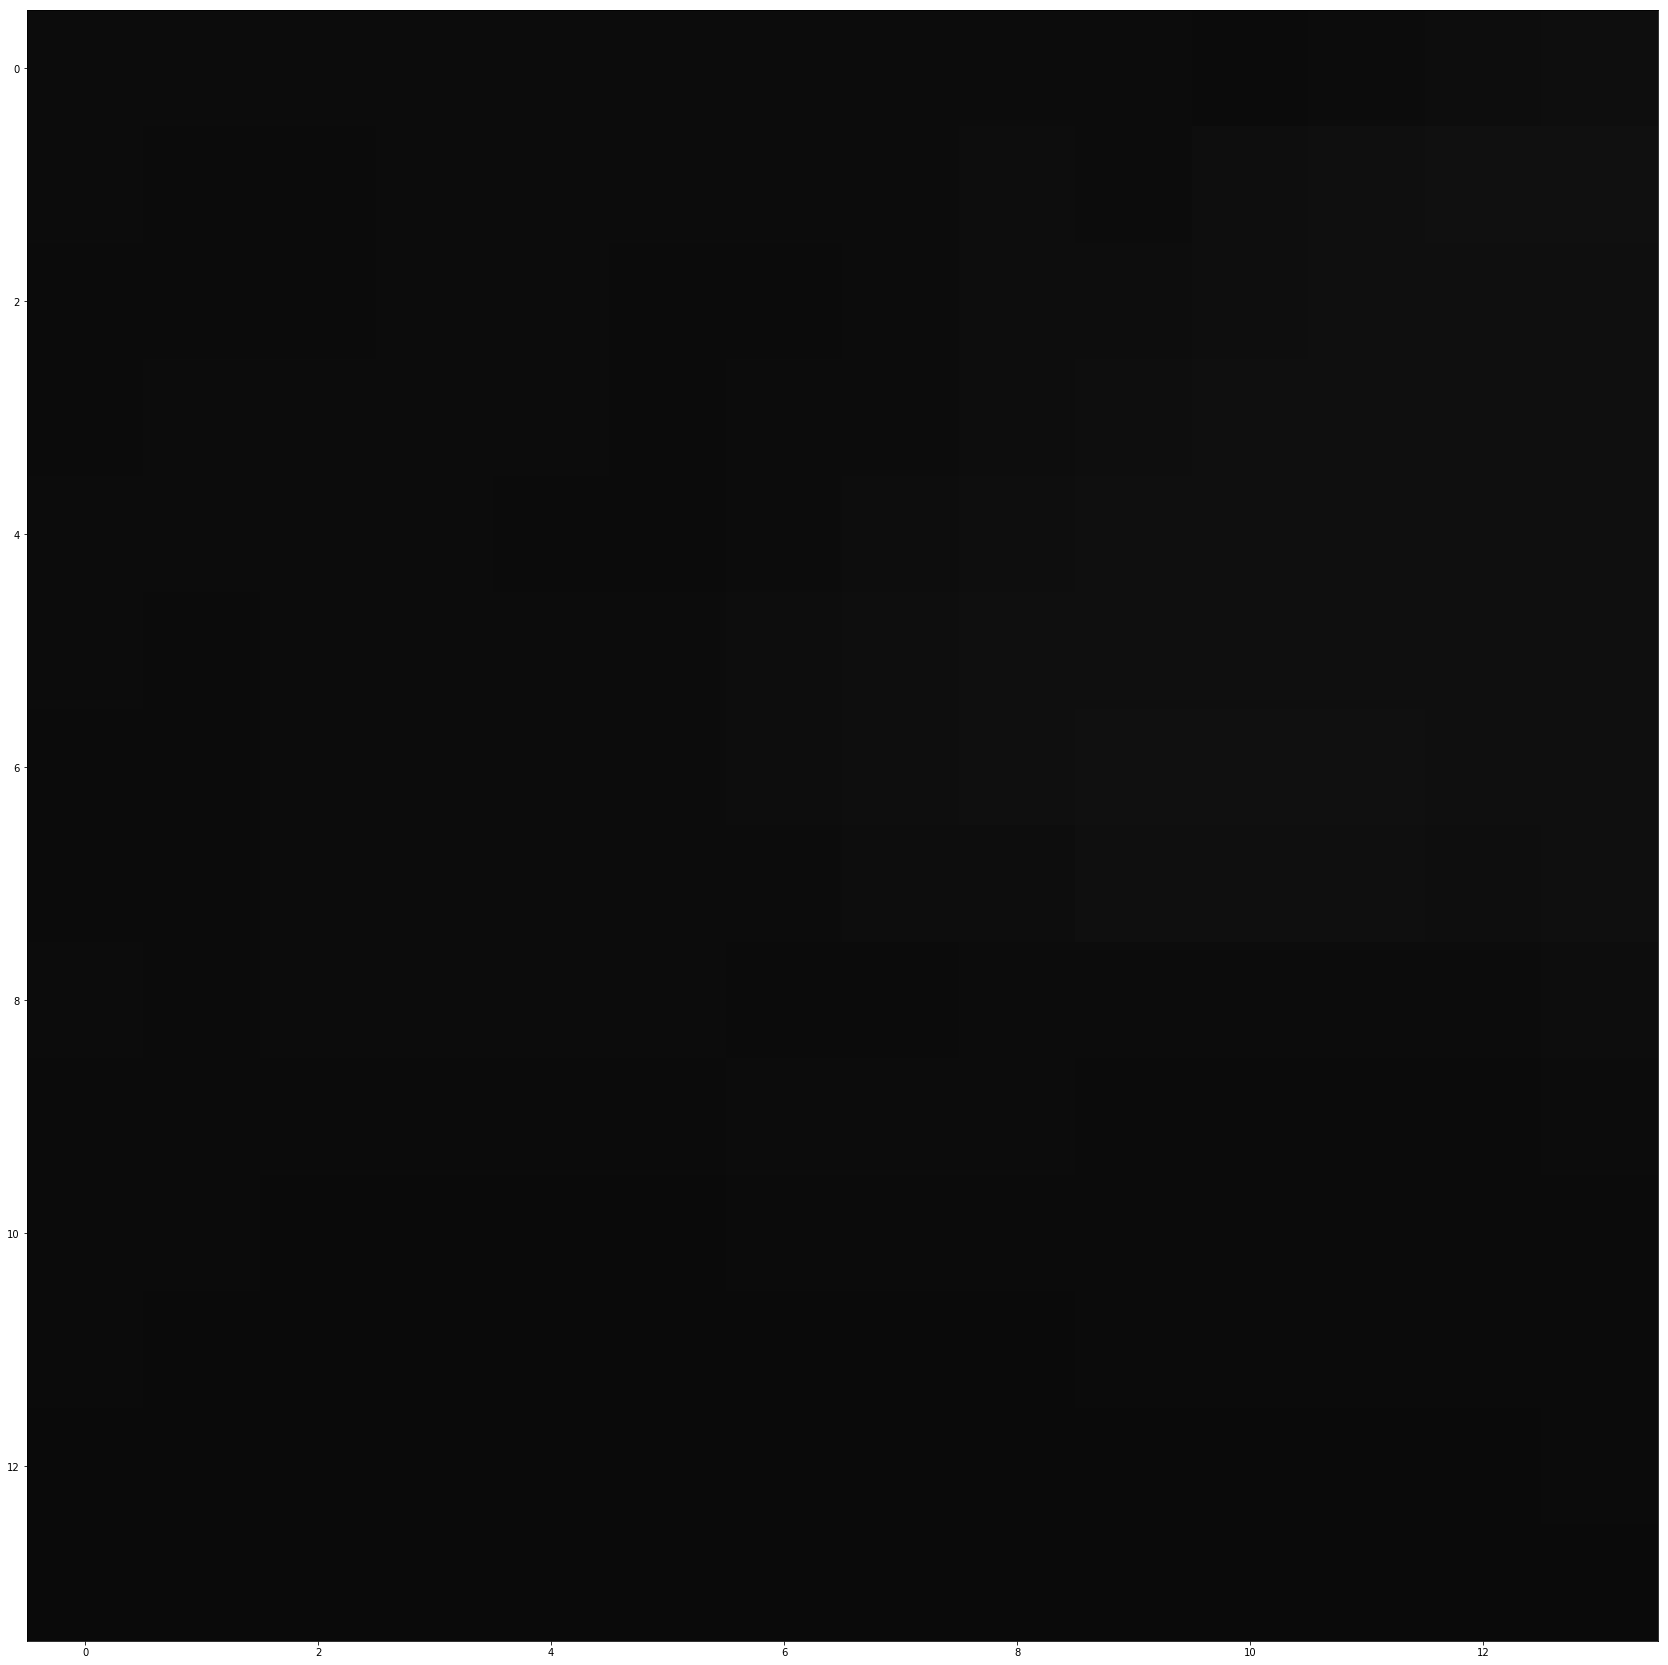

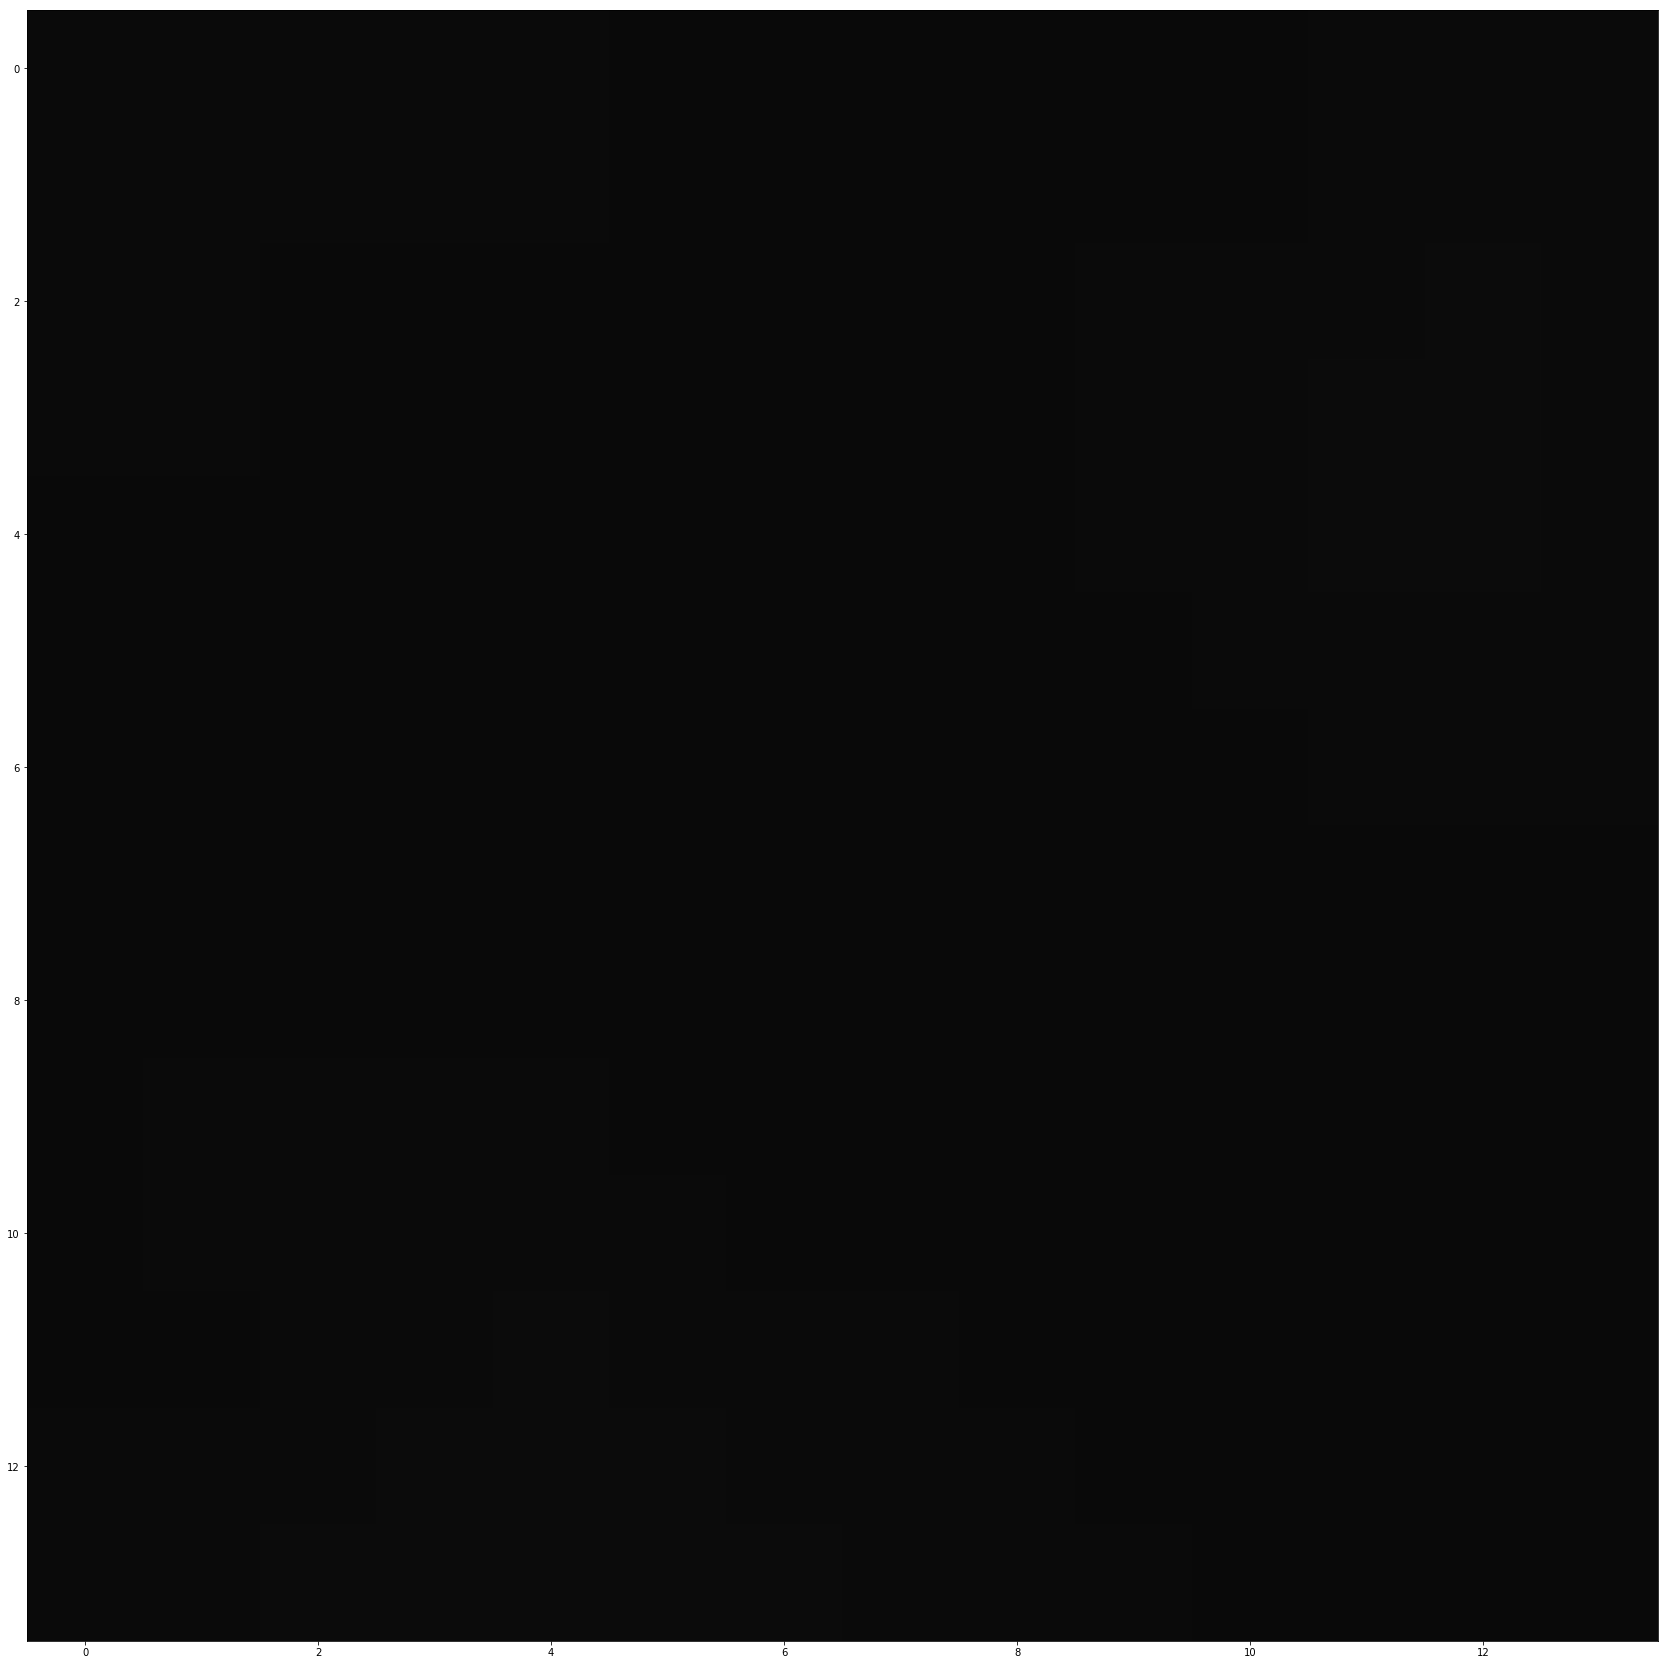

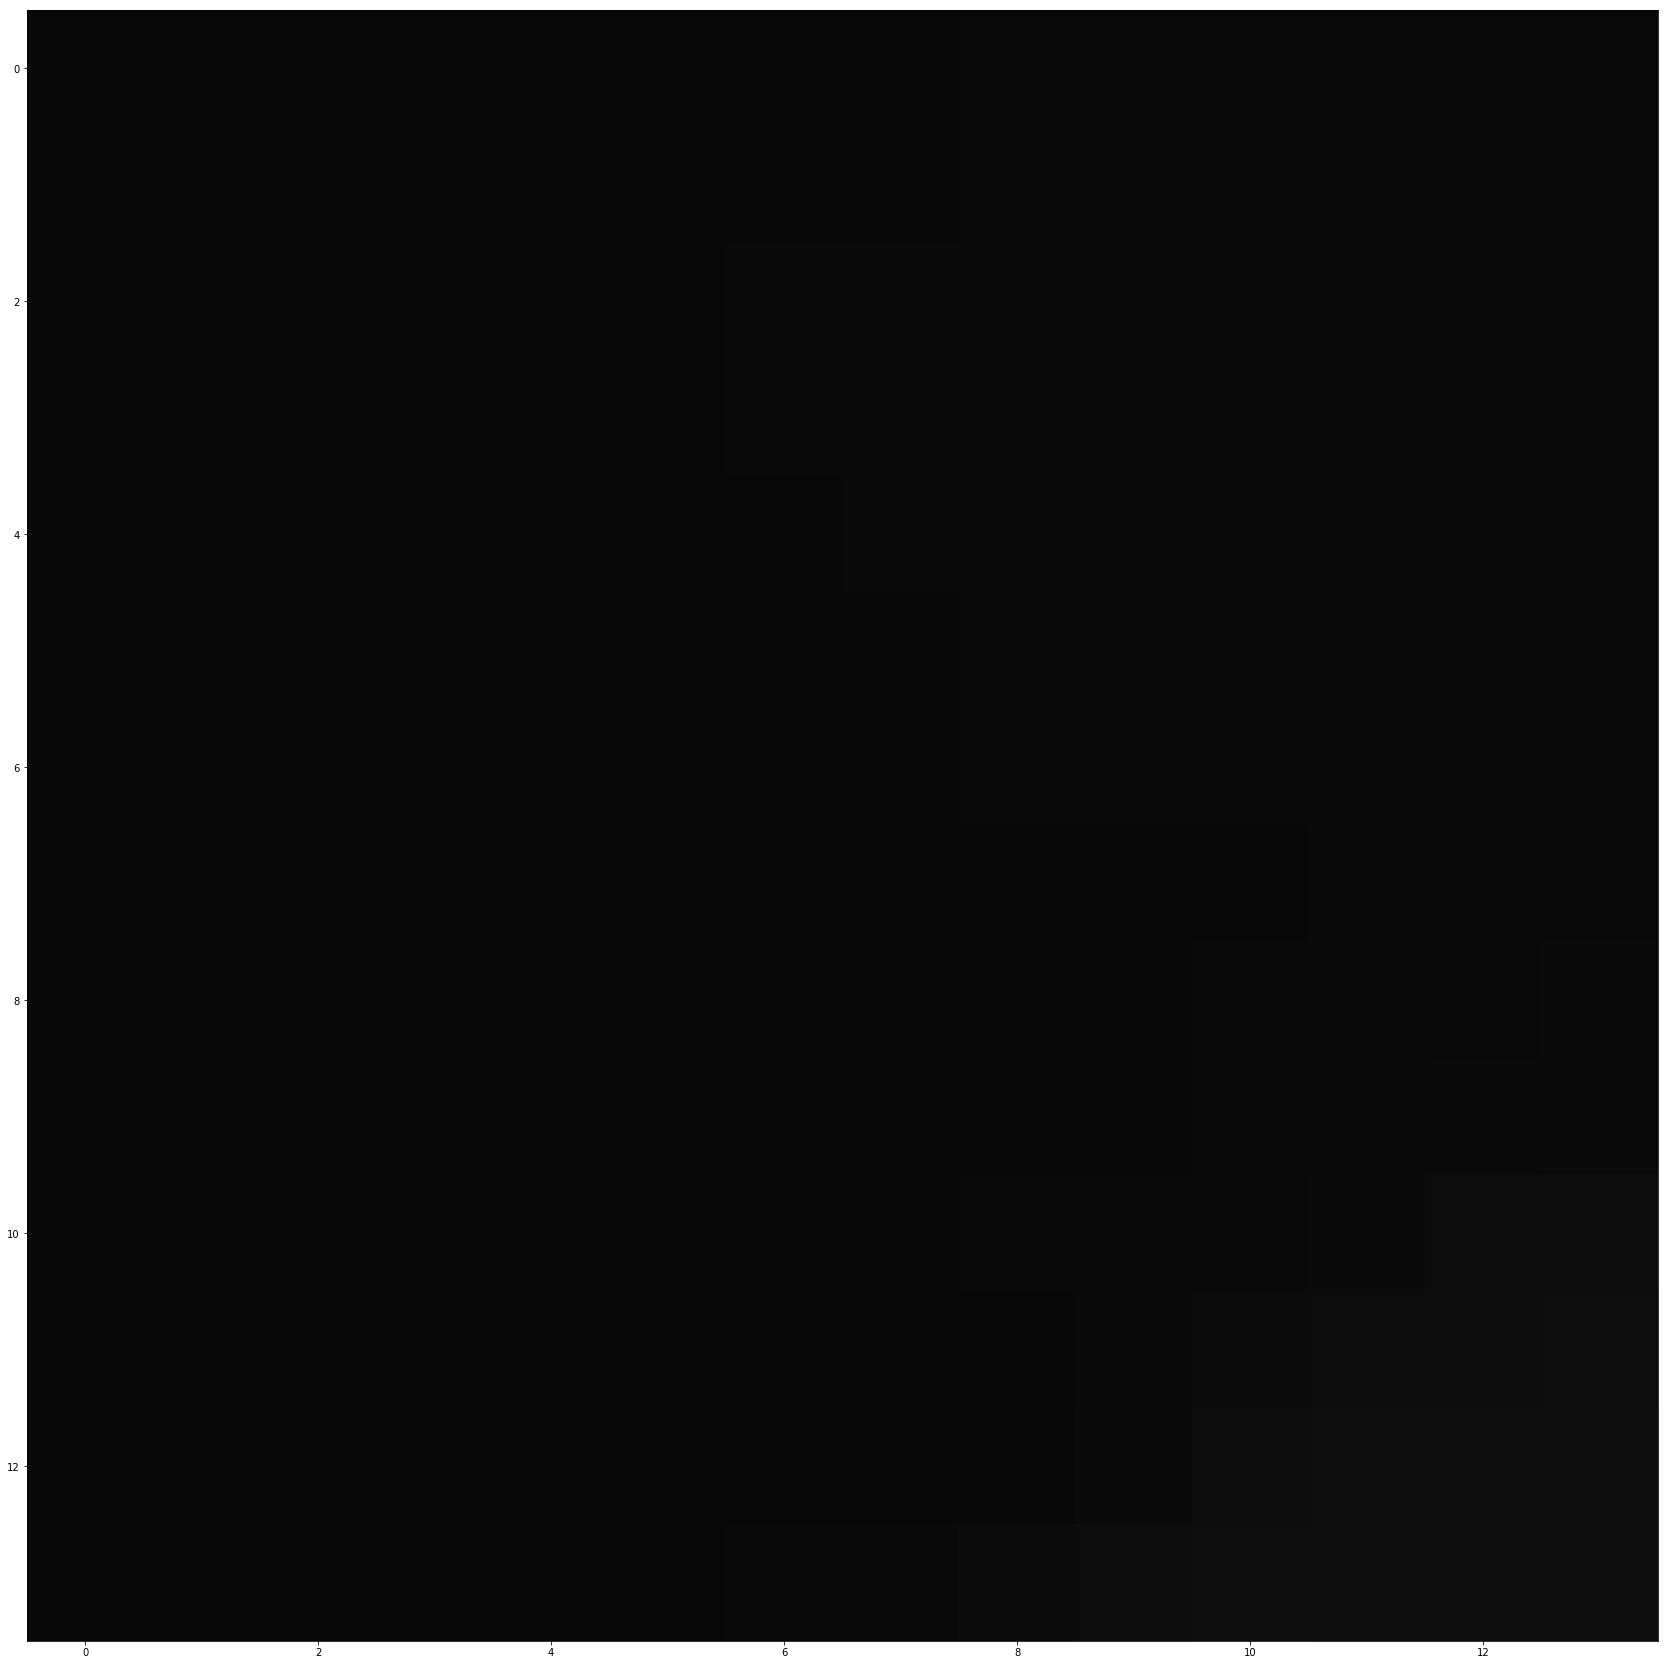

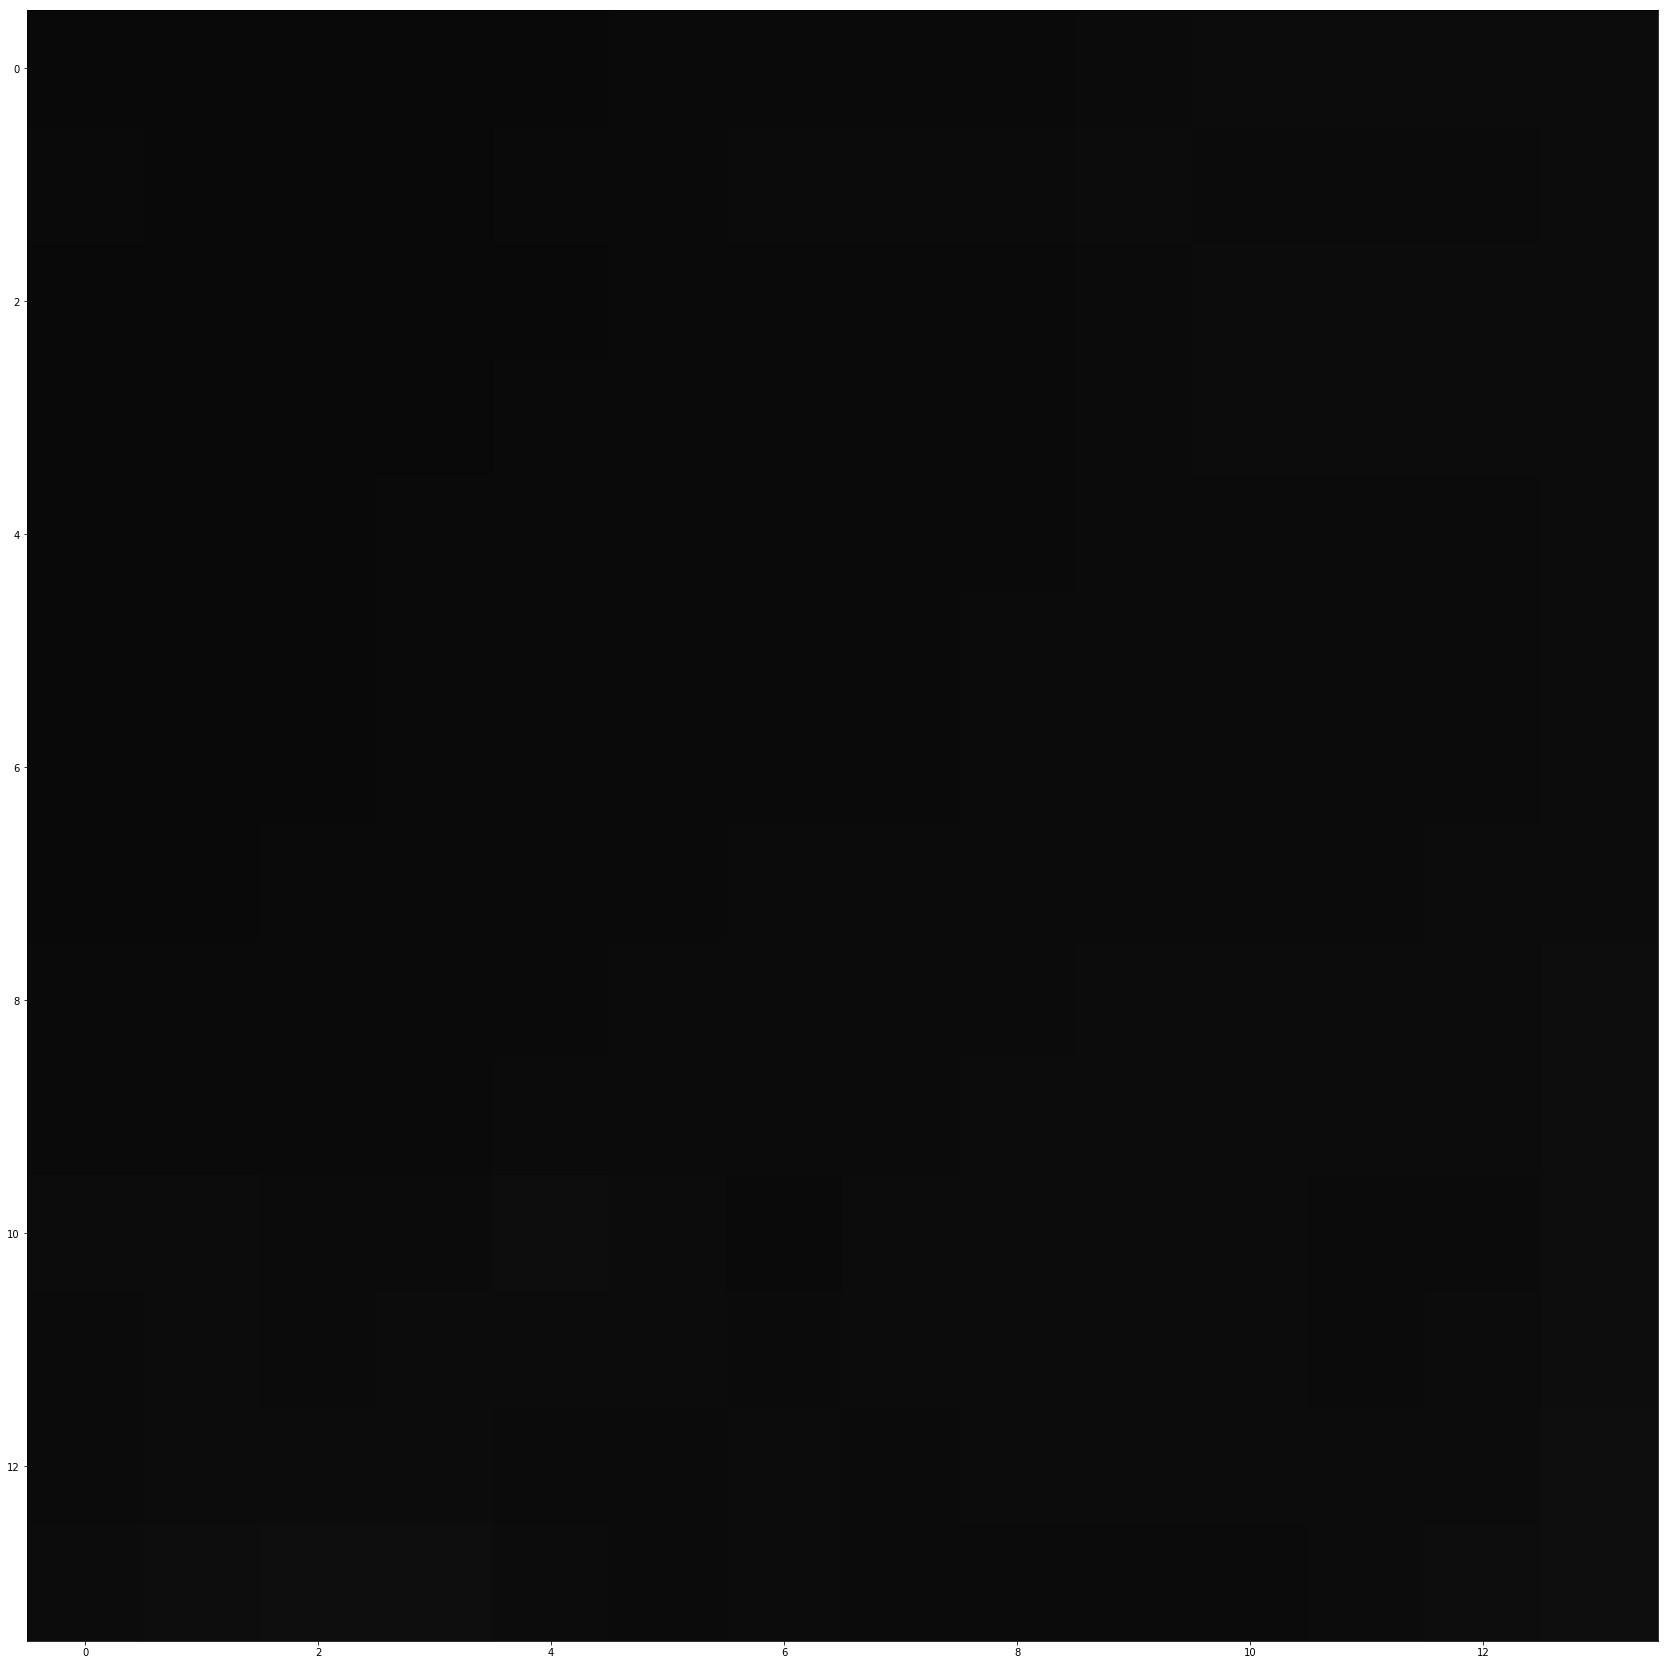

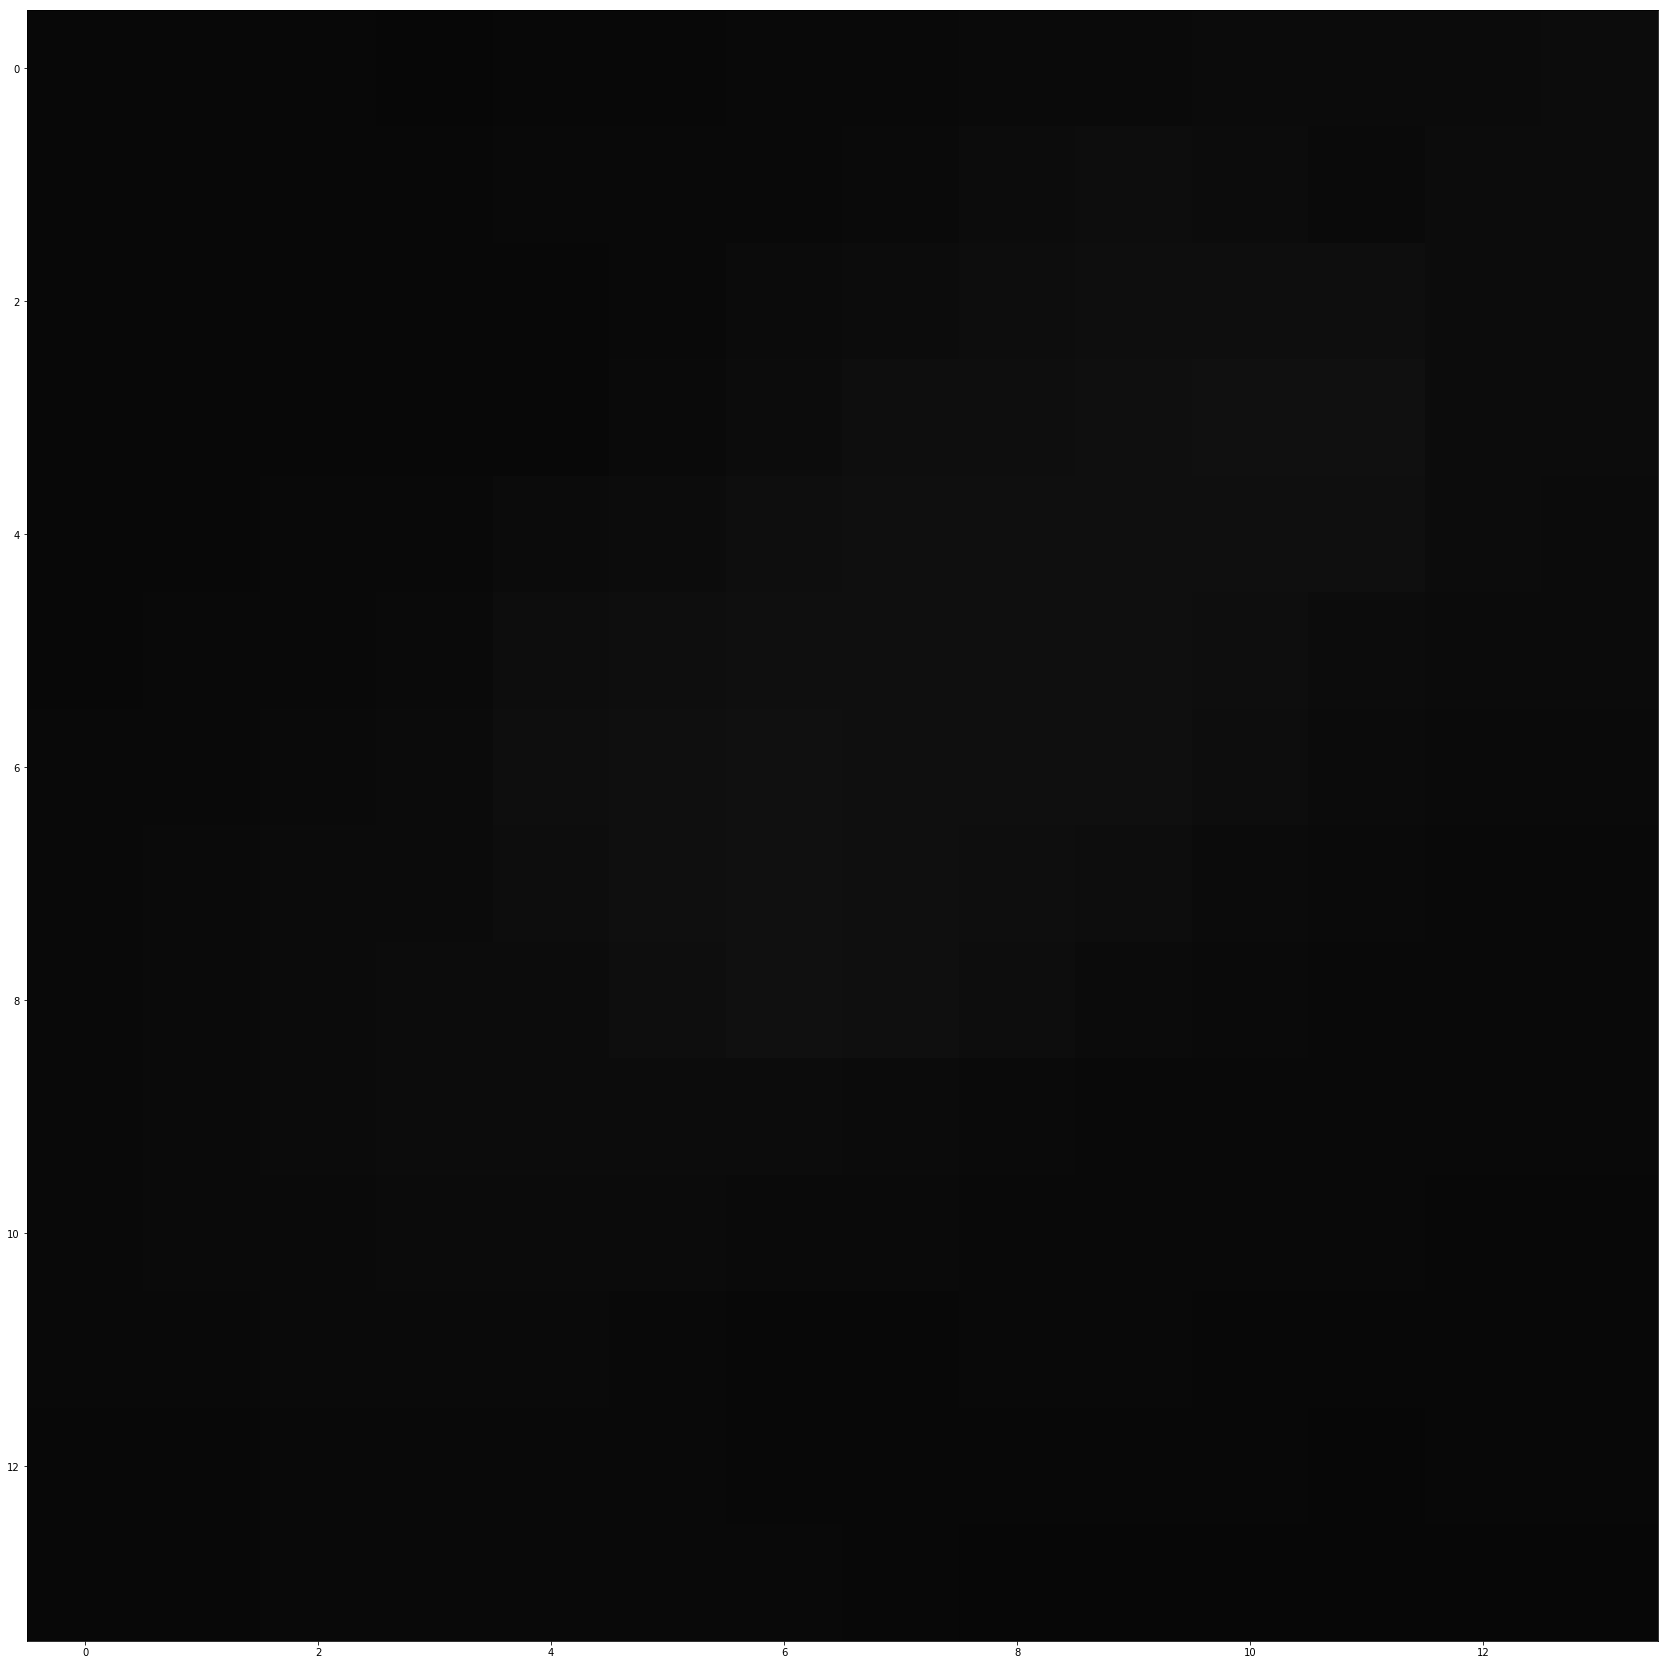

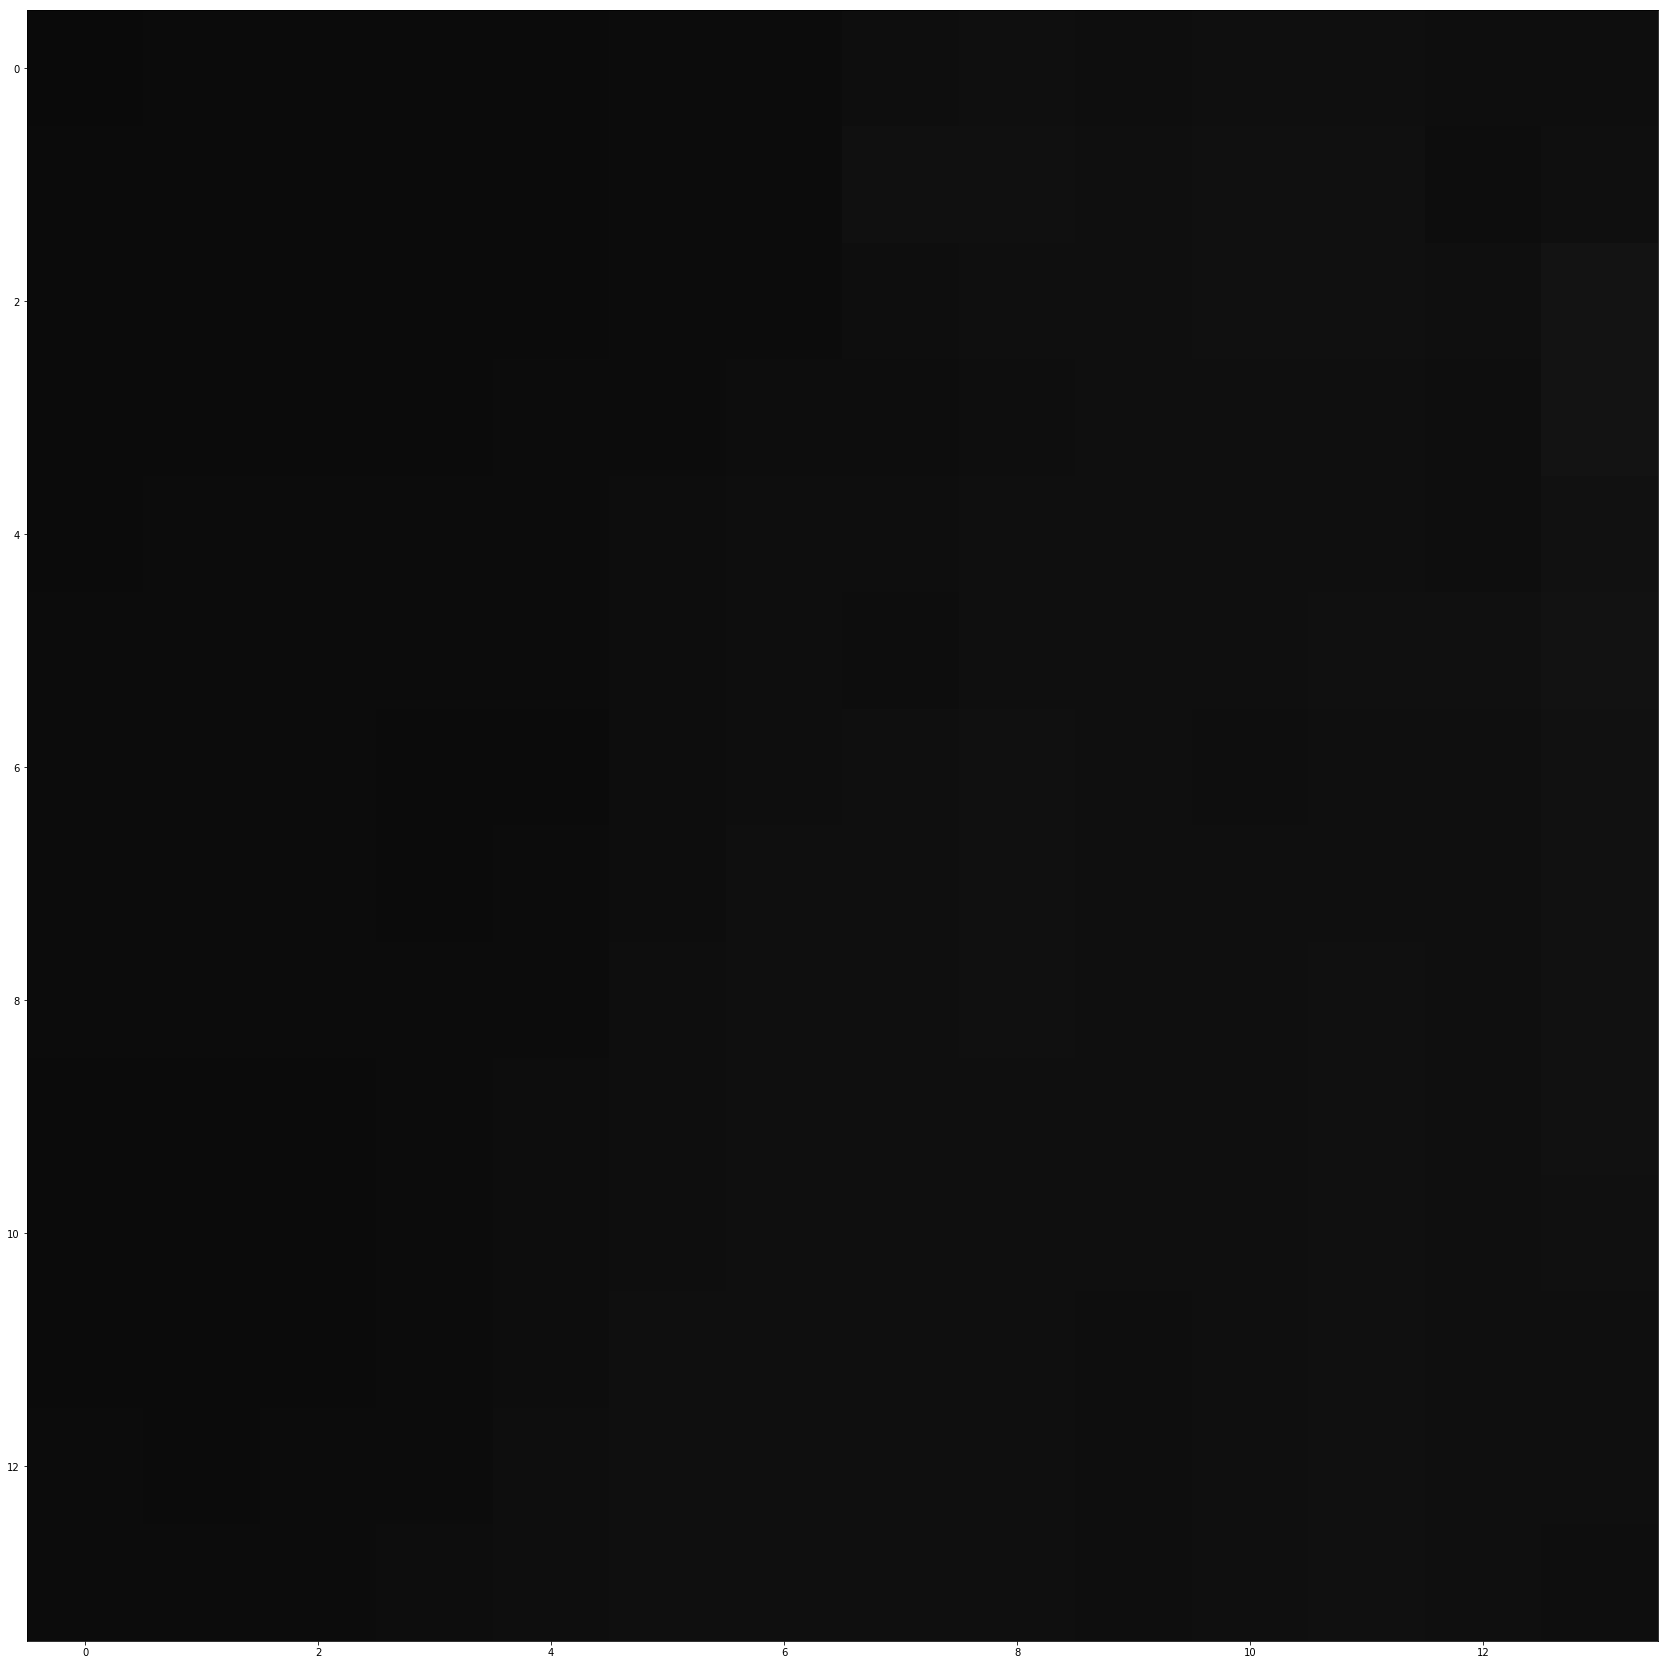

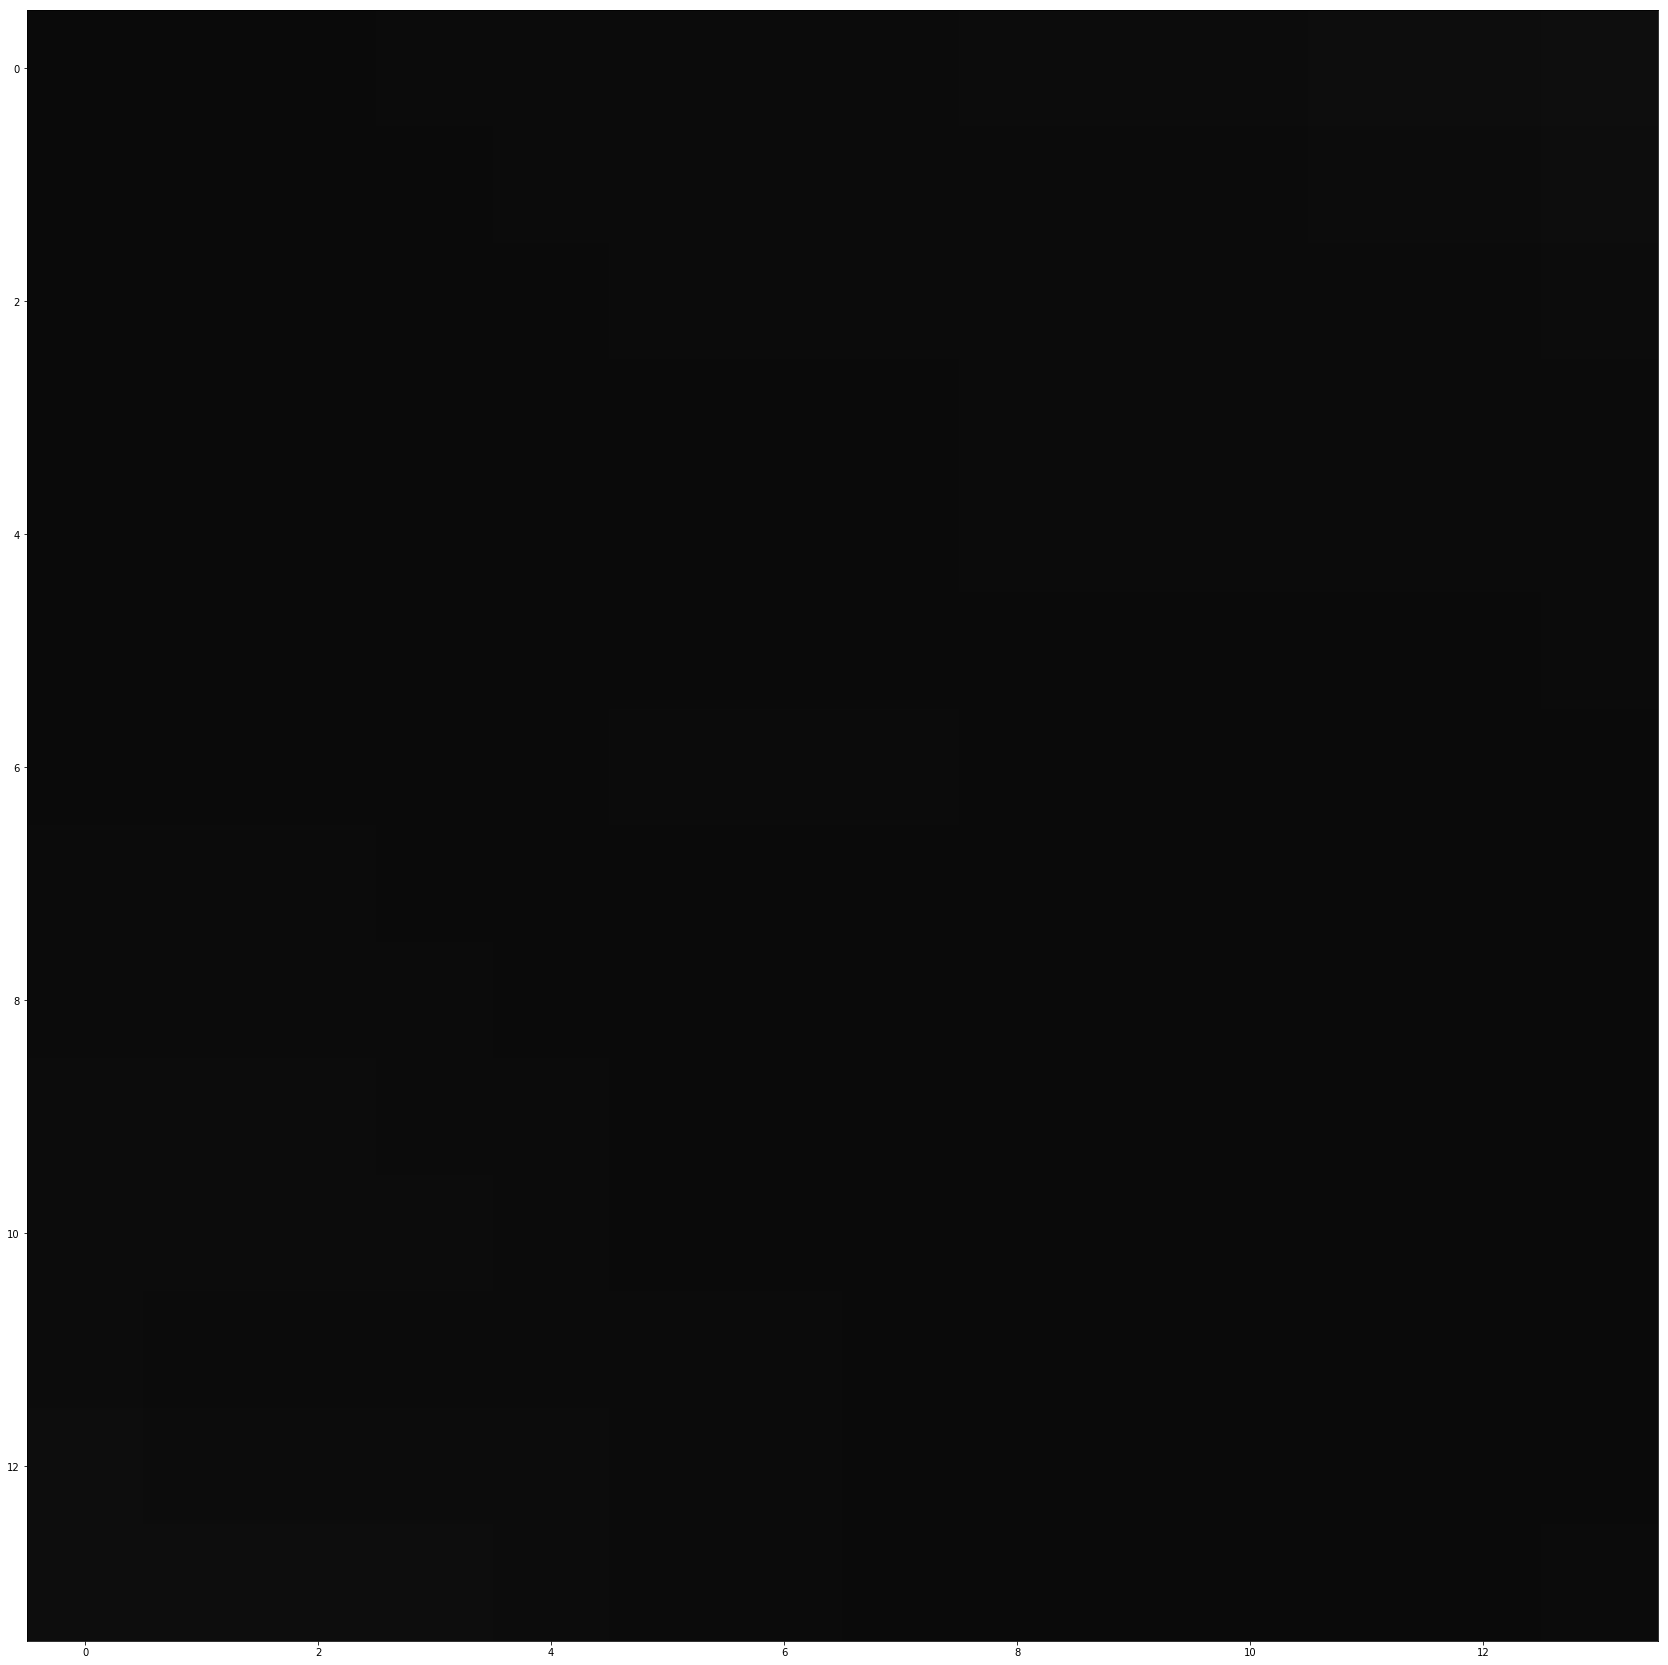

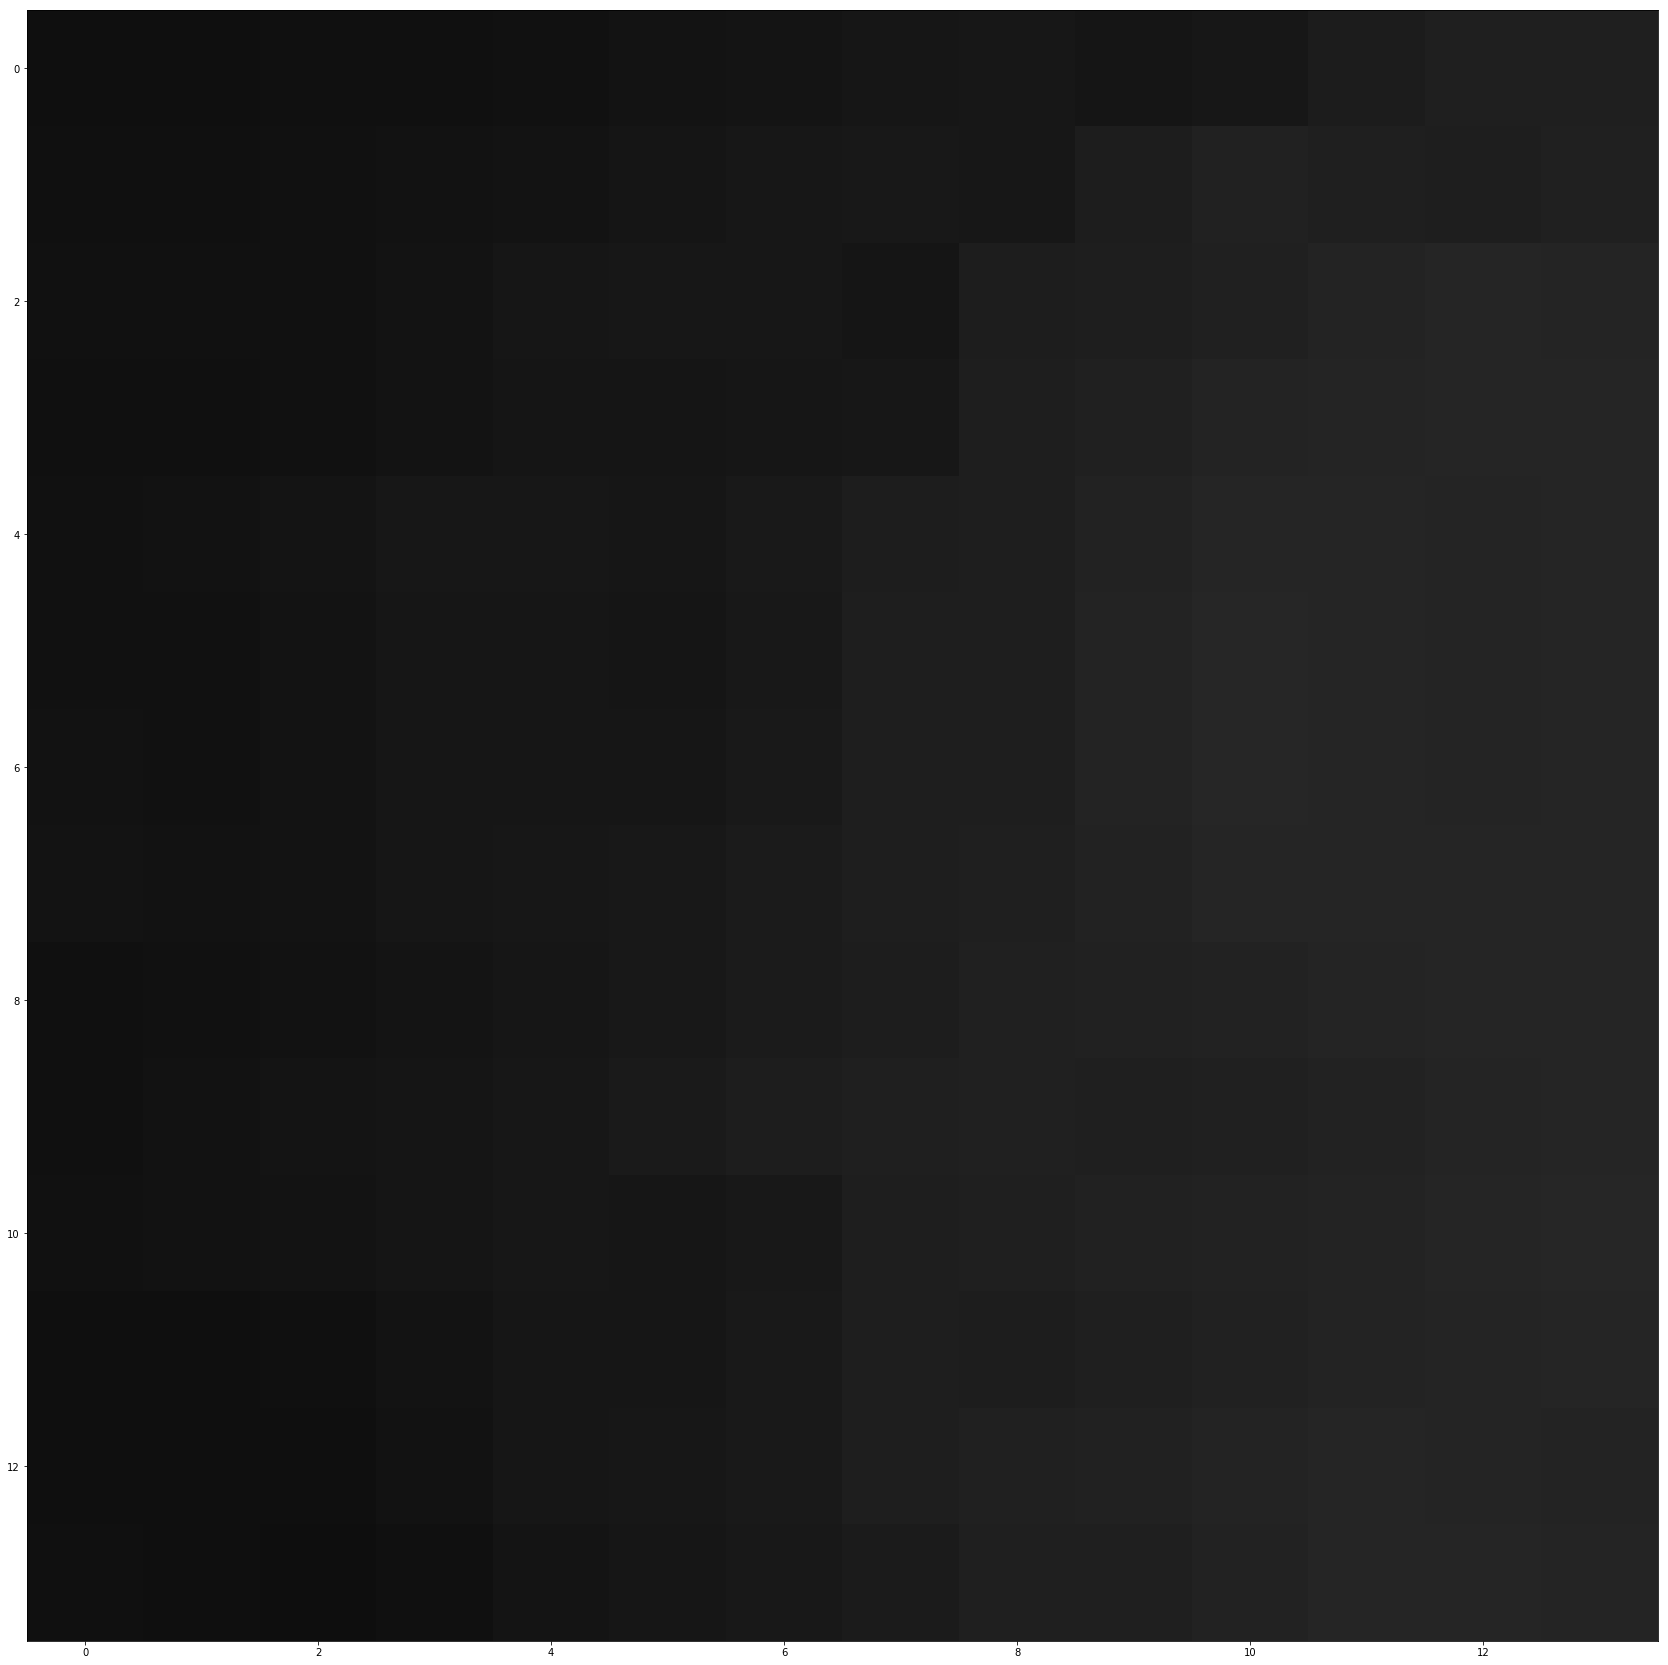

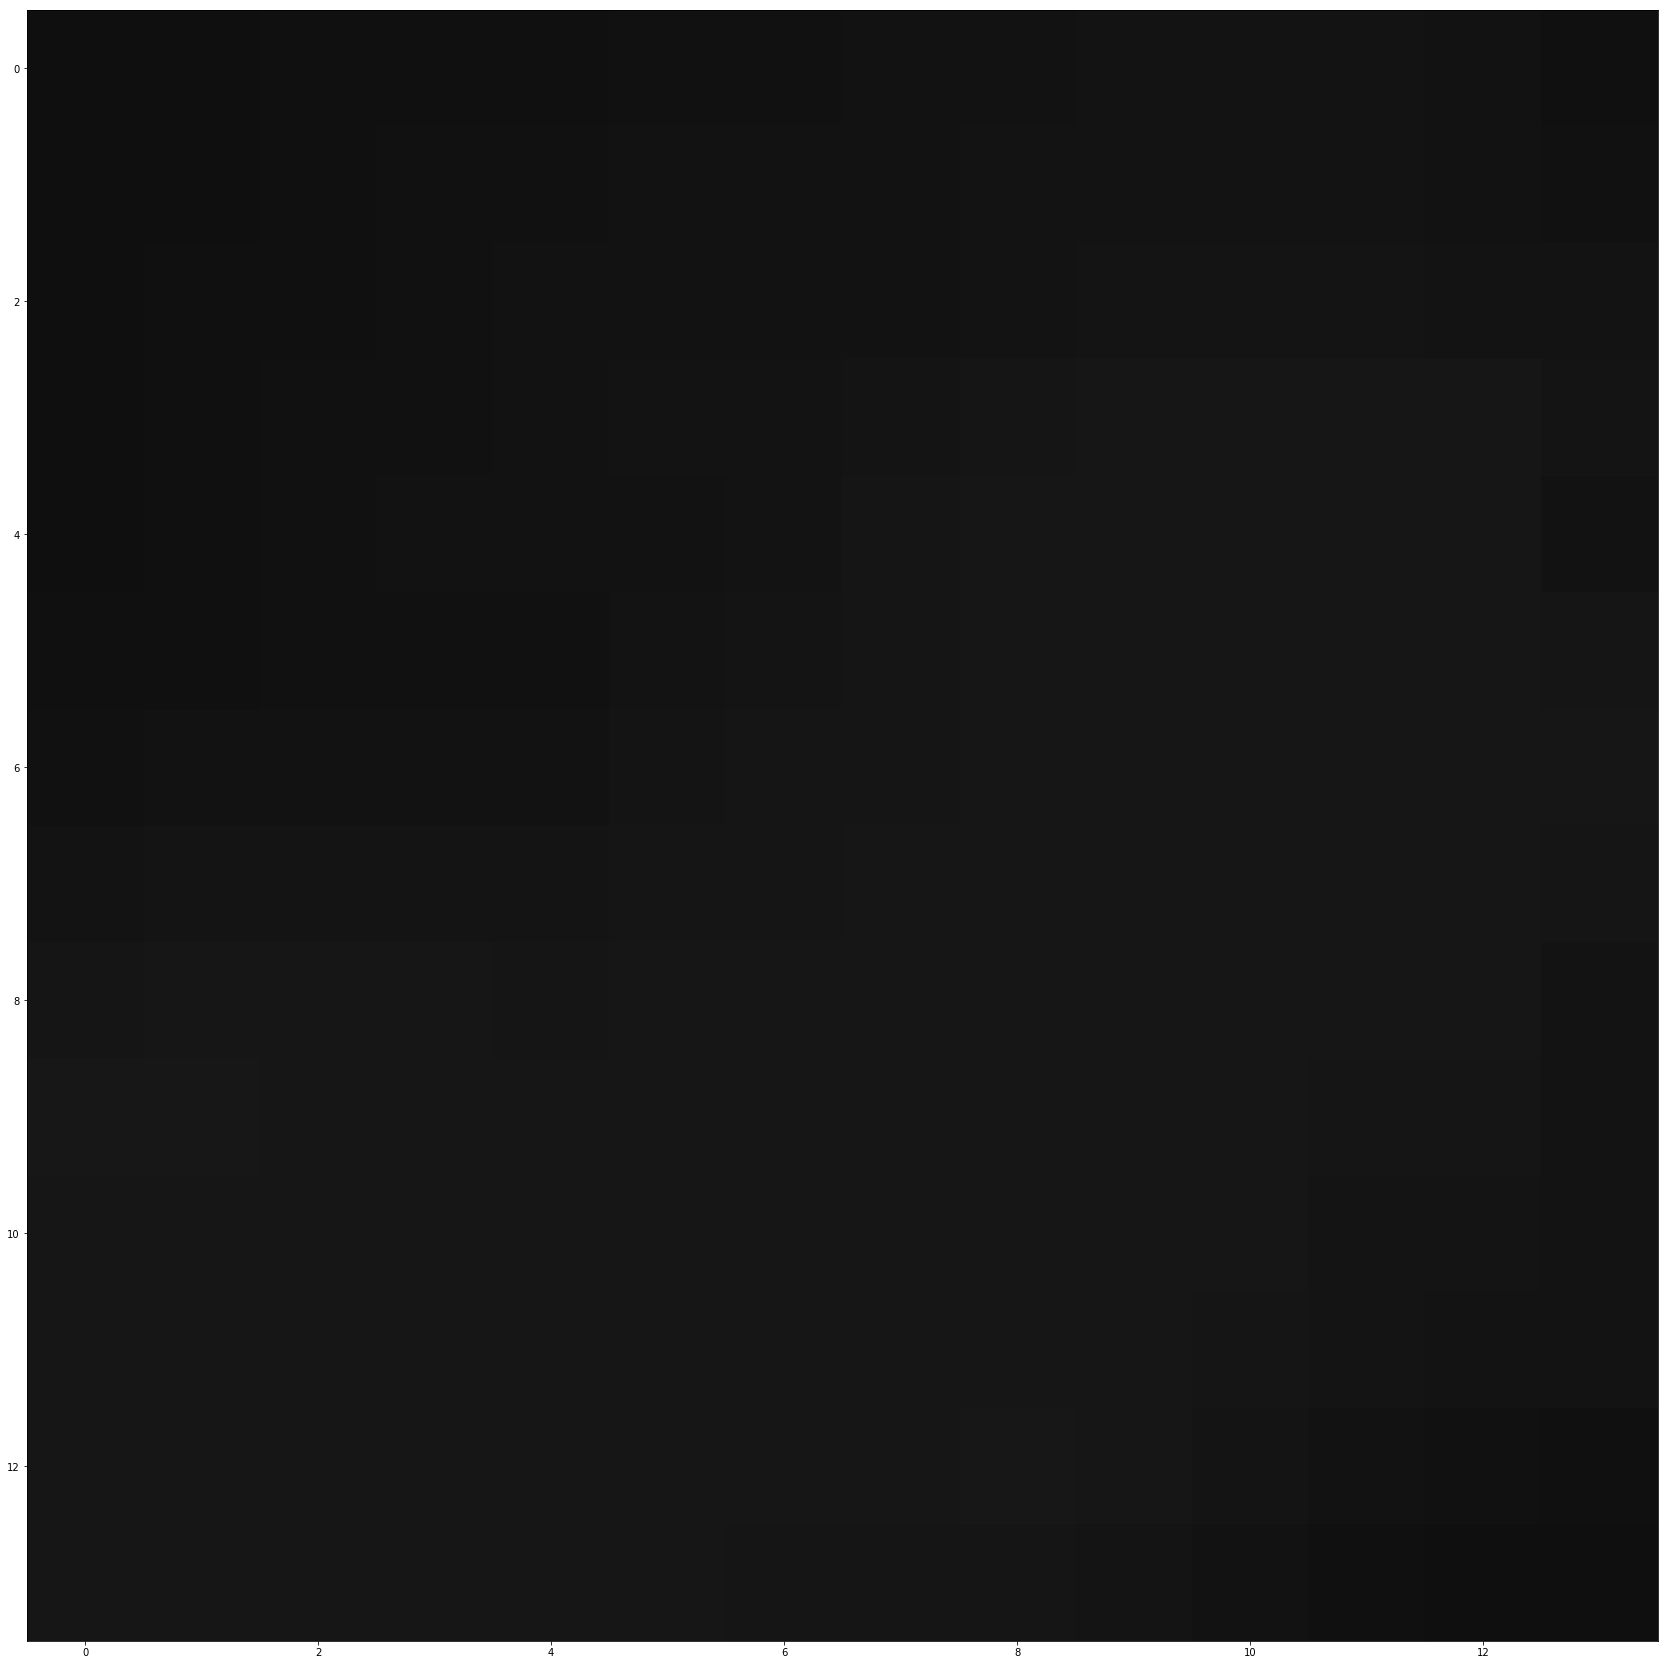

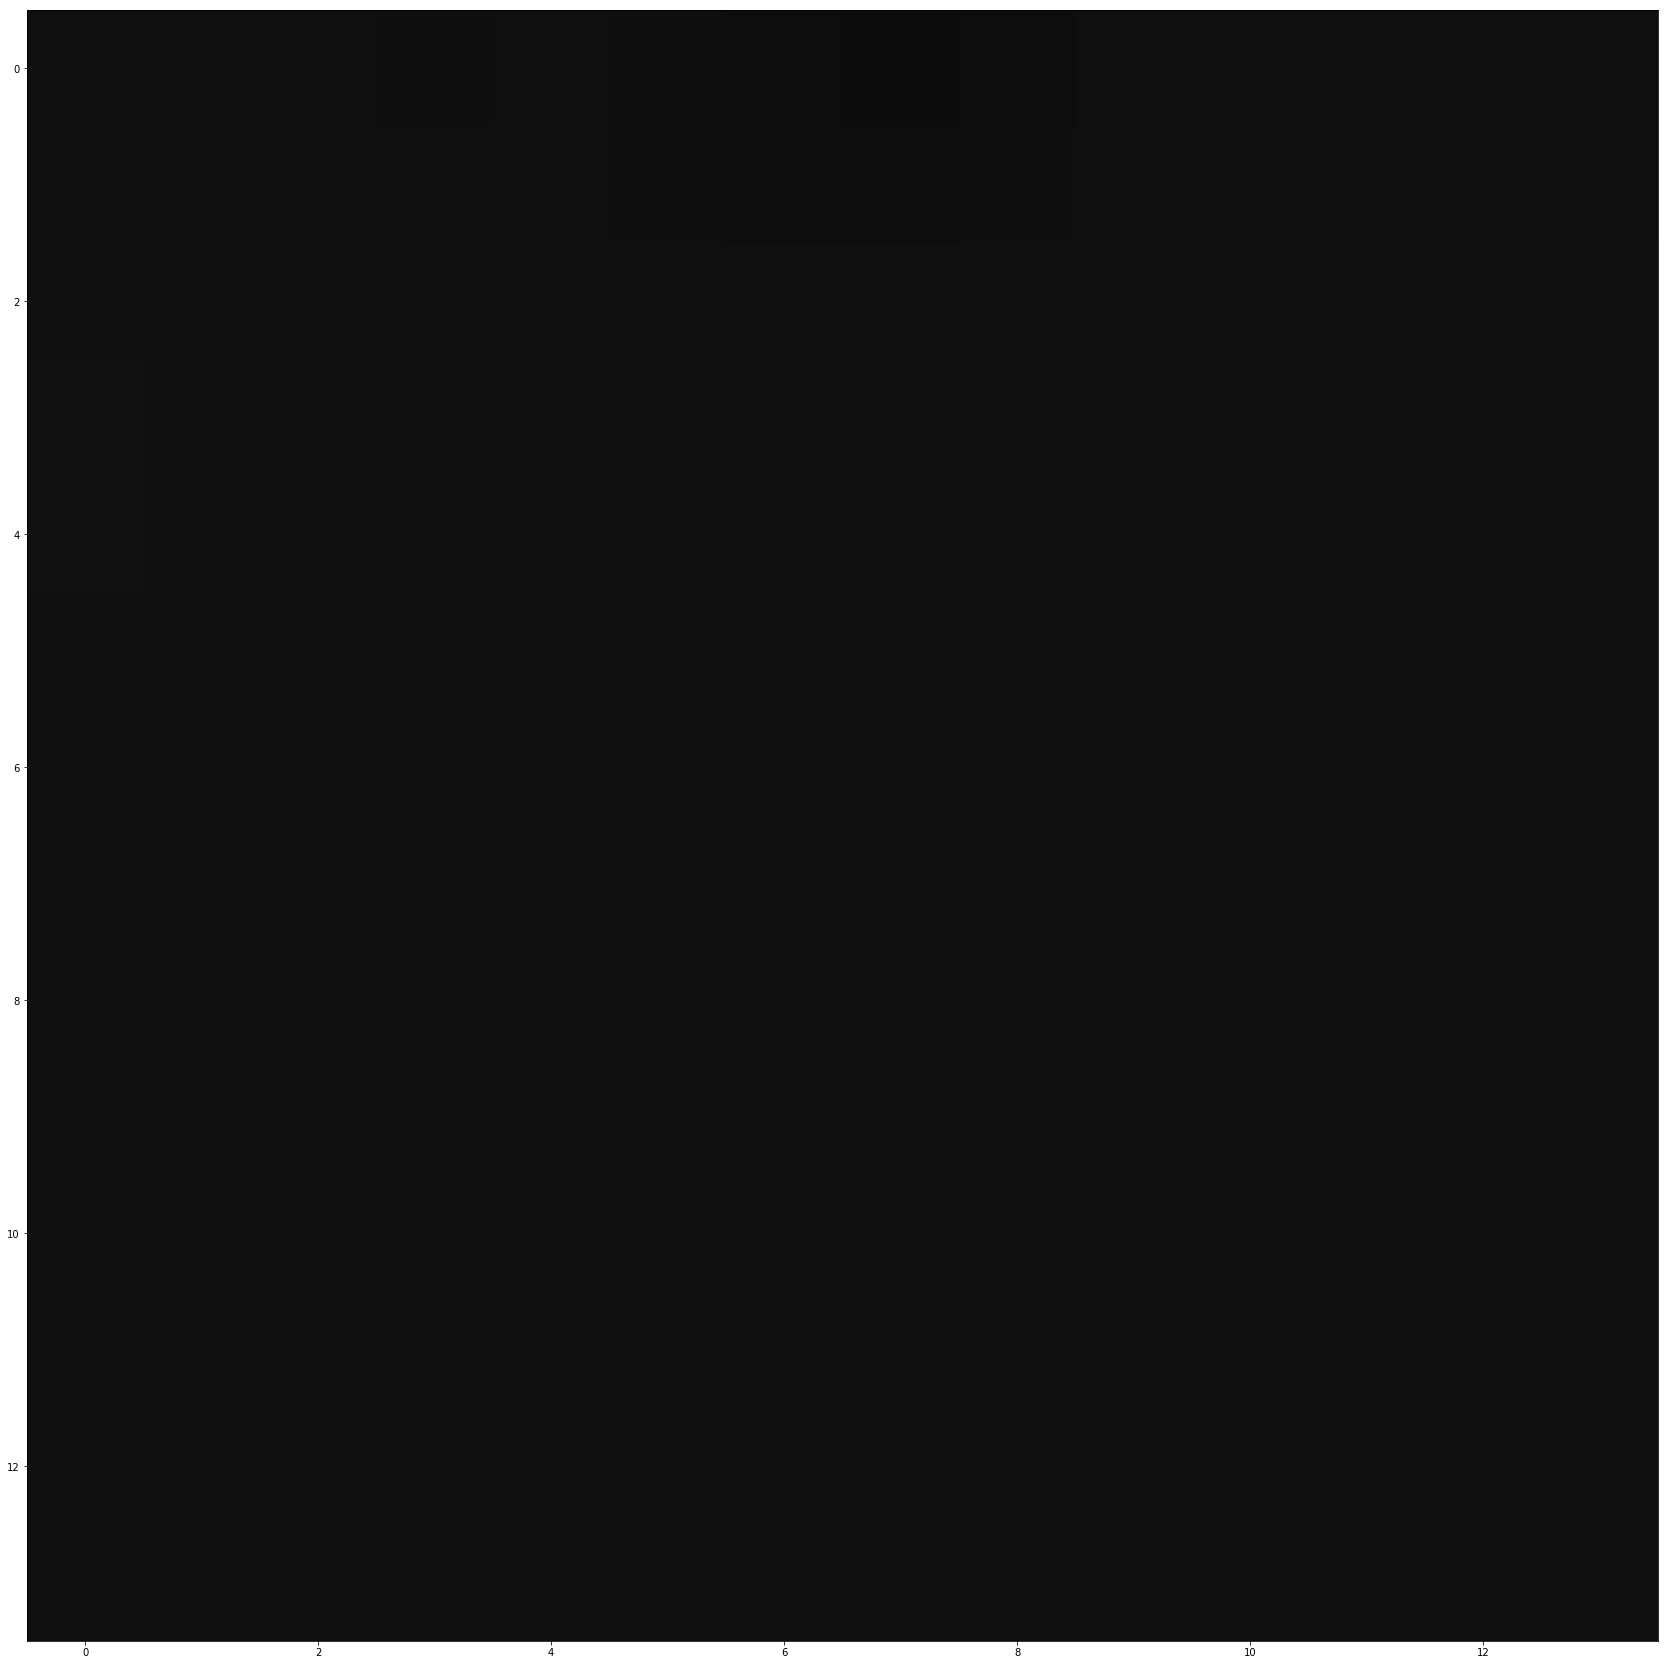

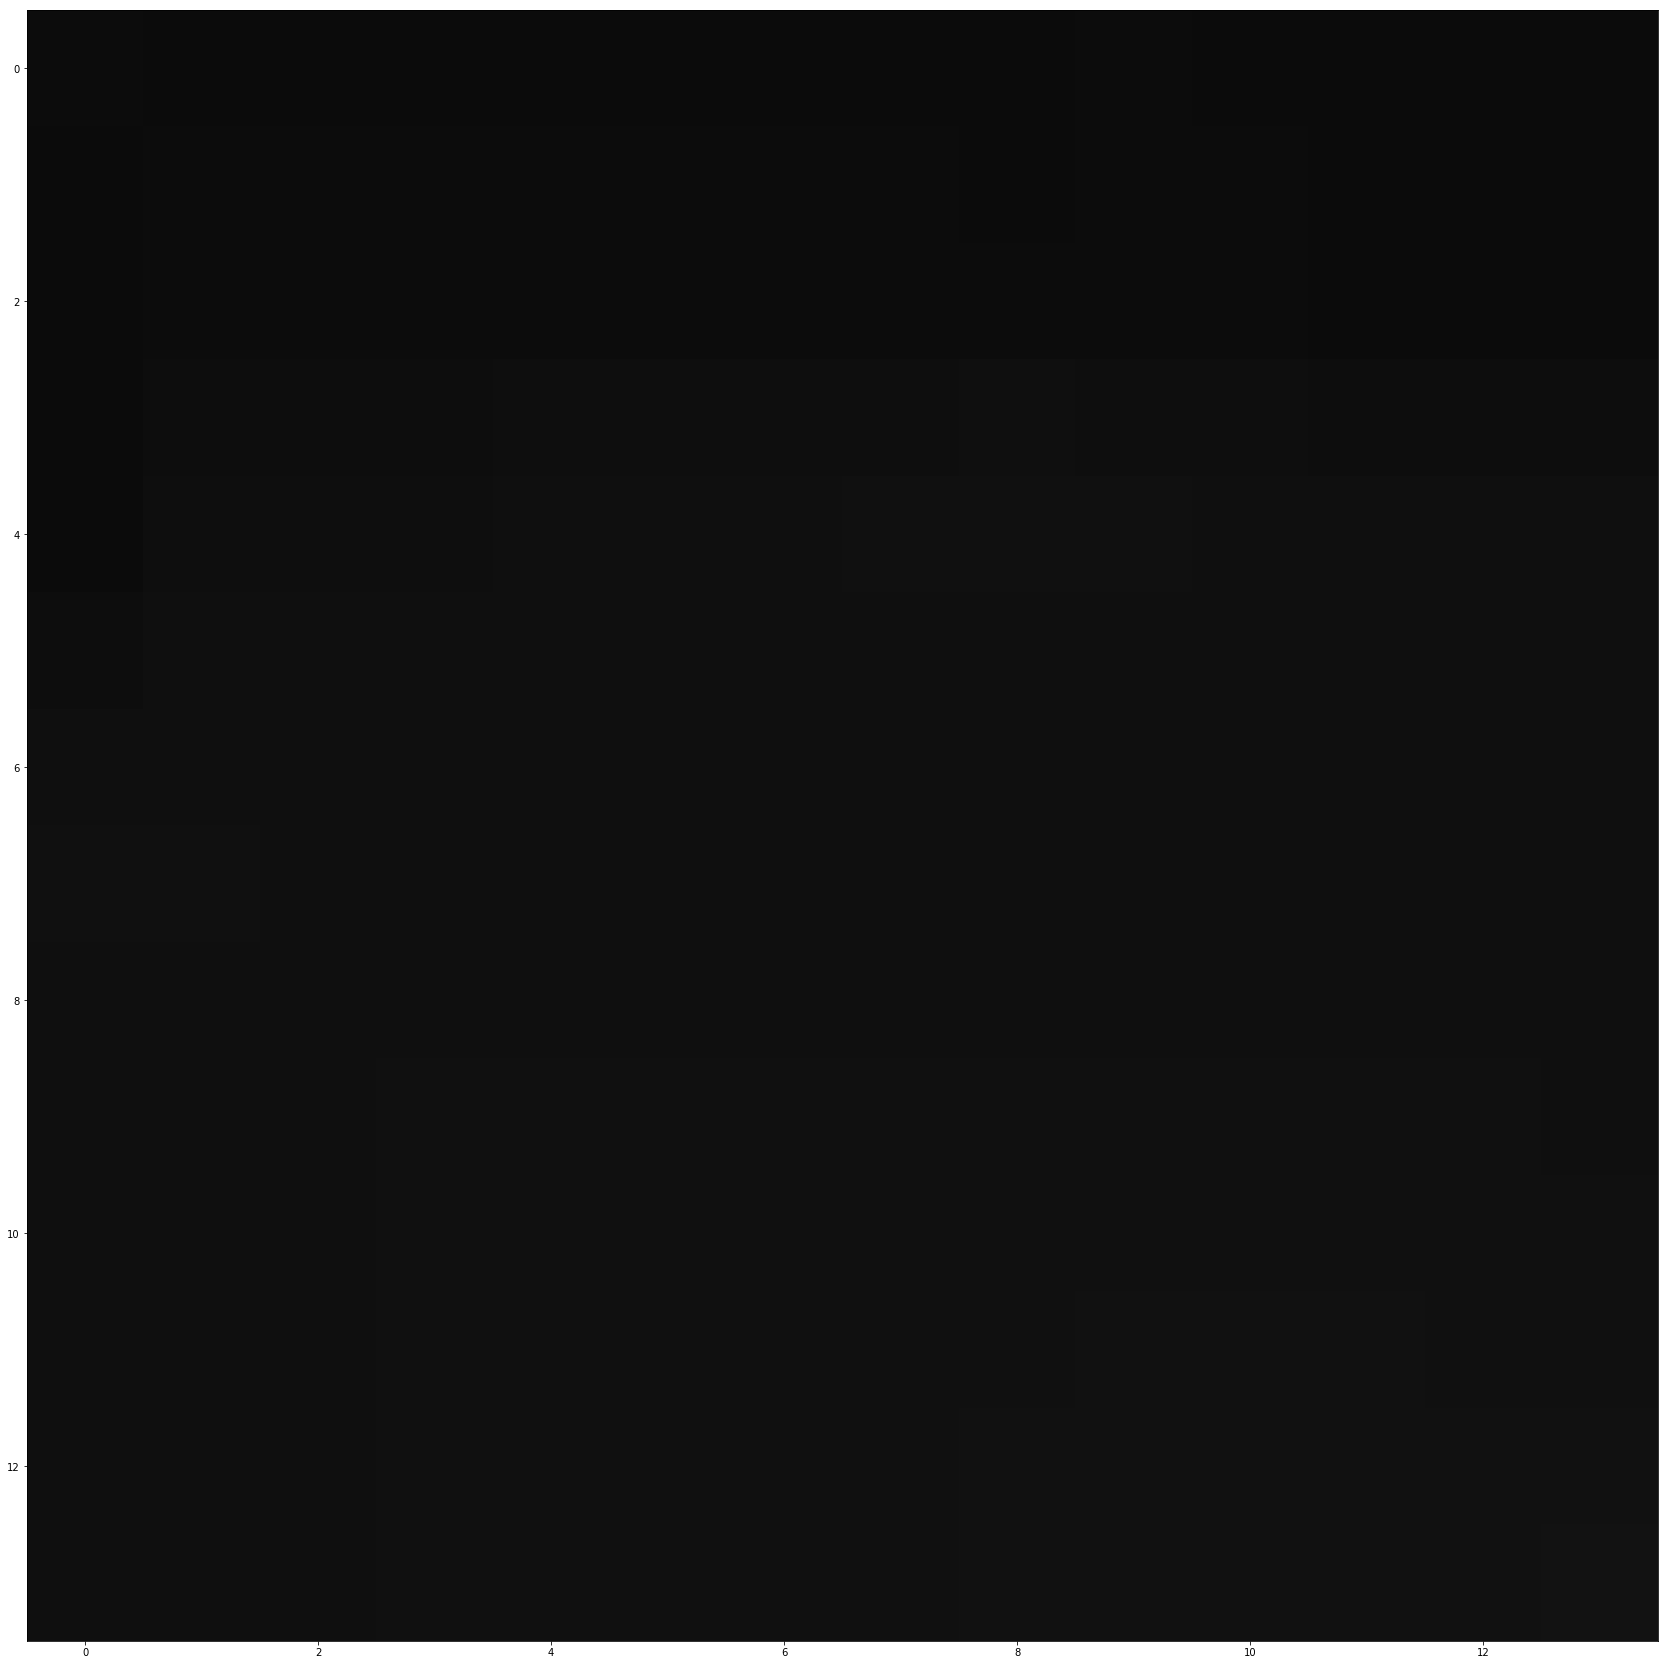

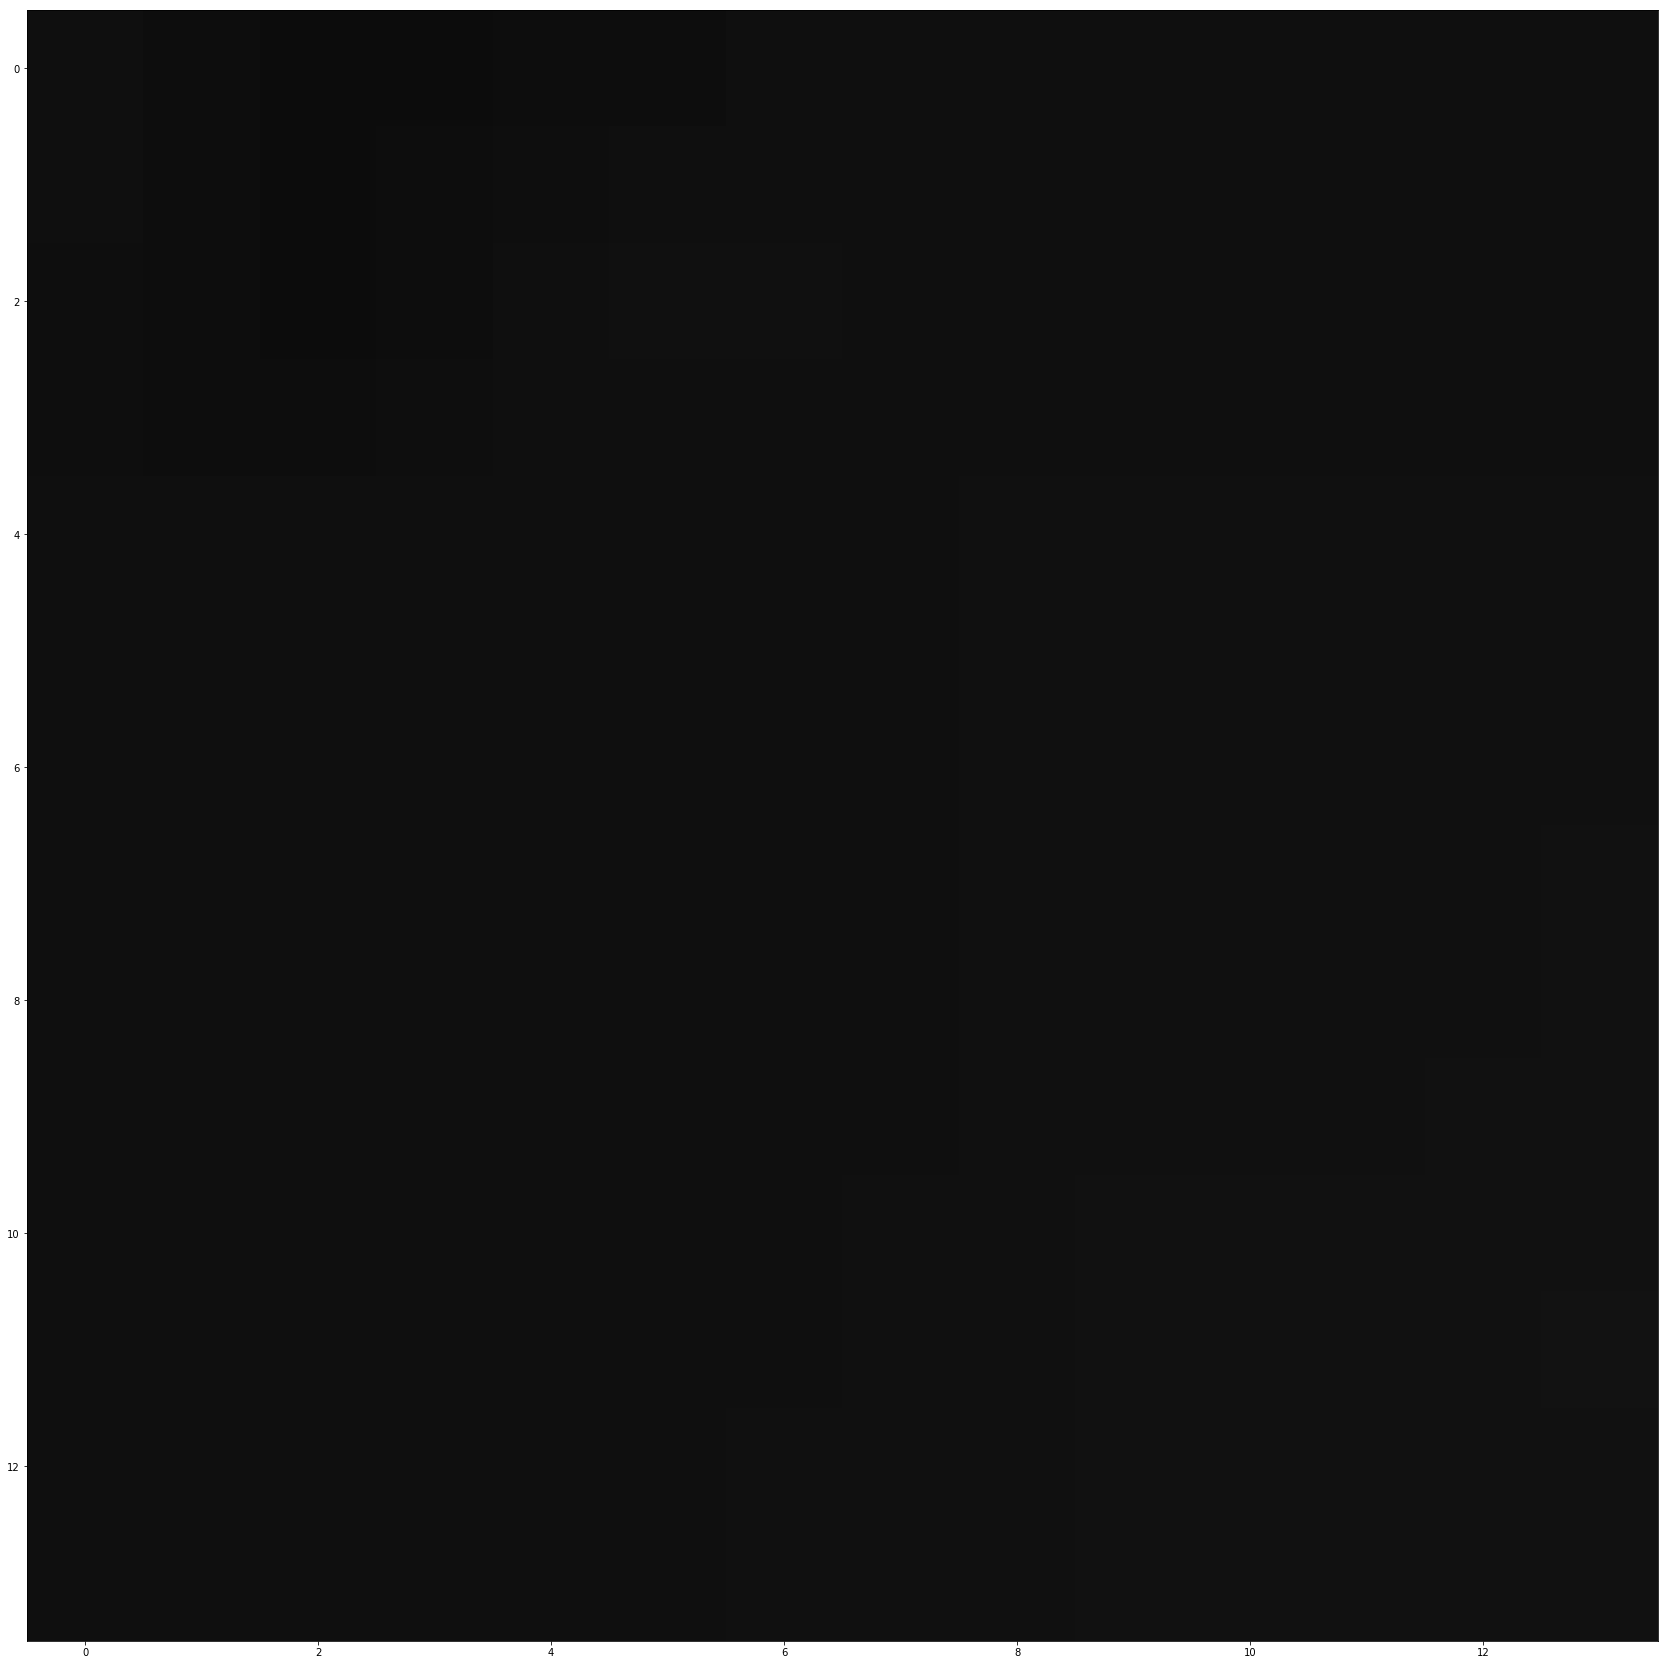

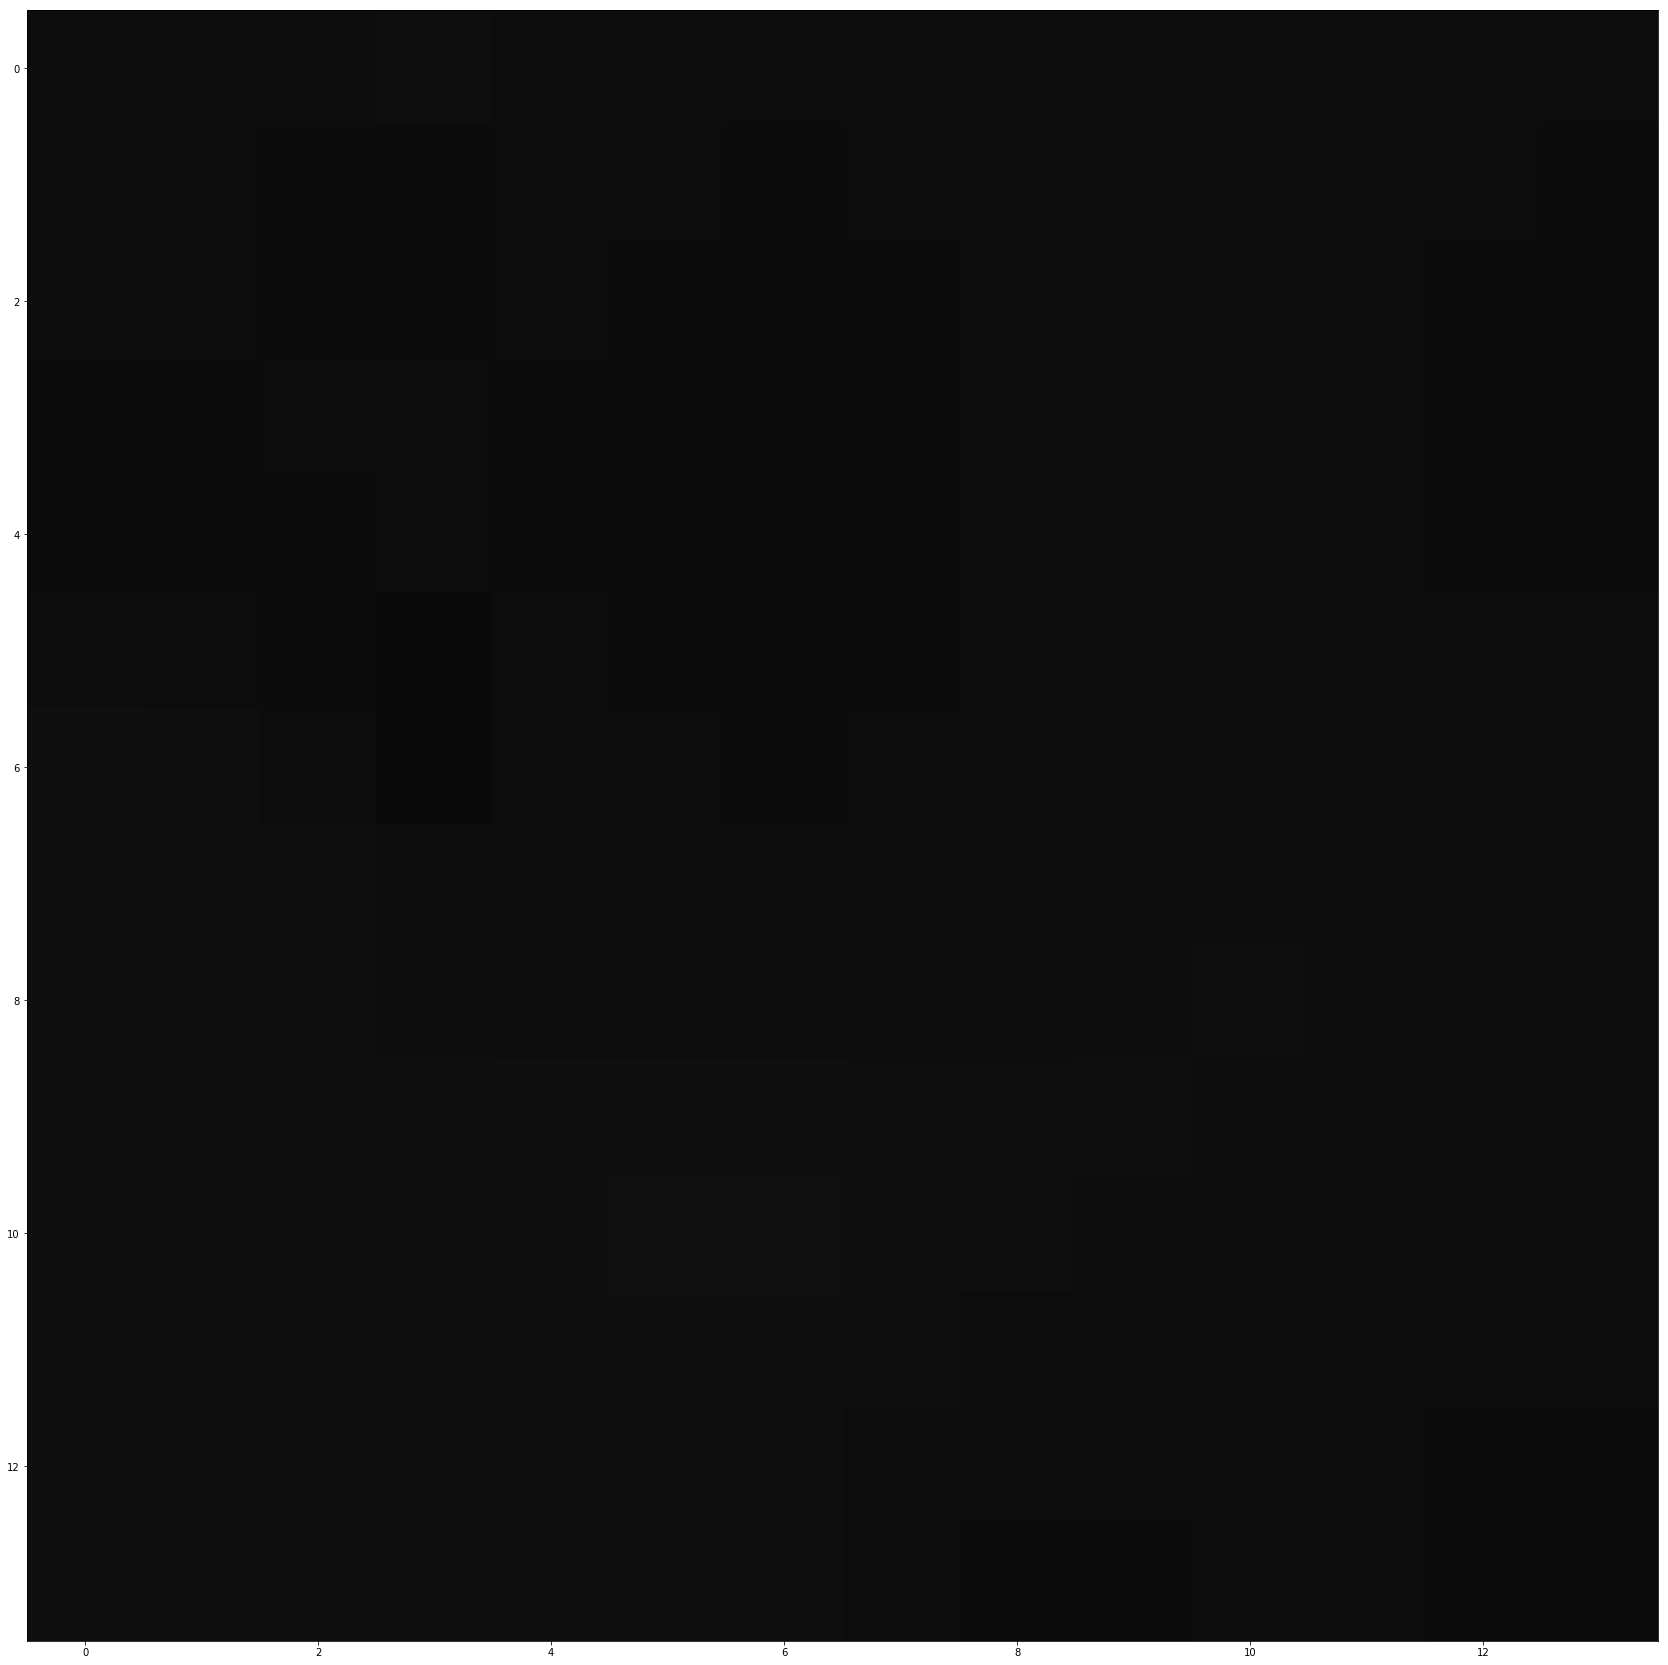

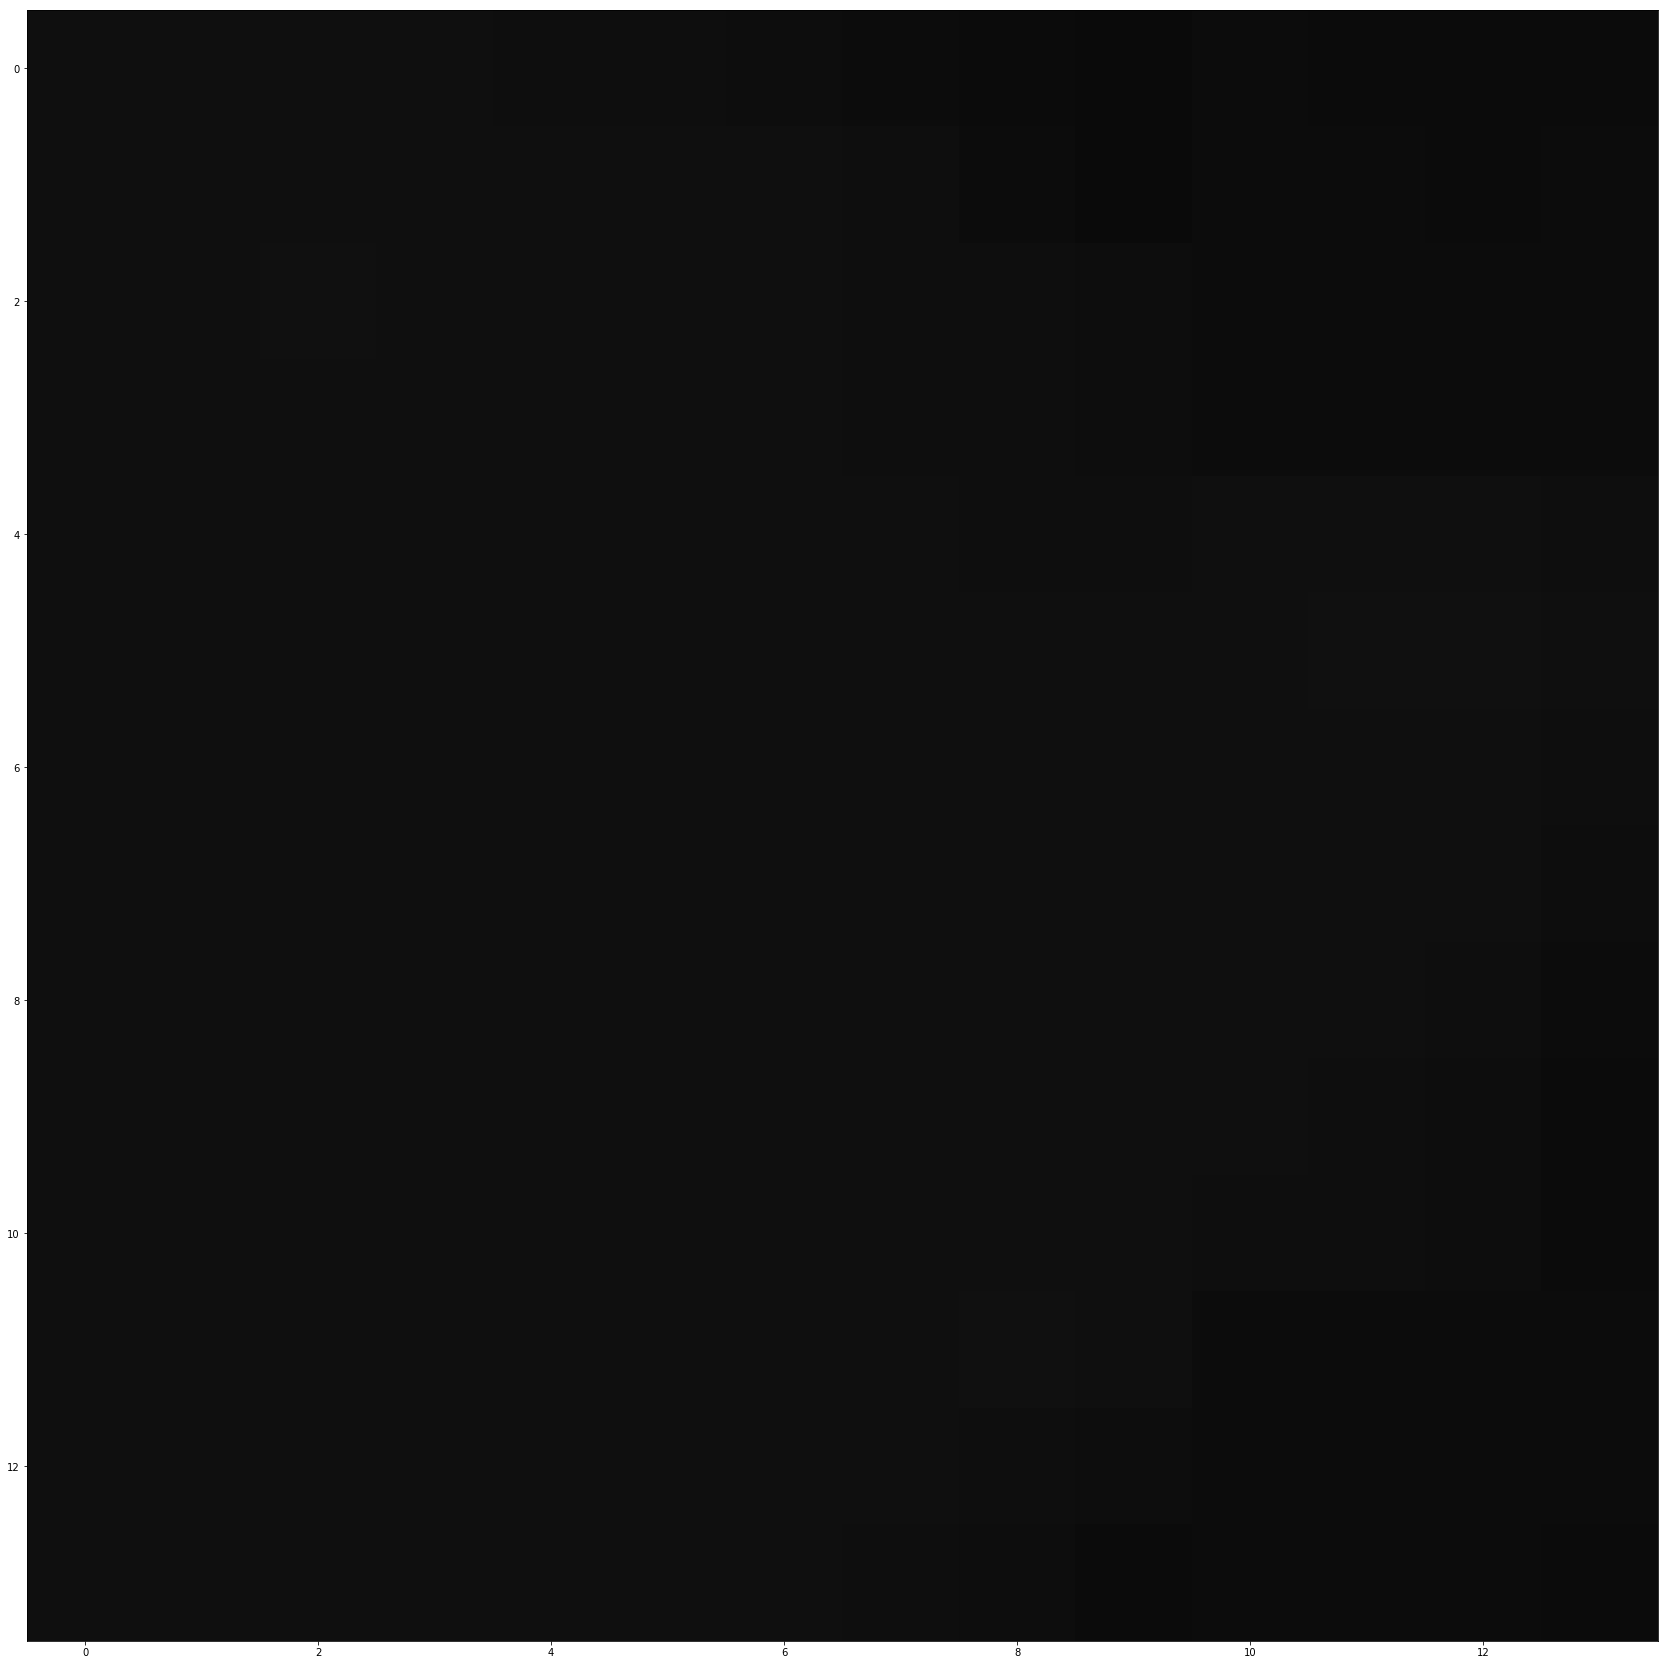

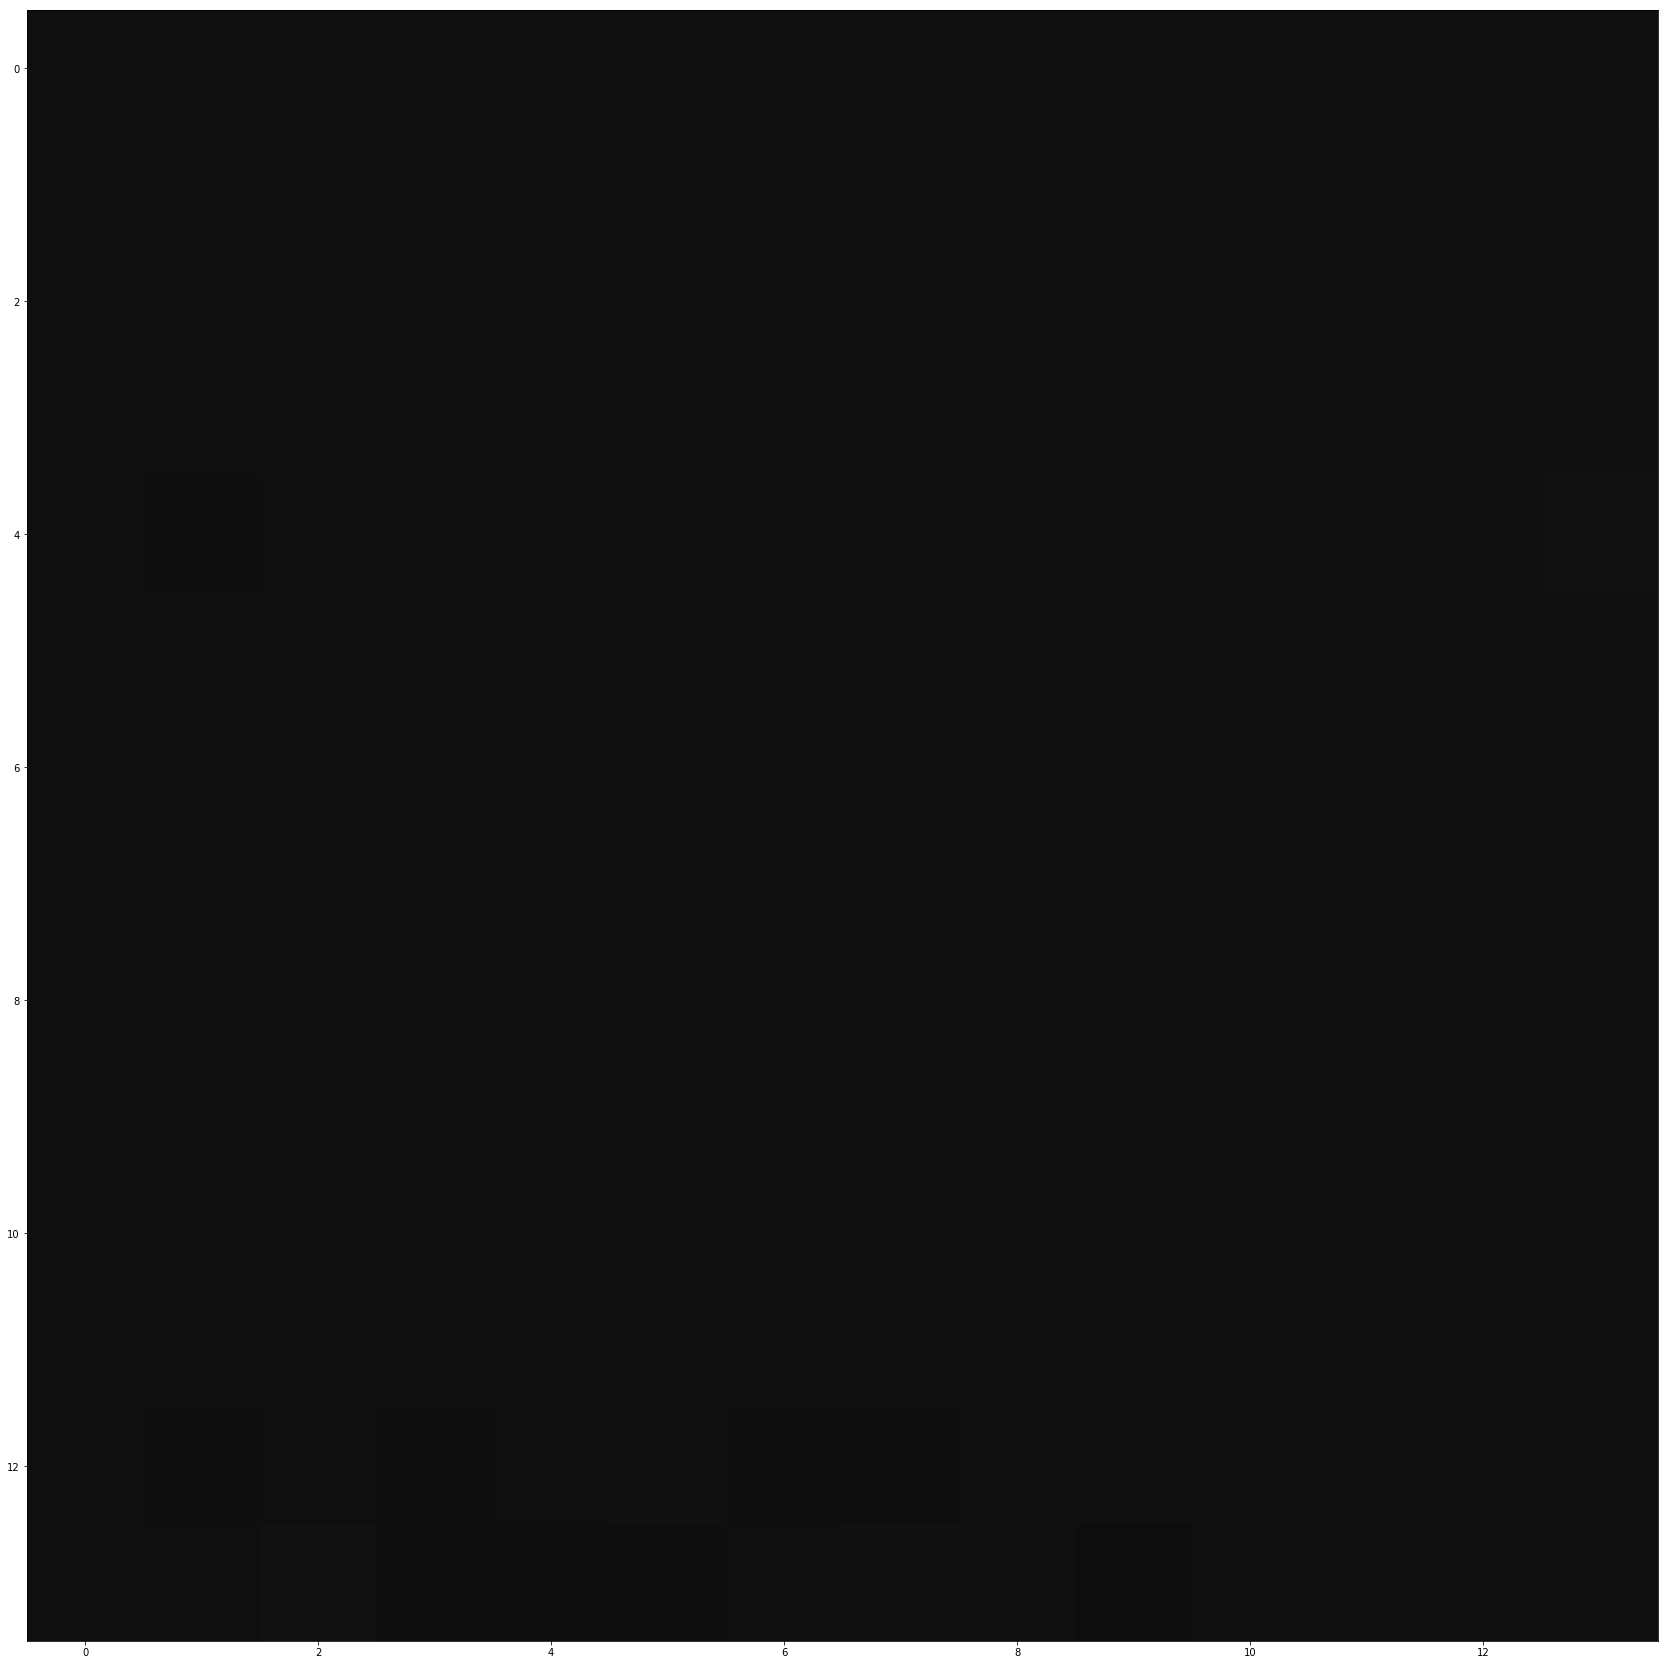

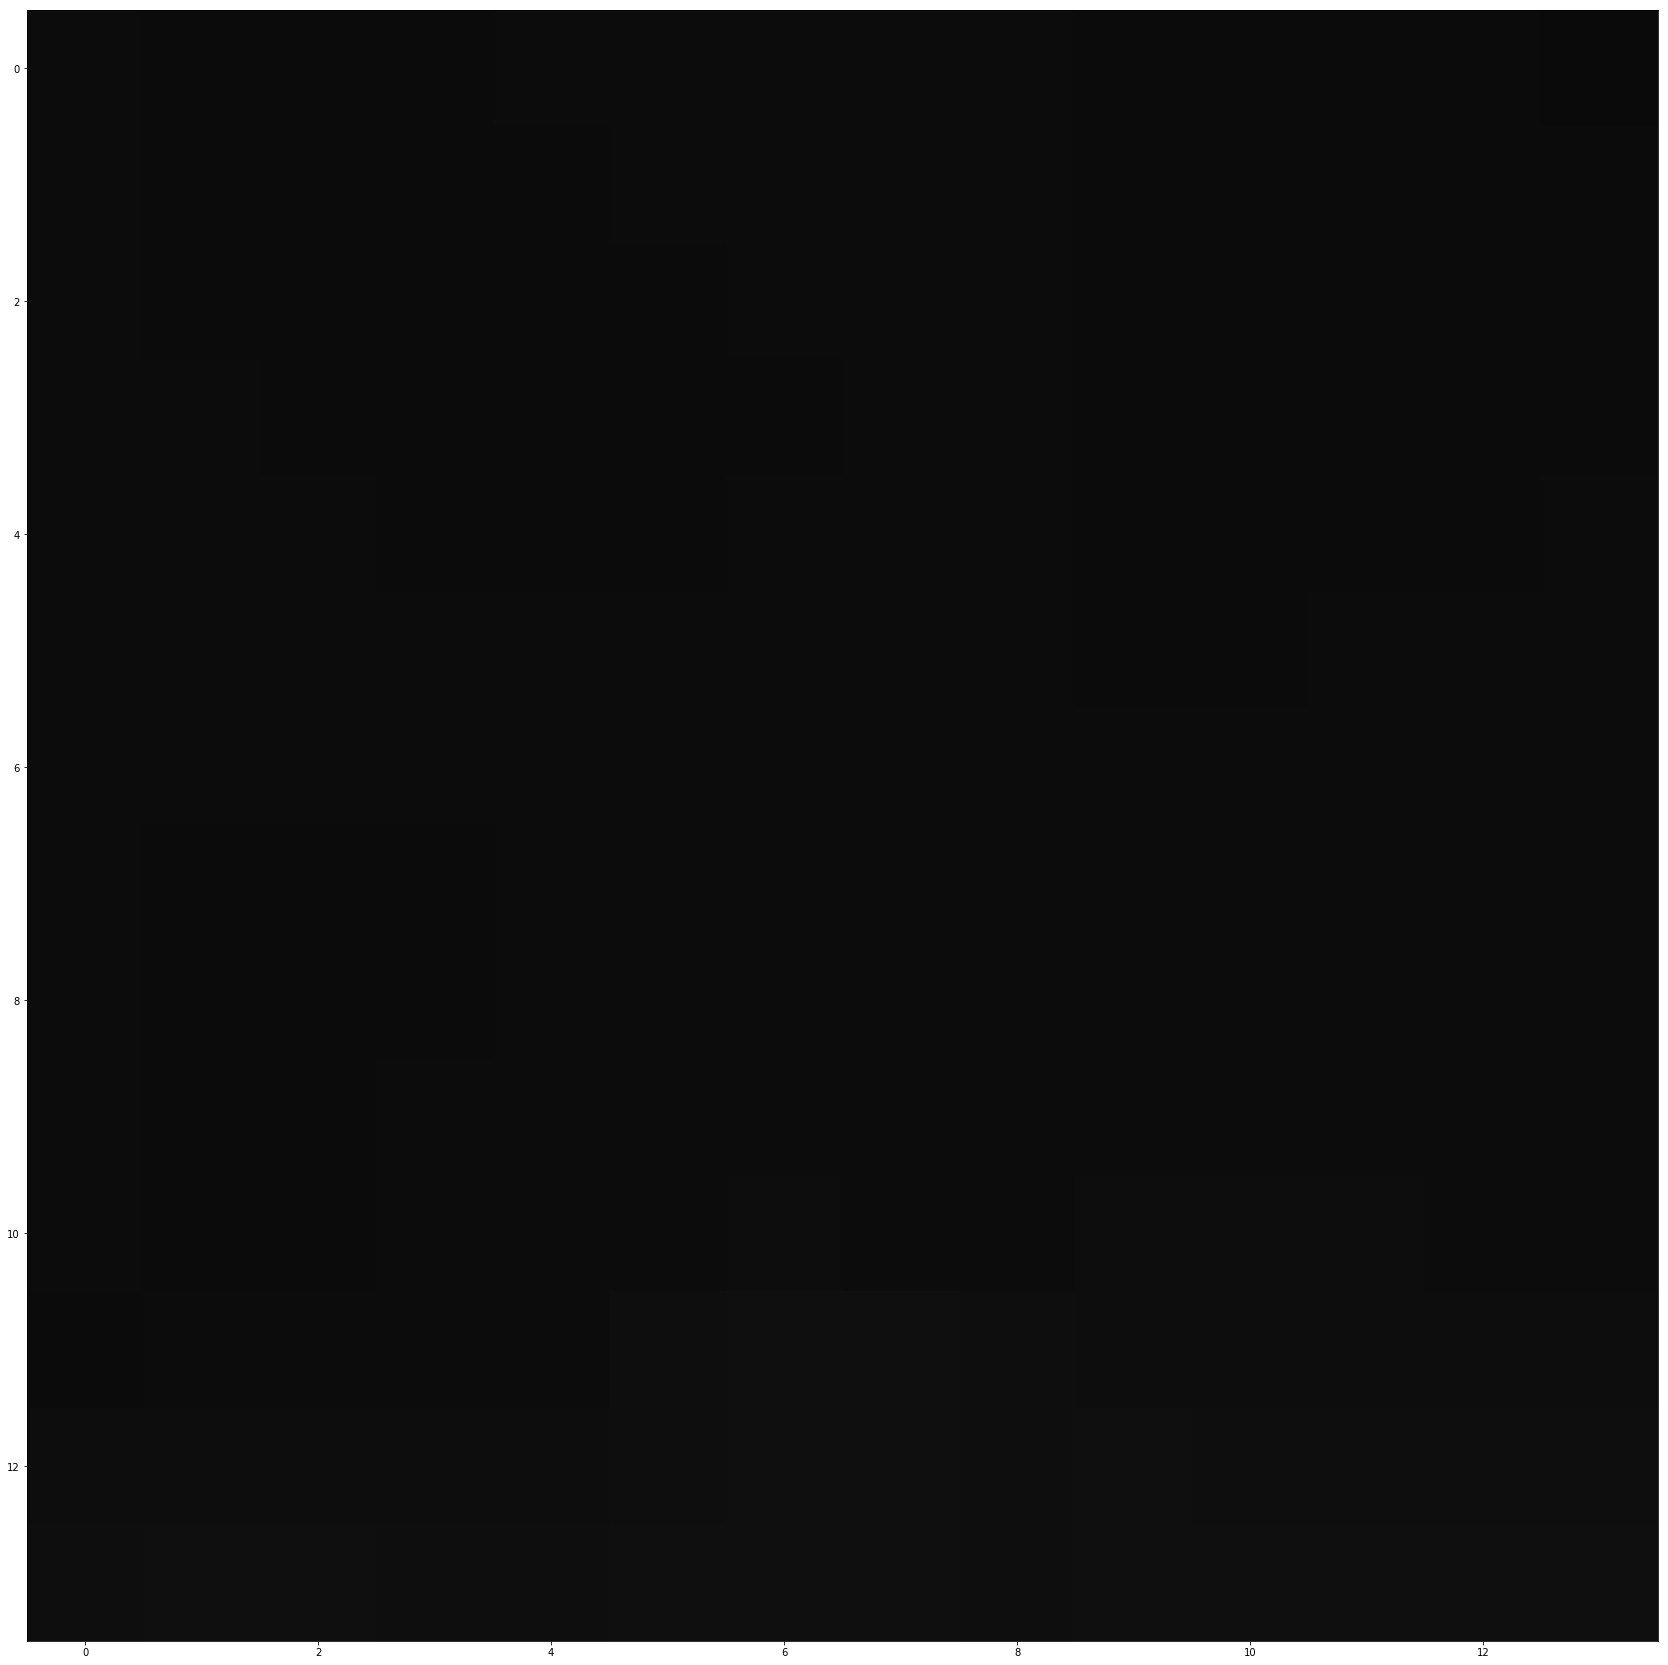

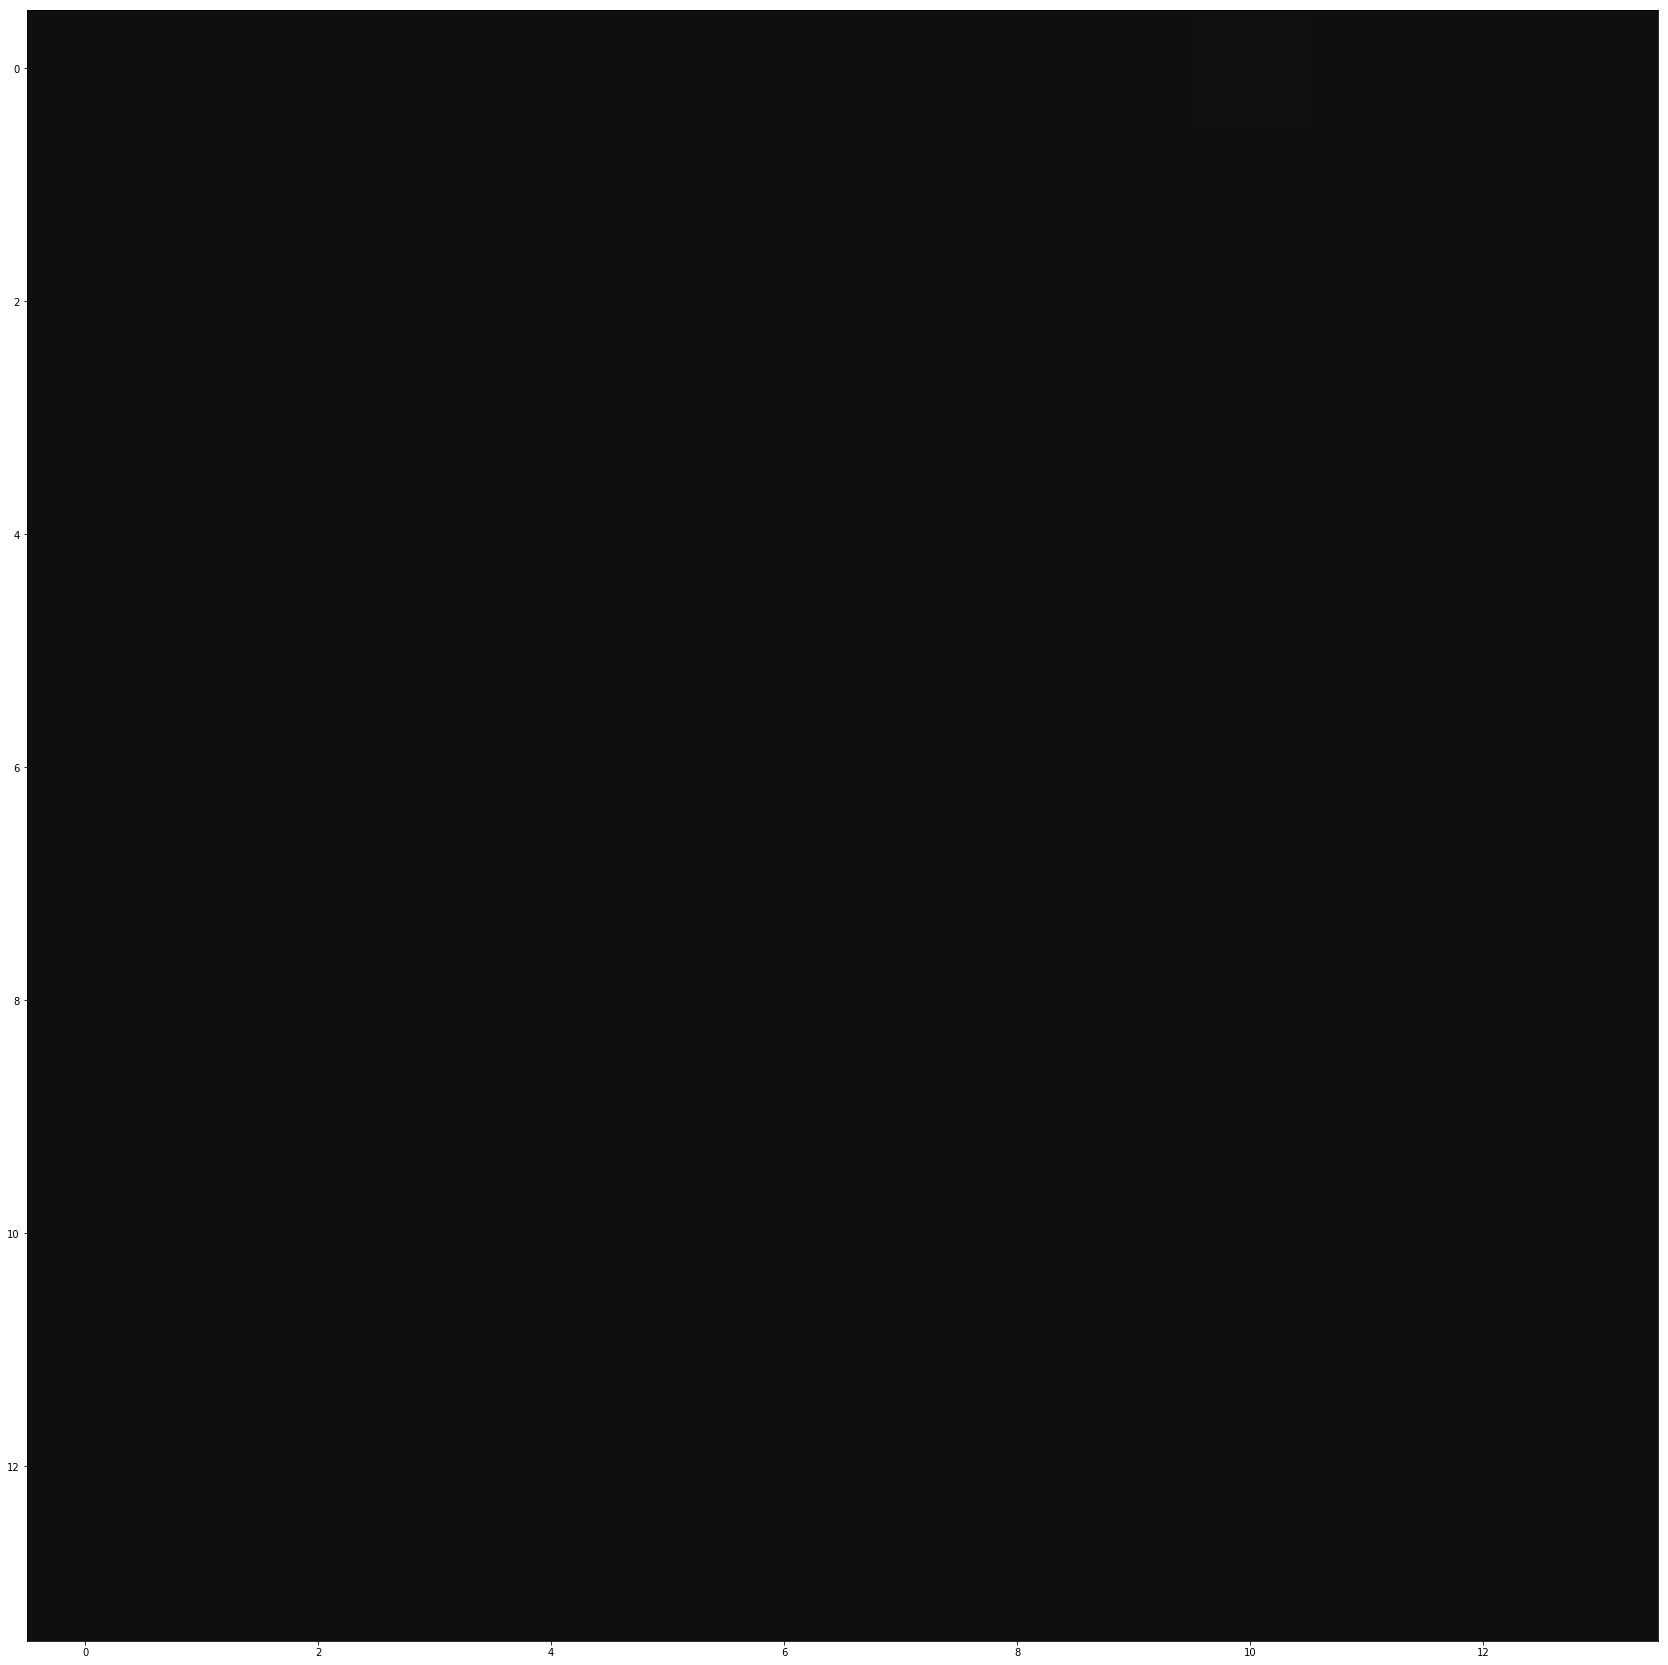

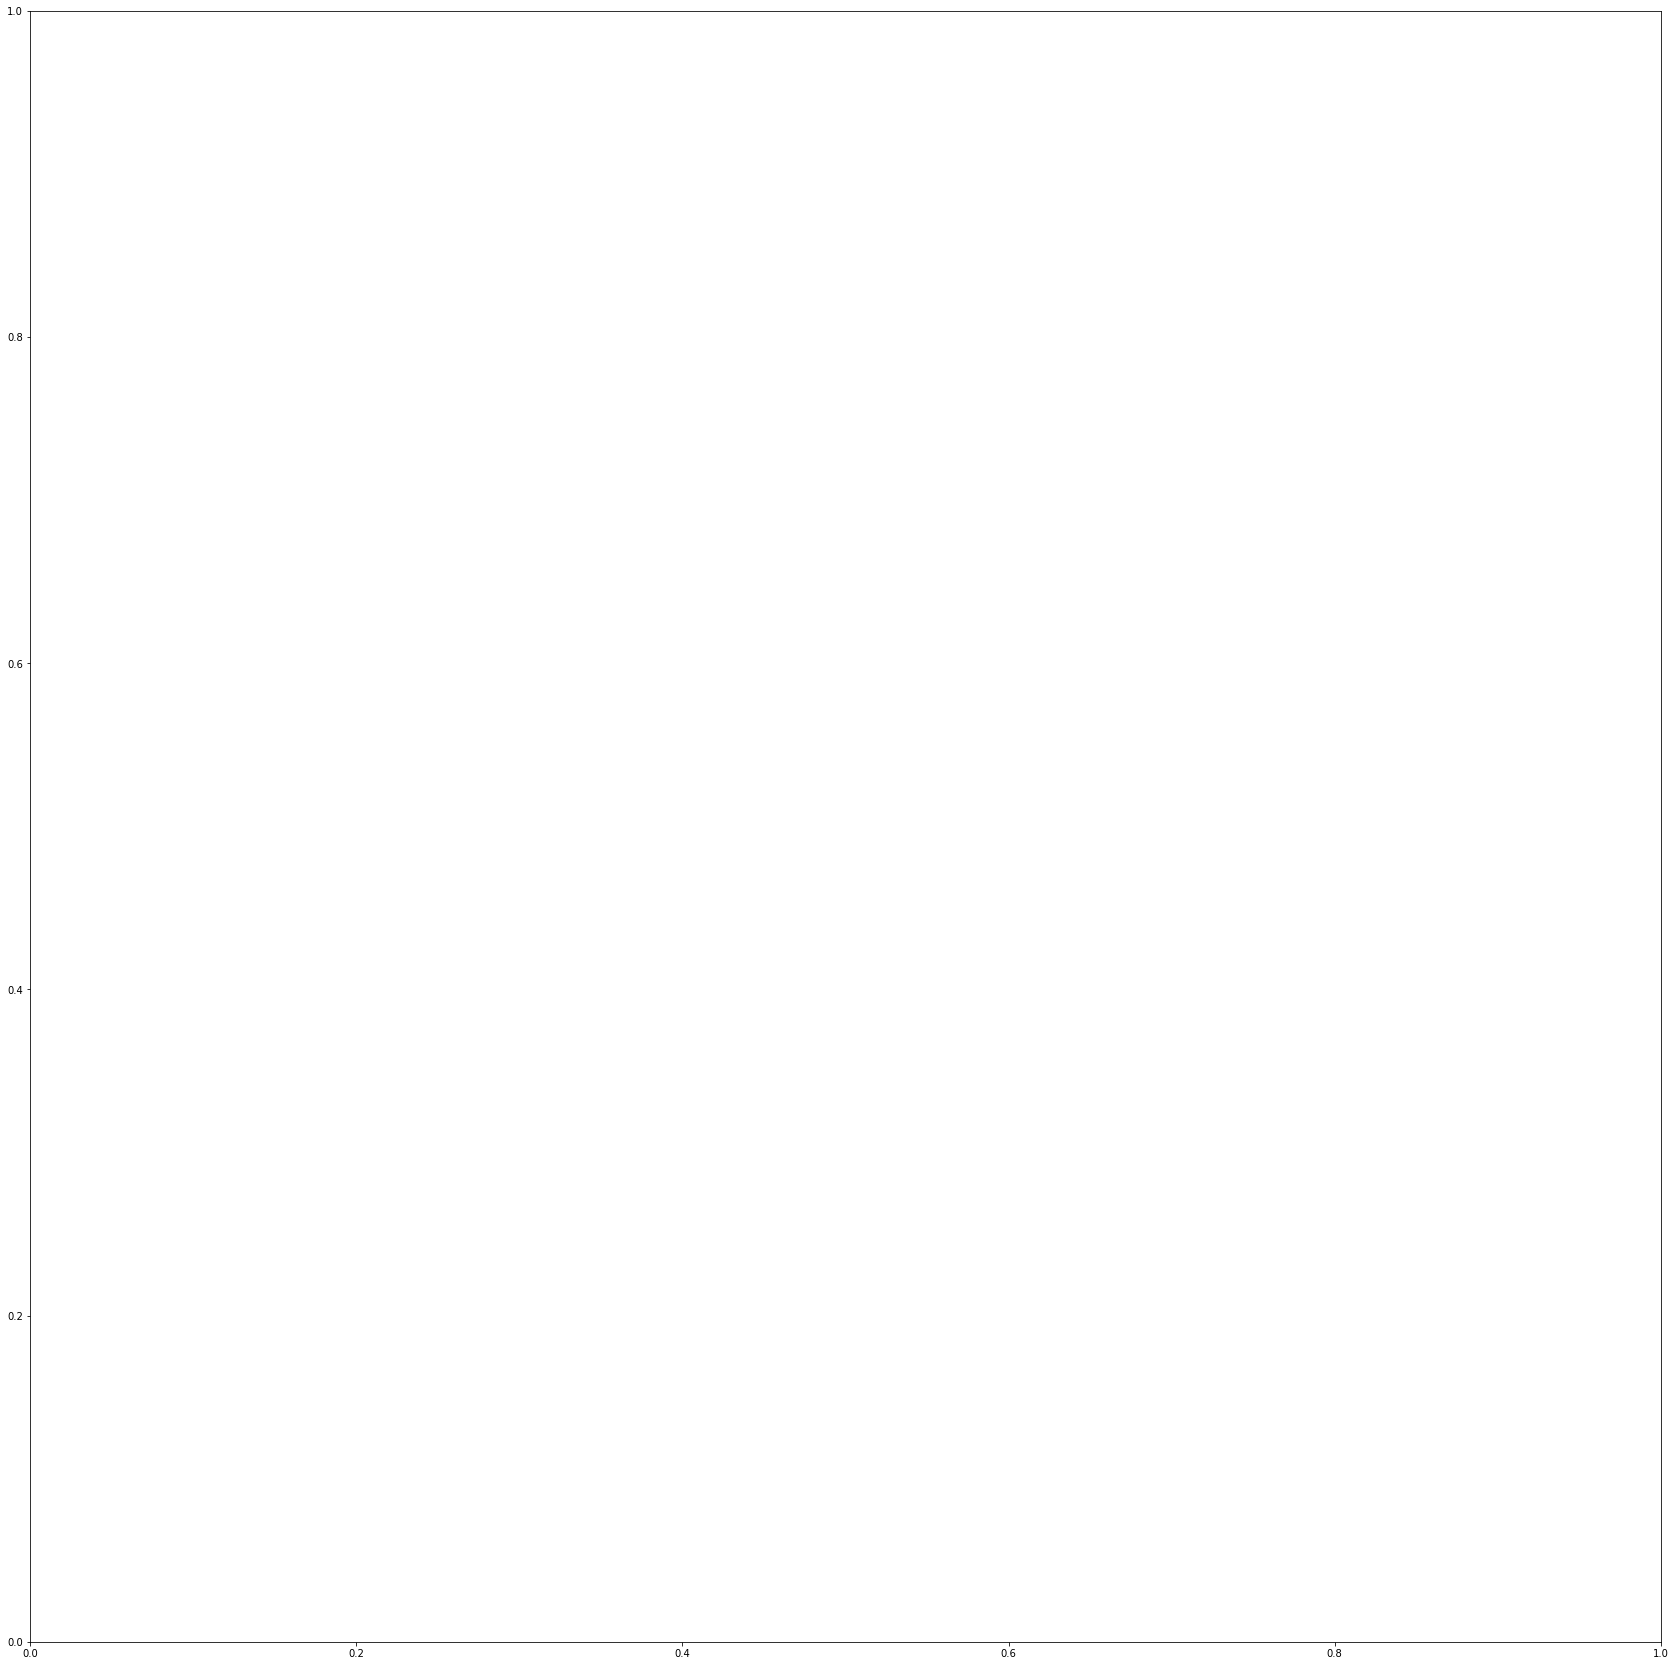

In [15]:
#Abertura da imagem
img = cv2.imread('teste3.jpg',0)

#Conversão para RGB, para sobrepor os círculos encontrados
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

plt.figure(figsize=[30, 30])
plt.imshow(cimg, "gray")

name, boxes = read_content("testexml/test_file.xml")

for cell in boxes:
    cell_img = cimg[cell[0]:cell[0]+14,cell[1]:cell[1]+14]
    print cell_img.shape, cell
    plt.figure(figsize=[30, 30])
    plt.imshow(cell_img, "gray")
    

In [45]:
#Definição do diretório fonte
diretorio_img = "processed_solo/"
diretorio_xml = "annotations_to_process/"

#Lista todos os arquivos no diretório
files_img = os.listdir(diretorio_img)   
files_xml = os.listdir(diretorio_xml)

#Organiza todos os arquivos encontrados
files_img = np.sort(files_img)
files_xml = np.sort(files_xml)

#Extrai, uma-a-uma, as imagens do diretório para serem processadas 
num_files_img = len(files_img)
img_matrix = np.zeros((num_files_img,420,592), dtype=np.uint8)

for file_index, file in enumerate(files_img):
    img_matrix[file_index] = cv2.imread((diretorio_img+file),0)

    #Conversão para RGB, para sobrepor os círculos encontrados
    cimg = cv2.cvtColor(img_matrix[file_index],cv2.COLOR_GRAY2BGR)
    
    name, boxes = read_content("annotations_to_process/brain_1__{}.xml".format(file_index+1))
    leuk_count = 0
    for cell in boxes:
        leuk_count += 1
        cell_img = cimg[cell[0]:cell[2],cell[1]:cell[3]]
        cv2.imwrite("leukocytes/leuk{}_{}.jpg".format(file_index,leuk_count), cell_img)
        
    print file_index

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219


In [69]:
def leitura_imagens_linha(diretorio):
    #Leitura das imagens para criar eigenface
    files = os.listdir(diretorio)    # Lista todos os arquivos no diretório input_folder
    files = np.sort(files)
    num_files = len(files)
    img_matrix = np.zeros((num_files,14*14), dtype=float)
    
    for file_index, file in enumerate(files):
        print diretorio + file
        img = cv2.imread(diretorio+file)
        gray = gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if gray.flatten().shape == 14*14:
            img_matrix[file_index]=(gray.flatten())
    return img_matrix

def imagem_media(img_matrix):
    return np.mean(img_matrix,axis=0)

leukocytes/leuk0_1.jpg
leukocytes/leuk0_10.jpg
leukocytes/leuk0_11.jpg
leukocytes/leuk0_12.jpg
leukocytes/leuk0_13.jpg
leukocytes/leuk0_14.jpg
leukocytes/leuk0_15.jpg
leukocytes/leuk0_16.jpg
leukocytes/leuk0_17.jpg
leukocytes/leuk0_18.jpg
leukocytes/leuk0_19.jpg
leukocytes/leuk0_2.jpg
leukocytes/leuk0_20.jpg
leukocytes/leuk0_21.jpg
leukocytes/leuk0_22.jpg
leukocytes/leuk0_23.jpg
leukocytes/leuk0_25.jpg
leukocytes/leuk0_26.jpg
leukocytes/leuk0_27.jpg
leukocytes/leuk0_28.jpg
leukocytes/leuk0_3.jpg
leukocytes/leuk0_4.jpg
leukocytes/leuk0_5.jpg
leukocytes/leuk0_6.jpg
leukocytes/leuk0_7.jpg
leukocytes/leuk0_8.jpg
leukocytes/leuk0_9.jpg
leukocytes/leuk100_1.jpg
leukocytes/leuk100_10.jpg
leukocytes/leuk100_11.jpg
leukocytes/leuk100_12.jpg
leukocytes/leuk100_13.jpg
leukocytes/leuk100_14.jpg
leukocytes/leuk100_15.jpg
leukocytes/leuk100_16.jpg
leukocytes/leuk100_17.jpg
leukocytes/leuk100_18.jpg
leukocytes/leuk100_19.jpg
leukocytes/leuk100_2.jpg
leukocytes/leuk100_20.jpg
leukocytes/leuk100_21.jpg

leukocytes/leuk132_2.jpg
leukocytes/leuk132_20.jpg
leukocytes/leuk132_21.jpg
leukocytes/leuk132_22.jpg
leukocytes/leuk132_23.jpg
leukocytes/leuk132_24.jpg
leukocytes/leuk132_25.jpg
leukocytes/leuk132_26.jpg
leukocytes/leuk132_3.jpg
leukocytes/leuk132_4.jpg
leukocytes/leuk132_5.jpg
leukocytes/leuk132_6.jpg
leukocytes/leuk132_7.jpg
leukocytes/leuk132_8.jpg
leukocytes/leuk132_9.jpg
leukocytes/leuk133_1.jpg
leukocytes/leuk133_10.jpg
leukocytes/leuk133_11.jpg
leukocytes/leuk133_12.jpg
leukocytes/leuk133_13.jpg
leukocytes/leuk133_14.jpg
leukocytes/leuk133_15.jpg
leukocytes/leuk133_16.jpg
leukocytes/leuk133_17.jpg
leukocytes/leuk133_18.jpg
leukocytes/leuk133_19.jpg
leukocytes/leuk133_2.jpg
leukocytes/leuk133_20.jpg
leukocytes/leuk133_21.jpg
leukocytes/leuk133_22.jpg
leukocytes/leuk133_23.jpg
leukocytes/leuk133_24.jpg
leukocytes/leuk133_25.jpg
leukocytes/leuk133_26.jpg
leukocytes/leuk133_3.jpg
leukocytes/leuk133_4.jpg
leukocytes/leuk133_5.jpg
leukocytes/leuk133_6.jpg
leukocytes/leuk133_7.jpg
l

leukocytes/leuk174_19.jpg
leukocytes/leuk174_2.jpg
leukocytes/leuk174_20.jpg
leukocytes/leuk174_21.jpg
leukocytes/leuk174_22.jpg
leukocytes/leuk174_23.jpg
leukocytes/leuk174_24.jpg
leukocytes/leuk174_25.jpg
leukocytes/leuk174_26.jpg
leukocytes/leuk174_27.jpg
leukocytes/leuk174_28.jpg
leukocytes/leuk174_29.jpg
leukocytes/leuk174_3.jpg
leukocytes/leuk174_4.jpg
leukocytes/leuk174_5.jpg
leukocytes/leuk174_6.jpg
leukocytes/leuk174_7.jpg
leukocytes/leuk174_8.jpg
leukocytes/leuk174_9.jpg
leukocytes/leuk175_1.jpg
leukocytes/leuk175_10.jpg
leukocytes/leuk175_11.jpg
leukocytes/leuk175_12.jpg
leukocytes/leuk175_13.jpg
leukocytes/leuk175_14.jpg
leukocytes/leuk175_15.jpg
leukocytes/leuk175_16.jpg
leukocytes/leuk175_17.jpg
leukocytes/leuk175_18.jpg
leukocytes/leuk175_19.jpg
leukocytes/leuk175_2.jpg
leukocytes/leuk175_20.jpg
leukocytes/leuk175_21.jpg
leukocytes/leuk175_22.jpg
leukocytes/leuk175_23.jpg
leukocytes/leuk175_24.jpg
leukocytes/leuk175_25.jpg
leukocytes/leuk175_26.jpg
leukocytes/leuk175_27.

leukocytes/leuk42_17.jpg
leukocytes/leuk42_18.jpg
leukocytes/leuk42_19.jpg
leukocytes/leuk42_2.jpg
leukocytes/leuk42_20.jpg
leukocytes/leuk42_21.jpg
leukocytes/leuk42_22.jpg
leukocytes/leuk42_23.jpg
leukocytes/leuk42_24.jpg
leukocytes/leuk42_25.jpg
leukocytes/leuk42_26.jpg
leukocytes/leuk42_3.jpg
leukocytes/leuk42_4.jpg
leukocytes/leuk42_5.jpg
leukocytes/leuk42_6.jpg
leukocytes/leuk42_7.jpg
leukocytes/leuk42_8.jpg
leukocytes/leuk42_9.jpg
leukocytes/leuk43_1.jpg
leukocytes/leuk43_10.jpg
leukocytes/leuk43_11.jpg
leukocytes/leuk43_12.jpg
leukocytes/leuk43_13.jpg
leukocytes/leuk43_14.jpg
leukocytes/leuk43_15.jpg
leukocytes/leuk43_16.jpg
leukocytes/leuk43_17.jpg
leukocytes/leuk43_18.jpg
leukocytes/leuk43_19.jpg
leukocytes/leuk43_2.jpg
leukocytes/leuk43_20.jpg
leukocytes/leuk43_21.jpg
leukocytes/leuk43_22.jpg
leukocytes/leuk43_23.jpg
leukocytes/leuk43_24.jpg
leukocytes/leuk43_25.jpg
leukocytes/leuk43_26.jpg
leukocytes/leuk43_3.jpg
leukocytes/leuk43_4.jpg
leukocytes/leuk43_5.jpg
leukocytes/le

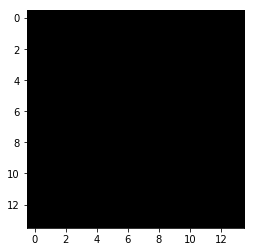

In [72]:
leuk_matrix = leitura_imagens_linha("leukocytes/")
leuk_medio = imagem_media(leuk_matrix)
plt.subplot(1,1,1)
plt.imshow(np.reshape(leuk_matrix[55],(14,14)),"gray")

In [73]:
print leuk_matrix[55]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
